# Base Paper Implementation

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import math
from sklearn.metrics import mean_squared_error

## Importing Data

In [2]:
df = pd.read_csv("C:\\Users\\OvaizAli\\Desktop\\FYP-2021\\FYP-I\\Master\\Data Collection\\CollectedData\\Final_Data (2022).csv", index_col = False)
# df = df.drop(columns = ['Unnamed: 0'])

In [3]:
df.head()

,Unnamed: 0,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,1.0,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.00,Haze.
1,1,Islamabad,Pakistan,2020-03-10,10,3,2020,33.665087,73.121219,2.0,...,0.0,0.0,0.004133,0.00000,0.000000,65.14,9.57,34.71,21.33,Clear.
2,2,Punjab,Pakistan,2020-03-10,10,3,2020,30.811346,72.139132,0.0,...,0.0,0.0,40.904370,89.53674,11.384460,56.40,2.44,23.67,11.88,Clear.
3,3,Sindh,Pakistan,2020-03-10,10,3,2020,26.009446,68.776807,0.0,...,0.0,0.0,22.339800,81.02134,6.179772,65.14,9.57,34.71,21.33,Clear.
4,4,Khyber Pakhtunkhwa,Pakistan,2020-03-10,10,3,2020,34.485332,72.091690,0.0,...,0.0,0.0,17.376130,39.58196,5.953569,48.80,4.64,49.20,23.21,Fog.


In [4]:
x = df[['Date', 'Confirmed', 'Deaths', 'Recovered']]

In [5]:
x.head()

,Date,Confirmed,Deaths,Recovered
0,2020-03-10,1.0,0.0,1
1,2020-03-10,2.0,0.0,2
2,2020-03-10,0.0,0.0,0
3,2020-03-10,0.0,0.0,0
4,2020-03-10,0.0,0.0,0


## Data Preparation For Model Implementation

In [6]:
# dates = np.array(x['Date'])
# dates = [datetime.strptime(date, '%y%y%y%y-%m-%d').date() for date in dates] 
# dates = [x.strftime('%d/%m/%y') for x in dates]
# dates
x['Date'] = pd.to_datetime(x['Date'])
x.sort_values('Date')
x['Date'] = x['Date'].dt.strftime('%d/%m/%y')

In [7]:
x.head(7)

,Date,Confirmed,Deaths,Recovered
0,10/03/20,1.0,0.0,1
1,10/03/20,2.0,0.0,2
2,10/03/20,0.0,0.0,0
3,10/03/20,0.0,0.0,0
4,10/03/20,0.0,0.0,0
5,10/03/20,0.0,0.0,0
6,10/03/20,2.0,0.0,2


In [8]:
dates = list(x['Date'].unique())

In [9]:
x = x.groupby(by=["Date"]).sum()

In [10]:
x.head()

,Confirmed,Deaths,Recovered
Date,,,
01/01/21,482178.0,10176.0,437229
01/01/22,1295933.0,28933.0,1191105
01/02/21,546428.0,11683.0,501252
01/02/22,1430366.0,29301.0,1314639
01/03/21,581365.0,12896.0,546371


## Ploting Imported Data

In [11]:
dates2020 = []
dates2021 = []
dates2022 = []

for date in dates:
    if(date[-2:] == '20'):
        dates2020.append(date)
    elif(date[-2:] == '21'):
        dates2021.append(date)
    elif(date[-2:] == '22'):
        dates2022.append(date)

In [12]:
dates2020.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2021.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))
dates2022.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [13]:
confirmed_pk2020 = []
confirmed_pk2021 = []
confirmed_pk2022 = []

deaths_pk2020 = []
deaths_pk2021 = []
deaths_pk2022 = []

recovered_pk2020 = []
recovered_pk2021 = []
recovered_pk2022 = []

for date in dates2020:
    confirmed_pk2020.append(x['Confirmed'][date])
    deaths_pk2020.append(x['Deaths'][date])
    recovered_pk2020.append(x['Recovered'][date])
    
for date in dates2021:
    confirmed_pk2021.append(x['Confirmed'][date])
    deaths_pk2021.append(x['Deaths'][date])
    recovered_pk2021.append(x['Recovered'][date])
    
for date in dates2022:
    confirmed_pk2022.append(x['Confirmed'][date])
    deaths_pk2022.append(x['Deaths'][date])
    recovered_pk2022.append(x['Recovered'][date])

## Year 2020

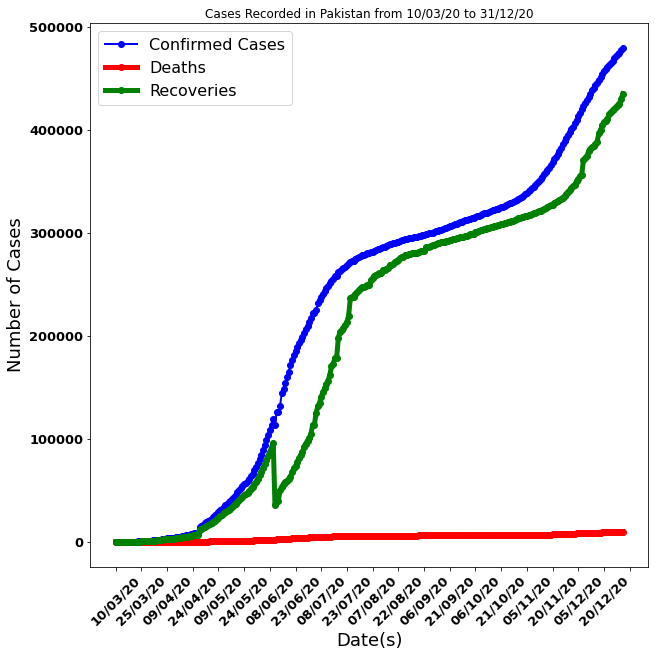

In [14]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2020,confirmed_pk2020, 'bo-', linewidth = 2)
plt.plot(dates2020,deaths_pk2020, 'ro-', linewidth = 5)
plt.plot(dates2020,recovered_pk2020, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2020[0] + ' to ' + dates2020[-1])
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

## Year 2021

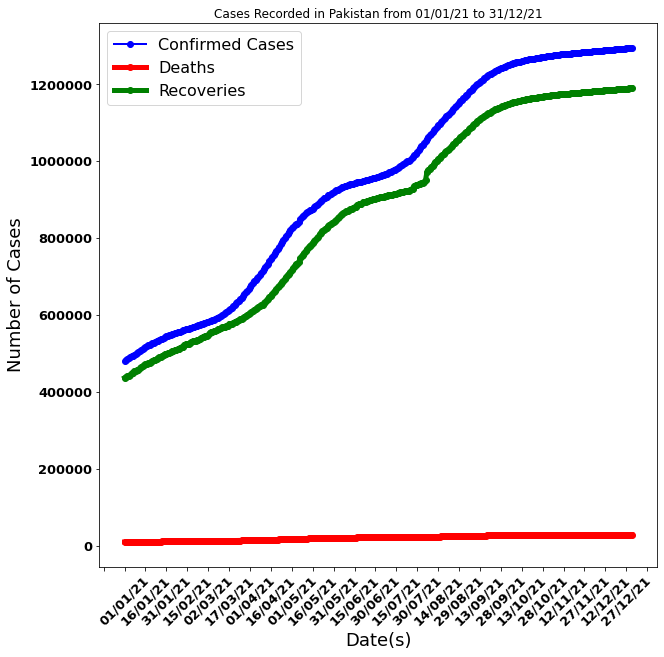

In [15]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2021,confirmed_pk2021, 'bo-', linewidth = 2)
plt.plot(dates2021,deaths_pk2021, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2021,recovered_pk2021, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2021[0] + ' to ' + dates2021[-1])
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()

## Year 2022

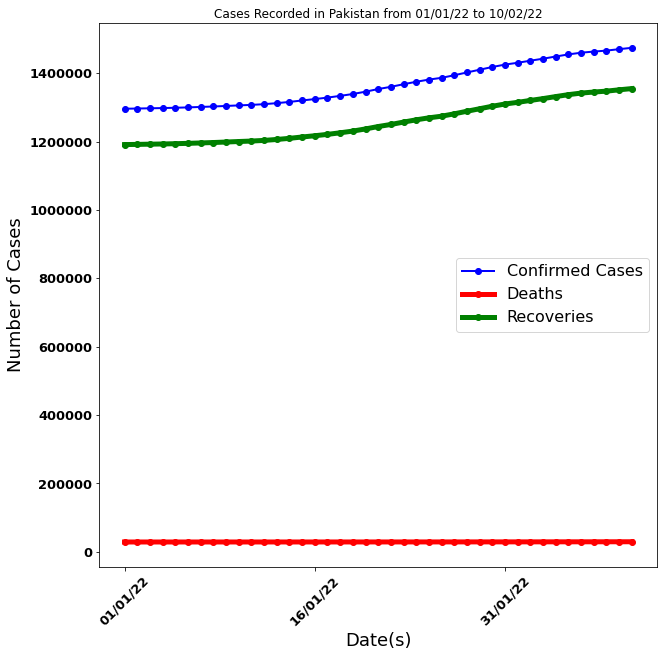

In [16]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=15.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates2022,confirmed_pk2022, 'bo-', linewidth = 2)
plt.plot(dates2022,deaths_pk2022, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates2022,recovered_pk2022, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates2022[0] + ' to ' + dates2022[-1])
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()

## Combined Visualization

In [17]:
dates.sort(key = lambda date: datetime.strptime(date, '%d/%m/%y'))

In [18]:
confirmed_pk = []
deaths_pk = []
recovered_pk = []

for date in dates:
    confirmed_pk.append(x['Confirmed'][date])
    deaths_pk.append(x['Deaths'][date])
    recovered_pk.append(x['Recovered'][date])

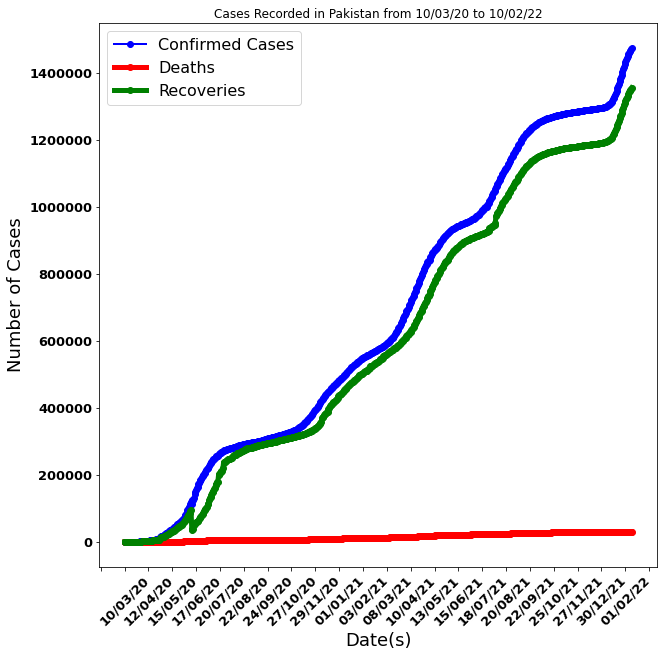

In [19]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=33.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.plot(dates,confirmed_pk, 'bo-', linewidth = 2)
plt.plot(dates,deaths_pk, 'ro-', linewidth = 5)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(dates,recovered_pk, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})
plt.title('Cases Recorded in Pakistan from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=45, weight = 'bold');
plt.yticks(weight = 'bold');
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.show()

## Data Preprocessing

### Processing input data into polynomial form data

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_reg = PolynomialFeatures(degree = 6)

In [22]:
input_data_simple = np.arange(0,len(x)) + 1

### Data transformed into polynomial equation upto degree mentioned above

In [23]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))

### Preparing Input and Dates into DataFrame

In [24]:
inputData_dates = pd.Series(dates, index = input_data_simple)

### Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

## Creating Neural Network

<h4>Neural Network Design</h4>
<p>We designed a neural network with <b>one input layer, one hidden layer (with 200 neurons)</b> with <b>rectifying linear activation function</b> and <b>one output layer</b>.</p>

<h4>Optimization/Training</h4>
<p><b>Adam</b> optimizer is used to train ANN with learning rate of 1e-1 and 500 iterations are performed for training. The loss function is used as mean square error between predictions and observations.</p>

In [27]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError', 'mean_squared_error'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("Neural network model is not trained. Please use fit method to train model")

## Predictions on All the Cases (Confirmed, Deaths, Recovories) with Designed ANN

<p>This section has been divided into following two subsections:</p>
<ul>
    <li>In first section, the data has splitted into train/test to evaluate the model and named as <b>ann_model_for_evaluation</b>. The purpose of this section is to evaluate the performance and accuracy of model with available data. For this purpose, training data is used to train and fit the model on data and then test data is used to check the efficiency and accuracy of model.</li>
    <li>In second section, once the model has evaluated, whole data is used to train the model and then some future input data is generated to predict the cases in future.</li>
</ul>

## 1 - Evaluating Model on Train Test Splitted Data

#### Splitting data into train-test sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
confirmed_pk = np.array(confirmed_pk)
deaths_pk = np.array(deaths_pk)
recovered_pk = np.array(recovered_pk)

In [30]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)), axis = 1)

In [31]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, 
                                                                                  test_size=0.05, shuffle=False)

#### Transforming into tensors of input-output data for ANN

In [32]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)

#### Creating instance of proposed ANN model

In [33]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)

#### A model summary about layers shapes and number of paramaters/weights is given below

In [34]:
ann_model_for_evaluation.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


#### Selection of best epochs (during experiments) and training/fitting of proposed ANN model on training data

In [35]:
best_epochs = 4000

In [36]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)

Epoch 1/4000
21/21 [==============================] - 0s 2ms/step - loss: 356054138880.0000 - mean_absolute_error: 404668.7812 - mean_squared_error: 356054138880.0000
Epoch 2/4000
21/21 [==============================] - 0s 1ms/step - loss: 351669026816.0000 - mean_absolute_error: 400693.7188 - mean_squared_error: 351669026816.0000
Epoch 3/4000
21/21 [==============================] - 0s 1ms/step - loss: 339738230784.0000 - mean_absolute_error: 392375.7188 - mean_squared_error: 339738230784.0000
Epoch 4/4000
21/21 [==============================] - 0s 1ms/step - loss: 319962710016.0000 - mean_absolute_error: 379785.5312 - mean_squared_error: 319962710016.0000
Epoch 5/4000
21/21 [==============================] - 0s 1ms/step - loss: 292759175168.0000 - mean_absolute_error: 363271.0625 - mean_squared_error: 292759175168.0000
Epoch 6/4000
21/21 [==============================] - 0s 1ms/step - loss: 260781719552.0000 - mean_absolute_error: 343578.6875 - mean_squared_error: 260781719552.000

21/21 [==============================] - 0s 949us/step - loss: 601828800.0000 - mean_absolute_error: 15938.5605 - mean_squared_error: 601828800.0000
Epoch 51/4000
21/21 [==============================] - 0s 1ms/step - loss: 598761920.0000 - mean_absolute_error: 15749.7119 - mean_squared_error: 598761920.0000
Epoch 52/4000
21/21 [==============================] - 0s 949us/step - loss: 596881408.0000 - mean_absolute_error: 15790.9082 - mean_squared_error: 596881408.0000
Epoch 53/4000
21/21 [==============================] - 0s 949us/step - loss: 593577024.0000 - mean_absolute_error: 15764.3018 - mean_squared_error: 593577024.0000
Epoch 54/4000
21/21 [==============================] - 0s 999us/step - loss: 591961408.0000 - mean_absolute_error: 15494.1621 - mean_squared_error: 591961408.0000
Epoch 55/4000
21/21 [==============================] - 0s 1ms/step - loss: 590726912.0000 - mean_absolute_error: 15861.3916 - mean_squared_error: 590726912.0000
Epoch 56/4000
21/21 [===================

21/21 [==============================] - 0s 1ms/step - loss: 550504576.0000 - mean_absolute_error: 14946.4795 - mean_squared_error: 550504576.0000
Epoch 101/4000
21/21 [==============================] - 0s 949us/step - loss: 550090368.0000 - mean_absolute_error: 14990.4199 - mean_squared_error: 550090368.0000
Epoch 102/4000
21/21 [==============================] - 0s 899us/step - loss: 550838592.0000 - mean_absolute_error: 14921.1211 - mean_squared_error: 550838592.0000
Epoch 103/4000
21/21 [==============================] - 0s 949us/step - loss: 553094784.0000 - mean_absolute_error: 15018.1230 - mean_squared_error: 553094784.0000
Epoch 104/4000
21/21 [==============================] - 0s 949us/step - loss: 550428096.0000 - mean_absolute_error: 15059.1377 - mean_squared_error: 550428096.0000
Epoch 105/4000
21/21 [==============================] - 0s 949us/step - loss: 551014208.0000 - mean_absolute_error: 14945.3477 - mean_squared_error: 551014208.0000
Epoch 106/4000
21/21 [===========

21/21 [==============================] - 0s 999us/step - loss: 547636480.0000 - mean_absolute_error: 15008.4590 - mean_squared_error: 547636480.0000
Epoch 151/4000
21/21 [==============================] - 0s 950us/step - loss: 541781312.0000 - mean_absolute_error: 14885.5859 - mean_squared_error: 541781312.0000
Epoch 152/4000
21/21 [==============================] - 0s 999us/step - loss: 541153472.0000 - mean_absolute_error: 14847.5488 - mean_squared_error: 541153472.0000
Epoch 153/4000
21/21 [==============================] - 0s 949us/step - loss: 539722496.0000 - mean_absolute_error: 14815.7783 - mean_squared_error: 539722496.0000
Epoch 154/4000
21/21 [==============================] - 0s 949us/step - loss: 539882432.0000 - mean_absolute_error: 14789.6719 - mean_squared_error: 539882432.0000
Epoch 155/4000
21/21 [==============================] - 0s 949us/step - loss: 539743616.0000 - mean_absolute_error: 14835.7119 - mean_squared_error: 539743616.0000
Epoch 156/4000
21/21 [=========

21/21 [==============================] - 0s 999us/step - loss: 534099840.0000 - mean_absolute_error: 15023.9180 - mean_squared_error: 534099840.0000
Epoch 201/4000
21/21 [==============================] - 0s 1ms/step - loss: 537327872.0000 - mean_absolute_error: 14919.7197 - mean_squared_error: 537327872.0000
Epoch 202/4000
21/21 [==============================] - 0s 949us/step - loss: 537696256.0000 - mean_absolute_error: 14931.1562 - mean_squared_error: 537696256.0000
Epoch 203/4000
21/21 [==============================] - 0s 949us/step - loss: 534682176.0000 - mean_absolute_error: 14845.2988 - mean_squared_error: 534682176.0000
Epoch 204/4000
21/21 [==============================] - 0s 949us/step - loss: 539985024.0000 - mean_absolute_error: 15069.7725 - mean_squared_error: 539985024.0000
Epoch 205/4000
21/21 [==============================] - 0s 949us/step - loss: 536130560.0000 - mean_absolute_error: 14899.4453 - mean_squared_error: 536130560.0000
Epoch 206/4000
21/21 [===========

21/21 [==============================] - 0s 1ms/step - loss: 537593088.0000 - mean_absolute_error: 15057.2598 - mean_squared_error: 537593088.0000
Epoch 251/4000
21/21 [==============================] - 0s 949us/step - loss: 532691040.0000 - mean_absolute_error: 14997.1934 - mean_squared_error: 532691040.0000
Epoch 252/4000
21/21 [==============================] - 0s 999us/step - loss: 532845504.0000 - mean_absolute_error: 14957.6338 - mean_squared_error: 532845504.0000
Epoch 253/4000
21/21 [==============================] - 0s 949us/step - loss: 530751104.0000 - mean_absolute_error: 14905.0254 - mean_squared_error: 530751104.0000
Epoch 254/4000
21/21 [==============================] - 0s 949us/step - loss: 529298496.0000 - mean_absolute_error: 14938.2275 - mean_squared_error: 529298496.0000
Epoch 255/4000
21/21 [==============================] - 0s 899us/step - loss: 536902912.0000 - mean_absolute_error: 15042.6299 - mean_squared_error: 536902912.0000
Epoch 256/4000
21/21 [===========

21/21 [==============================] - 0s 949us/step - loss: 518775168.0000 - mean_absolute_error: 14807.5303 - mean_squared_error: 518775168.0000
Epoch 301/4000
21/21 [==============================] - 0s 949us/step - loss: 519105120.0000 - mean_absolute_error: 14828.0762 - mean_squared_error: 519105120.0000
Epoch 302/4000
21/21 [==============================] - 0s 949us/step - loss: 516195776.0000 - mean_absolute_error: 14812.8936 - mean_squared_error: 516195776.0000
Epoch 303/4000
21/21 [==============================] - 0s 999us/step - loss: 517496768.0000 - mean_absolute_error: 14802.6943 - mean_squared_error: 517496768.0000
Epoch 304/4000
21/21 [==============================] - 0s 949us/step - loss: 516545120.0000 - mean_absolute_error: 14788.9863 - mean_squared_error: 516545120.0000
Epoch 305/4000
21/21 [==============================] - 0s 1ms/step - loss: 517344960.0000 - mean_absolute_error: 14873.6885 - mean_squared_error: 517344960.0000
Epoch 306/4000
21/21 [===========

21/21 [==============================] - 0s 949us/step - loss: 504033248.0000 - mean_absolute_error: 14427.0596 - mean_squared_error: 504033248.0000
Epoch 351/4000
21/21 [==============================] - 0s 949us/step - loss: 497536928.0000 - mean_absolute_error: 14300.4873 - mean_squared_error: 497536928.0000
Epoch 352/4000
21/21 [==============================] - 0s 999us/step - loss: 498140864.0000 - mean_absolute_error: 14437.1934 - mean_squared_error: 498140864.0000
Epoch 353/4000
21/21 [==============================] - 0s 949us/step - loss: 502302304.0000 - mean_absolute_error: 14476.9795 - mean_squared_error: 502302304.0000
Epoch 354/4000
21/21 [==============================] - 0s 949us/step - loss: 496577952.0000 - mean_absolute_error: 14382.9727 - mean_squared_error: 496577952.0000
Epoch 355/4000
21/21 [==============================] - 0s 949us/step - loss: 496548768.0000 - mean_absolute_error: 14377.9561 - mean_squared_error: 496548768.0000
Epoch 356/4000
21/21 [=========

21/21 [==============================] - 0s 999us/step - loss: 502813408.0000 - mean_absolute_error: 14453.1797 - mean_squared_error: 502813408.0000
Epoch 401/4000
21/21 [==============================] - 0s 999us/step - loss: 493248192.0000 - mean_absolute_error: 14350.0479 - mean_squared_error: 493248192.0000
Epoch 402/4000
21/21 [==============================] - 0s 949us/step - loss: 499304992.0000 - mean_absolute_error: 14579.3945 - mean_squared_error: 499304992.0000
Epoch 403/4000
21/21 [==============================] - 0s 949us/step - loss: 493468736.0000 - mean_absolute_error: 14278.2773 - mean_squared_error: 493468736.0000
Epoch 404/4000
21/21 [==============================] - 0s 949us/step - loss: 488737952.0000 - mean_absolute_error: 14275.2217 - mean_squared_error: 488737952.0000
Epoch 405/4000
21/21 [==============================] - 0s 949us/step - loss: 485264896.0000 - mean_absolute_error: 14144.8760 - mean_squared_error: 485264896.0000
Epoch 406/4000
21/21 [=========

Epoch 450/4000
21/21 [==============================] - 0s 949us/step - loss: 479708288.0000 - mean_absolute_error: 14190.9688 - mean_squared_error: 479708288.0000
Epoch 451/4000
21/21 [==============================] - 0s 1ms/step - loss: 478855584.0000 - mean_absolute_error: 14138.4541 - mean_squared_error: 478855584.0000
Epoch 452/4000
21/21 [==============================] - 0s 949us/step - loss: 477280800.0000 - mean_absolute_error: 14034.8799 - mean_squared_error: 477280800.0000
Epoch 453/4000
21/21 [==============================] - 0s 899us/step - loss: 477370720.0000 - mean_absolute_error: 14086.1113 - mean_squared_error: 477370720.0000
Epoch 454/4000
21/21 [==============================] - 0s 899us/step - loss: 481224768.0000 - mean_absolute_error: 14265.7451 - mean_squared_error: 481224768.0000
Epoch 455/4000
21/21 [==============================] - 0s 999us/step - loss: 486547616.0000 - mean_absolute_error: 14247.3701 - mean_squared_error: 486547616.0000
Epoch 456/4000
21/

21/21 [==============================] - 0s 949us/step - loss: 471054944.0000 - mean_absolute_error: 14031.5635 - mean_squared_error: 471054944.0000
Epoch 501/4000
21/21 [==============================] - 0s 949us/step - loss: 477318144.0000 - mean_absolute_error: 14115.8398 - mean_squared_error: 477318144.0000
Epoch 502/4000
21/21 [==============================] - 0s 899us/step - loss: 483057152.0000 - mean_absolute_error: 14405.6016 - mean_squared_error: 483057152.0000
Epoch 503/4000
21/21 [==============================] - 0s 999us/step - loss: 477211776.0000 - mean_absolute_error: 14089.3945 - mean_squared_error: 477211776.0000
Epoch 504/4000
21/21 [==============================] - 0s 949us/step - loss: 467607360.0000 - mean_absolute_error: 14049.4932 - mean_squared_error: 467607360.0000
Epoch 505/4000
21/21 [==============================] - 0s 949us/step - loss: 470254048.0000 - mean_absolute_error: 13974.3340 - mean_squared_error: 470254048.0000
Epoch 506/4000
21/21 [=========

21/21 [==============================] - 0s 949us/step - loss: 470935712.0000 - mean_absolute_error: 14194.4033 - mean_squared_error: 470935712.0000
Epoch 551/4000
21/21 [==============================] - 0s 949us/step - loss: 463177536.0000 - mean_absolute_error: 13959.7891 - mean_squared_error: 463177536.0000
Epoch 552/4000
21/21 [==============================] - 0s 949us/step - loss: 465437504.0000 - mean_absolute_error: 13850.9326 - mean_squared_error: 465437504.0000
Epoch 553/4000
21/21 [==============================] - 0s 949us/step - loss: 472596096.0000 - mean_absolute_error: 14197.6309 - mean_squared_error: 472596096.0000
Epoch 554/4000
21/21 [==============================] - 0s 949us/step - loss: 468655712.0000 - mean_absolute_error: 13992.0146 - mean_squared_error: 468655712.0000
Epoch 555/4000
21/21 [==============================] - 0s 1ms/step - loss: 461809952.0000 - mean_absolute_error: 13868.0283 - mean_squared_error: 461809952.0000
Epoch 556/4000
21/21 [===========

21/21 [==============================] - 0s 949us/step - loss: 455958304.0000 - mean_absolute_error: 13840.5215 - mean_squared_error: 455958304.0000
Epoch 601/4000
21/21 [==============================] - 0s 949us/step - loss: 453617984.0000 - mean_absolute_error: 13755.2822 - mean_squared_error: 453617984.0000
Epoch 602/4000
21/21 [==============================] - 0s 949us/step - loss: 453064672.0000 - mean_absolute_error: 13669.8711 - mean_squared_error: 453064672.0000
Epoch 603/4000
21/21 [==============================] - 0s 949us/step - loss: 453028864.0000 - mean_absolute_error: 13684.1924 - mean_squared_error: 453028864.0000
Epoch 604/4000
21/21 [==============================] - 0s 949us/step - loss: 451818336.0000 - mean_absolute_error: 13729.7539 - mean_squared_error: 451818336.0000
Epoch 605/4000
21/21 [==============================] - 0s 949us/step - loss: 454381632.0000 - mean_absolute_error: 13781.4795 - mean_squared_error: 454381632.0000
Epoch 606/4000
21/21 [=========

21/21 [==============================] - 0s 949us/step - loss: 446624896.0000 - mean_absolute_error: 13739.3164 - mean_squared_error: 446624896.0000
Epoch 651/4000
21/21 [==============================] - 0s 999us/step - loss: 450336512.0000 - mean_absolute_error: 13677.0752 - mean_squared_error: 450336512.0000
Epoch 652/4000
21/21 [==============================] - 0s 999us/step - loss: 452402624.0000 - mean_absolute_error: 13629.3115 - mean_squared_error: 452402624.0000
Epoch 653/4000
21/21 [==============================] - 0s 999us/step - loss: 451898464.0000 - mean_absolute_error: 13787.3359 - mean_squared_error: 451898464.0000
Epoch 654/4000
21/21 [==============================] - 0s 949us/step - loss: 447195616.0000 - mean_absolute_error: 13650.0811 - mean_squared_error: 447195616.0000
Epoch 655/4000
21/21 [==============================] - 0s 949us/step - loss: 442739552.0000 - mean_absolute_error: 13533.7812 - mean_squared_error: 442739552.0000
Epoch 656/4000
21/21 [=========

21/21 [==============================] - 0s 949us/step - loss: 440241408.0000 - mean_absolute_error: 13650.3594 - mean_squared_error: 440241408.0000
Epoch 701/4000
21/21 [==============================] - 0s 949us/step - loss: 444623936.0000 - mean_absolute_error: 13649.5488 - mean_squared_error: 444623936.0000
Epoch 702/4000
21/21 [==============================] - 0s 899us/step - loss: 441412960.0000 - mean_absolute_error: 13551.9414 - mean_squared_error: 441412960.0000
Epoch 703/4000
21/21 [==============================] - 0s 899us/step - loss: 438334048.0000 - mean_absolute_error: 13519.2715 - mean_squared_error: 438334048.0000
Epoch 704/4000
21/21 [==============================] - 0s 949us/step - loss: 439047424.0000 - mean_absolute_error: 13536.1211 - mean_squared_error: 439047424.0000
Epoch 705/4000
21/21 [==============================] - 0s 1ms/step - loss: 438774656.0000 - mean_absolute_error: 13559.9502 - mean_squared_error: 438774656.0000
Epoch 706/4000
21/21 [===========

21/21 [==============================] - 0s 999us/step - loss: 431052000.0000 - mean_absolute_error: 13459.0254 - mean_squared_error: 431052000.0000
Epoch 751/4000
21/21 [==============================] - 0s 949us/step - loss: 429904160.0000 - mean_absolute_error: 13363.7754 - mean_squared_error: 429904160.0000
Epoch 752/4000
21/21 [==============================] - 0s 949us/step - loss: 430636032.0000 - mean_absolute_error: 13338.4590 - mean_squared_error: 430636032.0000
Epoch 753/4000
21/21 [==============================] - 0s 949us/step - loss: 434401696.0000 - mean_absolute_error: 13538.6299 - mean_squared_error: 434401696.0000
Epoch 754/4000
21/21 [==============================] - 0s 899us/step - loss: 435269920.0000 - mean_absolute_error: 13445.7539 - mean_squared_error: 435269920.0000
Epoch 755/4000
21/21 [==============================] - 0s 999us/step - loss: 436347712.0000 - mean_absolute_error: 13487.1406 - mean_squared_error: 436347712.0000
Epoch 756/4000
21/21 [=========

21/21 [==============================] - 0s 999us/step - loss: 428752480.0000 - mean_absolute_error: 13436.0791 - mean_squared_error: 428752480.0000
Epoch 801/4000
21/21 [==============================] - 0s 949us/step - loss: 424012608.0000 - mean_absolute_error: 13300.8320 - mean_squared_error: 424012608.0000
Epoch 802/4000
21/21 [==============================] - 0s 949us/step - loss: 425484032.0000 - mean_absolute_error: 13247.7754 - mean_squared_error: 425484032.0000
Epoch 803/4000
21/21 [==============================] - 0s 949us/step - loss: 424143744.0000 - mean_absolute_error: 13295.0176 - mean_squared_error: 424143744.0000
Epoch 804/4000
21/21 [==============================] - 0s 949us/step - loss: 422235808.0000 - mean_absolute_error: 13169.3057 - mean_squared_error: 422235808.0000
Epoch 805/4000
21/21 [==============================] - 0s 949us/step - loss: 427451648.0000 - mean_absolute_error: 13310.5566 - mean_squared_error: 427451648.0000
Epoch 806/4000
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 424226816.0000 - mean_absolute_error: 13481.1768 - mean_squared_error: 424226816.0000
Epoch 851/4000
21/21 [==============================] - 0s 949us/step - loss: 417659392.0000 - mean_absolute_error: 13138.2607 - mean_squared_error: 417659392.0000
Epoch 852/4000
21/21 [==============================] - 0s 949us/step - loss: 417487616.0000 - mean_absolute_error: 13165.5938 - mean_squared_error: 417487616.0000
Epoch 853/4000
21/21 [==============================] - 0s 949us/step - loss: 419299520.0000 - mean_absolute_error: 13274.0205 - mean_squared_error: 419299520.0000
Epoch 854/4000
21/21 [==============================] - 0s 999us/step - loss: 415165344.0000 - mean_absolute_error: 13174.9102 - mean_squared_error: 415165344.0000
Epoch 855/4000
21/21 [==============================] - 0s 949us/step - loss: 415398752.0000 - mean_absolute_error: 13164.4238 - mean_squared_error: 415398752.0000
Epoch 856/4000
21/21 [===========

21/21 [==============================] - 0s 949us/step - loss: 415026336.0000 - mean_absolute_error: 13216.4727 - mean_squared_error: 415026336.0000
Epoch 901/4000
21/21 [==============================] - 0s 949us/step - loss: 411953888.0000 - mean_absolute_error: 13144.9658 - mean_squared_error: 411953888.0000
Epoch 902/4000
21/21 [==============================] - 0s 949us/step - loss: 417156992.0000 - mean_absolute_error: 13210.0361 - mean_squared_error: 417156992.0000
Epoch 903/4000
21/21 [==============================] - 0s 899us/step - loss: 415434560.0000 - mean_absolute_error: 13142.2412 - mean_squared_error: 415434560.0000
Epoch 904/4000
21/21 [==============================] - 0s 949us/step - loss: 413908224.0000 - mean_absolute_error: 13185.2832 - mean_squared_error: 413908224.0000
Epoch 905/4000
21/21 [==============================] - 0s 950us/step - loss: 412423488.0000 - mean_absolute_error: 13080.5801 - mean_squared_error: 412423488.0000
Epoch 906/4000
21/21 [=========

21/21 [==============================] - 0s 949us/step - loss: 404332320.0000 - mean_absolute_error: 12914.9111 - mean_squared_error: 404332320.0000
Epoch 951/4000
21/21 [==============================] - 0s 949us/step - loss: 405536896.0000 - mean_absolute_error: 13088.4990 - mean_squared_error: 405536896.0000
Epoch 952/4000
21/21 [==============================] - 0s 949us/step - loss: 403447456.0000 - mean_absolute_error: 12994.6328 - mean_squared_error: 403447456.0000
Epoch 953/4000
21/21 [==============================] - 0s 949us/step - loss: 411230944.0000 - mean_absolute_error: 13157.7373 - mean_squared_error: 411230944.0000
Epoch 954/4000
21/21 [==============================] - 0s 949us/step - loss: 404816192.0000 - mean_absolute_error: 13121.2910 - mean_squared_error: 404816192.0000
Epoch 955/4000
21/21 [==============================] - 0s 999us/step - loss: 407183904.0000 - mean_absolute_error: 12979.6328 - mean_squared_error: 407183904.0000
Epoch 956/4000
21/21 [=========

21/21 [==============================] - 0s 949us/step - loss: 397068608.0000 - mean_absolute_error: 12938.1846 - mean_squared_error: 397068608.0000
Epoch 1001/4000
21/21 [==============================] - 0s 1ms/step - loss: 399919808.0000 - mean_absolute_error: 12976.2012 - mean_squared_error: 399919808.0000
Epoch 1002/4000
21/21 [==============================] - 0s 949us/step - loss: 399240800.0000 - mean_absolute_error: 12858.2695 - mean_squared_error: 399240800.0000
Epoch 1003/4000
21/21 [==============================] - 0s 949us/step - loss: 402442176.0000 - mean_absolute_error: 12980.1230 - mean_squared_error: 402442176.0000
Epoch 1004/4000
21/21 [==============================] - 0s 949us/step - loss: 406326912.0000 - mean_absolute_error: 13143.4512 - mean_squared_error: 406326912.0000
Epoch 1005/4000
21/21 [==============================] - 0s 949us/step - loss: 401172928.0000 - mean_absolute_error: 12946.0361 - mean_squared_error: 401172928.0000
Epoch 1006/4000
21/21 [=====

21/21 [==============================] - 0s 949us/step - loss: 392548512.0000 - mean_absolute_error: 12907.8730 - mean_squared_error: 392548512.0000
Epoch 1050/4000
21/21 [==============================] - 0s 949us/step - loss: 395214272.0000 - mean_absolute_error: 12790.7529 - mean_squared_error: 395214272.0000
Epoch 1051/4000
21/21 [==============================] - 0s 949us/step - loss: 396187968.0000 - mean_absolute_error: 12902.8828 - mean_squared_error: 396187968.0000
Epoch 1052/4000
21/21 [==============================] - 0s 949us/step - loss: 391302720.0000 - mean_absolute_error: 12805.8633 - mean_squared_error: 391302720.0000
Epoch 1053/4000
21/21 [==============================] - 0s 949us/step - loss: 392934848.0000 - mean_absolute_error: 12805.4658 - mean_squared_error: 392934848.0000
Epoch 1054/4000
21/21 [==============================] - 0s 949us/step - loss: 390790560.0000 - mean_absolute_error: 12775.9688 - mean_squared_error: 390790560.0000
Epoch 1055/4000
21/21 [===

21/21 [==============================] - 0s 949us/step - loss: 385059744.0000 - mean_absolute_error: 12601.5078 - mean_squared_error: 385059744.0000
Epoch 1099/4000
21/21 [==============================] - 0s 949us/step - loss: 393719936.0000 - mean_absolute_error: 12799.4424 - mean_squared_error: 393719936.0000
Epoch 1100/4000
21/21 [==============================] - 0s 949us/step - loss: 394783040.0000 - mean_absolute_error: 12918.2744 - mean_squared_error: 394783040.0000
Epoch 1101/4000
21/21 [==============================] - 0s 949us/step - loss: 387090752.0000 - mean_absolute_error: 12673.6055 - mean_squared_error: 387090752.0000
Epoch 1102/4000
21/21 [==============================] - 0s 949us/step - loss: 387135488.0000 - mean_absolute_error: 12716.8682 - mean_squared_error: 387135488.0000
Epoch 1103/4000
21/21 [==============================] - 0s 949us/step - loss: 389745120.0000 - mean_absolute_error: 12829.0752 - mean_squared_error: 389745120.0000
Epoch 1104/4000
21/21 [===

21/21 [==============================] - 0s 949us/step - loss: 377834560.0000 - mean_absolute_error: 12497.3613 - mean_squared_error: 377834560.0000
Epoch 1148/4000
21/21 [==============================] - 0s 999us/step - loss: 381077952.0000 - mean_absolute_error: 12671.8408 - mean_squared_error: 381077952.0000
Epoch 1149/4000
21/21 [==============================] - 0s 949us/step - loss: 383867776.0000 - mean_absolute_error: 12673.9521 - mean_squared_error: 383867776.0000
Epoch 1150/4000
21/21 [==============================] - 0s 949us/step - loss: 384319520.0000 - mean_absolute_error: 12657.7588 - mean_squared_error: 384319520.0000
Epoch 1151/4000
21/21 [==============================] - 0s 999us/step - loss: 385824224.0000 - mean_absolute_error: 12767.8076 - mean_squared_error: 385824224.0000
Epoch 1152/4000
21/21 [==============================] - 0s 949us/step - loss: 390593792.0000 - mean_absolute_error: 12809.2100 - mean_squared_error: 390593792.0000
Epoch 1153/4000
21/21 [===

21/21 [==============================] - 0s 949us/step - loss: 375408832.0000 - mean_absolute_error: 12488.9131 - mean_squared_error: 375408832.0000
Epoch 1197/4000
21/21 [==============================] - 0s 949us/step - loss: 373879744.0000 - mean_absolute_error: 12479.4307 - mean_squared_error: 373879744.0000
Epoch 1198/4000
21/21 [==============================] - 0s 949us/step - loss: 380434656.0000 - mean_absolute_error: 12687.4561 - mean_squared_error: 380434656.0000
Epoch 1199/4000
21/21 [==============================] - 0s 949us/step - loss: 382265312.0000 - mean_absolute_error: 12697.6660 - mean_squared_error: 382265312.0000
Epoch 1200/4000
21/21 [==============================] - 0s 949us/step - loss: 374645152.0000 - mean_absolute_error: 12482.2207 - mean_squared_error: 374645152.0000
Epoch 1201/4000
21/21 [==============================] - 0s 949us/step - loss: 373292352.0000 - mean_absolute_error: 12495.5557 - mean_squared_error: 373292352.0000
Epoch 1202/4000
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 372535040.0000 - mean_absolute_error: 12407.0596 - mean_squared_error: 372535040.0000
Epoch 1246/4000
21/21 [==============================] - 0s 1ms/step - loss: 373500288.0000 - mean_absolute_error: 12507.6123 - mean_squared_error: 373500288.0000
Epoch 1247/4000
21/21 [==============================] - 0s 949us/step - loss: 375370592.0000 - mean_absolute_error: 12590.7920 - mean_squared_error: 375370592.0000
Epoch 1248/4000
21/21 [==============================] - 0s 899us/step - loss: 369661664.0000 - mean_absolute_error: 12467.2295 - mean_squared_error: 369661664.0000
Epoch 1249/4000
21/21 [==============================] - 0s 949us/step - loss: 372862528.0000 - mean_absolute_error: 12488.0508 - mean_squared_error: 372862528.0000
Epoch 1250/4000
21/21 [==============================] - 0s 949us/step - loss: 368975456.0000 - mean_absolute_error: 12384.3887 - mean_squared_error: 368975456.0000
Epoch 1251/4000
21/21 [=======

21/21 [==============================] - 0s 999us/step - loss: 364561184.0000 - mean_absolute_error: 12424.8682 - mean_squared_error: 364561184.0000
Epoch 1295/4000
21/21 [==============================] - 0s 949us/step - loss: 366492768.0000 - mean_absolute_error: 12352.6143 - mean_squared_error: 366492768.0000
Epoch 1296/4000
21/21 [==============================] - 0s 949us/step - loss: 361754432.0000 - mean_absolute_error: 12163.1484 - mean_squared_error: 361754432.0000
Epoch 1297/4000
21/21 [==============================] - 0s 1ms/step - loss: 364343808.0000 - mean_absolute_error: 12303.6523 - mean_squared_error: 364343808.0000
Epoch 1298/4000
21/21 [==============================] - 0s 949us/step - loss: 364095648.0000 - mean_absolute_error: 12323.6172 - mean_squared_error: 364095648.0000
Epoch 1299/4000
21/21 [==============================] - 0s 949us/step - loss: 368896480.0000 - mean_absolute_error: 12375.9990 - mean_squared_error: 368896480.0000
Epoch 1300/4000
21/21 [=====

21/21 [==============================] - 0s 999us/step - loss: 358315040.0000 - mean_absolute_error: 12183.2656 - mean_squared_error: 358315040.0000
Epoch 1344/4000
21/21 [==============================] - 0s 949us/step - loss: 361301216.0000 - mean_absolute_error: 12334.3506 - mean_squared_error: 361301216.0000
Epoch 1345/4000
21/21 [==============================] - 0s 999us/step - loss: 360239616.0000 - mean_absolute_error: 12275.2793 - mean_squared_error: 360239616.0000
Epoch 1346/4000
21/21 [==============================] - 0s 949us/step - loss: 358969280.0000 - mean_absolute_error: 12295.7891 - mean_squared_error: 358969280.0000
Epoch 1347/4000
21/21 [==============================] - 0s 949us/step - loss: 356618304.0000 - mean_absolute_error: 12146.4385 - mean_squared_error: 356618304.0000
Epoch 1348/4000
21/21 [==============================] - 0s 949us/step - loss: 358258592.0000 - mean_absolute_error: 12208.4697 - mean_squared_error: 358258592.0000
Epoch 1349/4000
21/21 [===

21/21 [==============================] - 0s 949us/step - loss: 351948320.0000 - mean_absolute_error: 12053.1426 - mean_squared_error: 351948320.0000
Epoch 1393/4000
21/21 [==============================] - 0s 999us/step - loss: 352869120.0000 - mean_absolute_error: 12086.5605 - mean_squared_error: 352869120.0000
Epoch 1394/4000
21/21 [==============================] - 0s 949us/step - loss: 366724512.0000 - mean_absolute_error: 12569.7822 - mean_squared_error: 366724512.0000
Epoch 1395/4000
21/21 [==============================] - 0s 899us/step - loss: 354934016.0000 - mean_absolute_error: 12189.5342 - mean_squared_error: 354934016.0000
Epoch 1396/4000
21/21 [==============================] - 0s 949us/step - loss: 349963744.0000 - mean_absolute_error: 12054.5469 - mean_squared_error: 349963744.0000
Epoch 1397/4000
21/21 [==============================] - 0s 949us/step - loss: 355771328.0000 - mean_absolute_error: 12089.6367 - mean_squared_error: 355771328.0000
Epoch 1398/4000
21/21 [===

21/21 [==============================] - 0s 899us/step - loss: 352682208.0000 - mean_absolute_error: 12147.8789 - mean_squared_error: 352682208.0000
Epoch 1442/4000
21/21 [==============================] - 0s 949us/step - loss: 345340800.0000 - mean_absolute_error: 11952.4795 - mean_squared_error: 345340800.0000
Epoch 1443/4000
21/21 [==============================] - 0s 949us/step - loss: 347032928.0000 - mean_absolute_error: 12055.1729 - mean_squared_error: 347032928.0000
Epoch 1444/4000
21/21 [==============================] - 0s 949us/step - loss: 350559648.0000 - mean_absolute_error: 12082.5830 - mean_squared_error: 350559648.0000
Epoch 1445/4000
21/21 [==============================] - 0s 949us/step - loss: 347328384.0000 - mean_absolute_error: 11964.8857 - mean_squared_error: 347328384.0000
Epoch 1446/4000
21/21 [==============================] - 0s 949us/step - loss: 346060384.0000 - mean_absolute_error: 11894.1729 - mean_squared_error: 346060384.0000
Epoch 1447/4000
21/21 [===

21/21 [==============================] - 0s 2ms/step - loss: 341851392.0000 - mean_absolute_error: 11827.0430 - mean_squared_error: 341851392.0000
Epoch 1491/4000
21/21 [==============================] - 0s 899us/step - loss: 347725184.0000 - mean_absolute_error: 12098.0771 - mean_squared_error: 347725184.0000
Epoch 1492/4000
21/21 [==============================] - 0s 949us/step - loss: 344182784.0000 - mean_absolute_error: 11939.3545 - mean_squared_error: 344182784.0000
Epoch 1493/4000
21/21 [==============================] - 0s 949us/step - loss: 348186688.0000 - mean_absolute_error: 12011.5742 - mean_squared_error: 348186688.0000
Epoch 1494/4000
21/21 [==============================] - 0s 949us/step - loss: 343880224.0000 - mean_absolute_error: 11884.9277 - mean_squared_error: 343880224.0000
Epoch 1495/4000
21/21 [==============================] - 0s 949us/step - loss: 343227936.0000 - mean_absolute_error: 11984.1807 - mean_squared_error: 343227936.0000
Epoch 1496/4000
21/21 [=====

21/21 [==============================] - 0s 949us/step - loss: 334815776.0000 - mean_absolute_error: 11726.3809 - mean_squared_error: 334815776.0000
Epoch 1540/4000
21/21 [==============================] - 0s 949us/step - loss: 336656352.0000 - mean_absolute_error: 11739.1816 - mean_squared_error: 336656352.0000
Epoch 1541/4000
21/21 [==============================] - 0s 1ms/step - loss: 336685344.0000 - mean_absolute_error: 11762.1836 - mean_squared_error: 336685344.0000
Epoch 1542/4000
21/21 [==============================] - 0s 949us/step - loss: 339944736.0000 - mean_absolute_error: 11841.2695 - mean_squared_error: 339944736.0000
Epoch 1543/4000
21/21 [==============================] - 0s 949us/step - loss: 336023936.0000 - mean_absolute_error: 11866.2402 - mean_squared_error: 336023936.0000
Epoch 1544/4000
21/21 [==============================] - 0s 999us/step - loss: 337728224.0000 - mean_absolute_error: 11729.6270 - mean_squared_error: 337728224.0000
Epoch 1545/4000
21/21 [=====

21/21 [==============================] - 0s 949us/step - loss: 334638848.0000 - mean_absolute_error: 11898.5918 - mean_squared_error: 334638848.0000
Epoch 1589/4000
21/21 [==============================] - 0s 999us/step - loss: 332523712.0000 - mean_absolute_error: 11750.1143 - mean_squared_error: 332523712.0000
Epoch 1590/4000
21/21 [==============================] - 0s 999us/step - loss: 333910528.0000 - mean_absolute_error: 11794.3311 - mean_squared_error: 333910528.0000
Epoch 1591/4000
21/21 [==============================] - 0s 949us/step - loss: 330900224.0000 - mean_absolute_error: 11657.5957 - mean_squared_error: 330900224.0000
Epoch 1592/4000
21/21 [==============================] - 0s 949us/step - loss: 334302016.0000 - mean_absolute_error: 11660.8506 - mean_squared_error: 334302016.0000
Epoch 1593/4000
21/21 [==============================] - 0s 999us/step - loss: 332182304.0000 - mean_absolute_error: 11683.8418 - mean_squared_error: 332182304.0000
Epoch 1594/4000
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 329259296.0000 - mean_absolute_error: 11696.4756 - mean_squared_error: 329259296.0000
Epoch 1638/4000
21/21 [==============================] - 0s 949us/step - loss: 327562304.0000 - mean_absolute_error: 11662.0283 - mean_squared_error: 327562304.0000
Epoch 1639/4000
21/21 [==============================] - 0s 949us/step - loss: 333421856.0000 - mean_absolute_error: 11673.5635 - mean_squared_error: 333421856.0000
Epoch 1640/4000
21/21 [==============================] - 0s 899us/step - loss: 326004160.0000 - mean_absolute_error: 11548.8662 - mean_squared_error: 326004160.0000
Epoch 1641/4000
21/21 [==============================] - 0s 899us/step - loss: 324600384.0000 - mean_absolute_error: 11551.1113 - mean_squared_error: 324600384.0000
Epoch 1642/4000
21/21 [==============================] - 0s 949us/step - loss: 327700096.0000 - mean_absolute_error: 11641.5283 - mean_squared_error: 327700096.0000
Epoch 1643/4000
21/21 [=====

21/21 [==============================] - 0s 949us/step - loss: 327230976.0000 - mean_absolute_error: 11674.5205 - mean_squared_error: 327230976.0000
Epoch 1687/4000
21/21 [==============================] - 0s 999us/step - loss: 320458912.0000 - mean_absolute_error: 11521.8857 - mean_squared_error: 320458912.0000
Epoch 1688/4000
21/21 [==============================] - 0s 899us/step - loss: 322254400.0000 - mean_absolute_error: 11551.6475 - mean_squared_error: 322254400.0000
Epoch 1689/4000
21/21 [==============================] - 0s 899us/step - loss: 324195776.0000 - mean_absolute_error: 11441.0186 - mean_squared_error: 324195776.0000
Epoch 1690/4000
21/21 [==============================] - 0s 949us/step - loss: 319545088.0000 - mean_absolute_error: 11471.9150 - mean_squared_error: 319545088.0000
Epoch 1691/4000
21/21 [==============================] - 0s 899us/step - loss: 320933600.0000 - mean_absolute_error: 11391.7695 - mean_squared_error: 320933600.0000
Epoch 1692/4000
21/21 [===

21/21 [==============================] - 0s 1ms/step - loss: 323721024.0000 - mean_absolute_error: 11599.8184 - mean_squared_error: 323721024.0000
Epoch 1736/4000
21/21 [==============================] - 0s 1ms/step - loss: 319119360.0000 - mean_absolute_error: 11488.4658 - mean_squared_error: 319119360.0000
Epoch 1737/4000
21/21 [==============================] - 0s 949us/step - loss: 320499520.0000 - mean_absolute_error: 11540.2695 - mean_squared_error: 320499520.0000
Epoch 1738/4000
21/21 [==============================] - 0s 1ms/step - loss: 315609952.0000 - mean_absolute_error: 11296.7402 - mean_squared_error: 315609952.0000
Epoch 1739/4000
21/21 [==============================] - 0s 999us/step - loss: 317253408.0000 - mean_absolute_error: 11414.0566 - mean_squared_error: 317253408.0000
Epoch 1740/4000
21/21 [==============================] - 0s 999us/step - loss: 316011840.0000 - mean_absolute_error: 11321.9209 - mean_squared_error: 316011840.0000
Epoch 1741/4000
21/21 [=========

Epoch 1785/4000
21/21 [==============================] - 0s 1ms/step - loss: 312558592.0000 - mean_absolute_error: 11220.3330 - mean_squared_error: 312558592.0000
Epoch 1786/4000
21/21 [==============================] - 0s 999us/step - loss: 312612384.0000 - mean_absolute_error: 11332.7441 - mean_squared_error: 312612384.0000
Epoch 1787/4000
21/21 [==============================] - 0s 949us/step - loss: 309629248.0000 - mean_absolute_error: 11232.3301 - mean_squared_error: 309629248.0000
Epoch 1788/4000
21/21 [==============================] - 0s 999us/step - loss: 308530752.0000 - mean_absolute_error: 11161.7432 - mean_squared_error: 308530752.0000
Epoch 1789/4000
21/21 [==============================] - 0s 949us/step - loss: 313407168.0000 - mean_absolute_error: 11390.3164 - mean_squared_error: 313407168.0000
Epoch 1790/4000
21/21 [==============================] - 0s 949us/step - loss: 312164192.0000 - mean_absolute_error: 11128.5020 - mean_squared_error: 312164192.0000
Epoch 1791/4

21/21 [==============================] - 0s 1ms/step - loss: 306339296.0000 - mean_absolute_error: 11175.9277 - mean_squared_error: 306339296.0000
Epoch 1835/4000
21/21 [==============================] - 0s 1ms/step - loss: 313913728.0000 - mean_absolute_error: 11387.4238 - mean_squared_error: 313913728.0000
Epoch 1836/4000
21/21 [==============================] - 0s 1ms/step - loss: 308577888.0000 - mean_absolute_error: 11192.0137 - mean_squared_error: 308577888.0000
Epoch 1837/4000
21/21 [==============================] - 0s 1ms/step - loss: 307380480.0000 - mean_absolute_error: 11174.9844 - mean_squared_error: 307380480.0000
Epoch 1838/4000
21/21 [==============================] - 0s 1ms/step - loss: 308313856.0000 - mean_absolute_error: 11169.3203 - mean_squared_error: 308313856.0000
Epoch 1839/4000
21/21 [==============================] - 0s 1ms/step - loss: 306060800.0000 - mean_absolute_error: 11133.4209 - mean_squared_error: 306060800.0000
Epoch 1840/4000
21/21 [===============

21/21 [==============================] - 0s 1ms/step - loss: 301915360.0000 - mean_absolute_error: 11080.4922 - mean_squared_error: 301915360.0000
Epoch 1885/4000
21/21 [==============================] - 0s 1ms/step - loss: 304460256.0000 - mean_absolute_error: 11207.9902 - mean_squared_error: 304460256.0000
Epoch 1886/4000
21/21 [==============================] - 0s 1ms/step - loss: 300693312.0000 - mean_absolute_error: 10963.6074 - mean_squared_error: 300693312.0000
Epoch 1887/4000
21/21 [==============================] - 0s 2ms/step - loss: 302533920.0000 - mean_absolute_error: 11128.3896 - mean_squared_error: 302533920.0000
Epoch 1888/4000
21/21 [==============================] - 0s 1ms/step - loss: 302881216.0000 - mean_absolute_error: 11032.1562 - mean_squared_error: 302881216.0000
Epoch 1889/4000
21/21 [==============================] - 0s 1ms/step - loss: 302671840.0000 - mean_absolute_error: 11041.4570 - mean_squared_error: 302671840.0000
Epoch 1890/4000
21/21 [===============

21/21 [==============================] - 0s 1ms/step - loss: 293301216.0000 - mean_absolute_error: 10881.3818 - mean_squared_error: 293301216.0000
Epoch 1935/4000
21/21 [==============================] - 0s 999us/step - loss: 294101888.0000 - mean_absolute_error: 10952.6865 - mean_squared_error: 294101888.0000
Epoch 1936/4000
21/21 [==============================] - 0s 1ms/step - loss: 292848128.0000 - mean_absolute_error: 10891.5801 - mean_squared_error: 292848128.0000
Epoch 1937/4000
21/21 [==============================] - 0s 999us/step - loss: 291401152.0000 - mean_absolute_error: 10802.3096 - mean_squared_error: 291401152.0000
Epoch 1938/4000
21/21 [==============================] - 0s 949us/step - loss: 295108032.0000 - mean_absolute_error: 10974.2959 - mean_squared_error: 295108032.0000
Epoch 1939/4000
21/21 [==============================] - 0s 949us/step - loss: 294631104.0000 - mean_absolute_error: 10898.4199 - mean_squared_error: 294631104.0000
Epoch 1940/4000
21/21 [=======

21/21 [==============================] - 0s 949us/step - loss: 286966560.0000 - mean_absolute_error: 10744.8291 - mean_squared_error: 286966560.0000
Epoch 1984/4000
21/21 [==============================] - 0s 1ms/step - loss: 285000448.0000 - mean_absolute_error: 10758.4658 - mean_squared_error: 285000448.0000
Epoch 1985/4000
21/21 [==============================] - 0s 950us/step - loss: 282914368.0000 - mean_absolute_error: 10627.6016 - mean_squared_error: 282914368.0000
Epoch 1986/4000
21/21 [==============================] - 0s 949us/step - loss: 282869024.0000 - mean_absolute_error: 10659.3125 - mean_squared_error: 282869024.0000
Epoch 1987/4000
21/21 [==============================] - 0s 1ms/step - loss: 285772832.0000 - mean_absolute_error: 10747.4521 - mean_squared_error: 285772832.0000
Epoch 1988/4000
21/21 [==============================] - 0s 1ms/step - loss: 296224224.0000 - mean_absolute_error: 11002.7598 - mean_squared_error: 296224224.0000
Epoch 1989/4000
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 265234464.0000 - mean_absolute_error: 10318.1006 - mean_squared_error: 265234464.0000
Epoch 2033/4000
21/21 [==============================] - 0s 1ms/step - loss: 264664160.0000 - mean_absolute_error: 10326.1855 - mean_squared_error: 264664160.0000
Epoch 2034/4000
21/21 [==============================] - 0s 1ms/step - loss: 266488144.0000 - mean_absolute_error: 10337.1963 - mean_squared_error: 266488144.0000
Epoch 2035/4000
21/21 [==============================] - 0s 1ms/step - loss: 264653728.0000 - mean_absolute_error: 10347.7627 - mean_squared_error: 264653728.0000
Epoch 2036/4000
21/21 [==============================] - 0s 1ms/step - loss: 268699040.0000 - mean_absolute_error: 10370.1377 - mean_squared_error: 268699040.0000
Epoch 2037/4000
21/21 [==============================] - 0s 1ms/step - loss: 269385760.0000 - mean_absolute_error: 10407.3516 - mean_squared_error: 269385760.0000
Epoch 2038/4000
21/21 [===============

21/21 [==============================] - 0s 949us/step - loss: 253885232.0000 - mean_absolute_error: 10118.8662 - mean_squared_error: 253885232.0000
Epoch 2083/4000
21/21 [==============================] - 0s 949us/step - loss: 256849248.0000 - mean_absolute_error: 10250.4561 - mean_squared_error: 256849248.0000
Epoch 2084/4000
21/21 [==============================] - 0s 949us/step - loss: 260121424.0000 - mean_absolute_error: 10216.6475 - mean_squared_error: 260121424.0000
Epoch 2085/4000
21/21 [==============================] - 0s 949us/step - loss: 254081552.0000 - mean_absolute_error: 10112.4346 - mean_squared_error: 254081552.0000
Epoch 2086/4000
21/21 [==============================] - 0s 949us/step - loss: 254683824.0000 - mean_absolute_error: 10084.7793 - mean_squared_error: 254683824.0000
Epoch 2087/4000
21/21 [==============================] - 0s 949us/step - loss: 253672704.0000 - mean_absolute_error: 10143.9502 - mean_squared_error: 253672704.0000
Epoch 2088/4000
21/21 [===

21/21 [==============================] - 0s 949us/step - loss: 248481808.0000 - mean_absolute_error: 10047.2822 - mean_squared_error: 248481808.0000
Epoch 2132/4000
21/21 [==============================] - 0s 949us/step - loss: 246144224.0000 - mean_absolute_error: 10039.1221 - mean_squared_error: 246144224.0000
Epoch 2133/4000
21/21 [==============================] - 0s 949us/step - loss: 243739776.0000 - mean_absolute_error: 9989.9209 - mean_squared_error: 243739776.0000
Epoch 2134/4000
21/21 [==============================] - 0s 949us/step - loss: 241438208.0000 - mean_absolute_error: 9891.4824 - mean_squared_error: 241438208.0000
Epoch 2135/4000
21/21 [==============================] - 0s 949us/step - loss: 244566160.0000 - mean_absolute_error: 10010.0859 - mean_squared_error: 244566160.0000
Epoch 2136/4000
21/21 [==============================] - 0s 999us/step - loss: 247854688.0000 - mean_absolute_error: 10122.6172 - mean_squared_error: 247854688.0000
Epoch 2137/4000
21/21 [=====

21/21 [==============================] - 0s 1ms/step - loss: 229383472.0000 - mean_absolute_error: 9641.1338 - mean_squared_error: 229383472.0000
Epoch 2182/4000
21/21 [==============================] - 0s 2ms/step - loss: 230969376.0000 - mean_absolute_error: 9746.5039 - mean_squared_error: 230969376.0000
Epoch 2183/4000
21/21 [==============================] - 0s 1ms/step - loss: 232086624.0000 - mean_absolute_error: 9792.0693 - mean_squared_error: 232086624.0000
Epoch 2184/4000
21/21 [==============================] - 0s 1ms/step - loss: 226857040.0000 - mean_absolute_error: 9589.5049 - mean_squared_error: 226857040.0000
Epoch 2185/4000
21/21 [==============================] - 0s 1ms/step - loss: 228813312.0000 - mean_absolute_error: 9633.2637 - mean_squared_error: 228813312.0000
Epoch 2186/4000
21/21 [==============================] - 0s 1ms/step - loss: 230348224.0000 - mean_absolute_error: 9697.6865 - mean_squared_error: 230348224.0000
Epoch 2187/4000
21/21 [=====================

21/21 [==============================] - 0s 949us/step - loss: 219007696.0000 - mean_absolute_error: 9400.4756 - mean_squared_error: 219007696.0000
Epoch 2232/4000
21/21 [==============================] - 0s 1ms/step - loss: 217825232.0000 - mean_absolute_error: 9419.4023 - mean_squared_error: 217825232.0000
Epoch 2233/4000
21/21 [==============================] - 0s 999us/step - loss: 213312800.0000 - mean_absolute_error: 9258.9678 - mean_squared_error: 213312800.0000
Epoch 2234/4000
21/21 [==============================] - 0s 1ms/step - loss: 213020640.0000 - mean_absolute_error: 9201.4414 - mean_squared_error: 213020640.0000
Epoch 2235/4000
21/21 [==============================] - 0s 1ms/step - loss: 212759168.0000 - mean_absolute_error: 9257.9648 - mean_squared_error: 212759168.0000
Epoch 2236/4000
21/21 [==============================] - 0s 949us/step - loss: 211465440.0000 - mean_absolute_error: 9213.7871 - mean_squared_error: 211465440.0000
Epoch 2237/4000
21/21 [===============

21/21 [==============================] - 0s 949us/step - loss: 210017120.0000 - mean_absolute_error: 9150.1689 - mean_squared_error: 210017120.0000
Epoch 2281/4000
21/21 [==============================] - 0s 949us/step - loss: 202222336.0000 - mean_absolute_error: 8929.5693 - mean_squared_error: 202222336.0000
Epoch 2282/4000
21/21 [==============================] - 0s 949us/step - loss: 202987584.0000 - mean_absolute_error: 8914.4971 - mean_squared_error: 202987584.0000
Epoch 2283/4000
21/21 [==============================] - 0s 899us/step - loss: 203004816.0000 - mean_absolute_error: 8917.1885 - mean_squared_error: 203004816.0000
Epoch 2284/4000
21/21 [==============================] - 0s 949us/step - loss: 201821792.0000 - mean_absolute_error: 8905.0859 - mean_squared_error: 201821792.0000
Epoch 2285/4000
21/21 [==============================] - 0s 949us/step - loss: 203866832.0000 - mean_absolute_error: 8943.8477 - mean_squared_error: 203866832.0000
Epoch 2286/4000
21/21 [=========

21/21 [==============================] - 0s 999us/step - loss: 195071344.0000 - mean_absolute_error: 8729.9404 - mean_squared_error: 195071344.0000
Epoch 2331/4000
21/21 [==============================] - 0s 1ms/step - loss: 195808864.0000 - mean_absolute_error: 8724.8066 - mean_squared_error: 195808864.0000
Epoch 2332/4000
21/21 [==============================] - 0s 1ms/step - loss: 197174384.0000 - mean_absolute_error: 8773.9531 - mean_squared_error: 197174384.0000
Epoch 2333/4000
21/21 [==============================] - 0s 1ms/step - loss: 201349184.0000 - mean_absolute_error: 8864.0732 - mean_squared_error: 201349184.0000
Epoch 2334/4000
21/21 [==============================] - 0s 1ms/step - loss: 205103824.0000 - mean_absolute_error: 8984.9414 - mean_squared_error: 205103824.0000
Epoch 2335/4000
21/21 [==============================] - 0s 1ms/step - loss: 197084976.0000 - mean_absolute_error: 8764.0020 - mean_squared_error: 197084976.0000
Epoch 2336/4000
21/21 [===================

21/21 [==============================] - 0s 2ms/step - loss: 196293648.0000 - mean_absolute_error: 8819.7998 - mean_squared_error: 196293648.0000
Epoch 2380/4000
21/21 [==============================] - 0s 1ms/step - loss: 192548448.0000 - mean_absolute_error: 8687.1104 - mean_squared_error: 192548448.0000
Epoch 2381/4000
21/21 [==============================] - 0s 1ms/step - loss: 191848880.0000 - mean_absolute_error: 8623.0479 - mean_squared_error: 191848880.0000
Epoch 2382/4000
21/21 [==============================] - 0s 1ms/step - loss: 193068784.0000 - mean_absolute_error: 8658.8408 - mean_squared_error: 193068784.0000
Epoch 2383/4000
21/21 [==============================] - 0s 1ms/step - loss: 195436096.0000 - mean_absolute_error: 8754.3438 - mean_squared_error: 195436096.0000
Epoch 2384/4000
21/21 [==============================] - 0s 999us/step - loss: 202725312.0000 - mean_absolute_error: 8984.7031 - mean_squared_error: 202725312.0000
Epoch 2385/4000
21/21 [===================

21/21 [==============================] - 0s 1ms/step - loss: 189877536.0000 - mean_absolute_error: 8635.7402 - mean_squared_error: 189877536.0000
Epoch 2430/4000
21/21 [==============================] - 0s 1ms/step - loss: 189512080.0000 - mean_absolute_error: 8516.9316 - mean_squared_error: 189512080.0000
Epoch 2431/4000
21/21 [==============================] - 0s 1ms/step - loss: 192018880.0000 - mean_absolute_error: 8628.3506 - mean_squared_error: 192018880.0000
Epoch 2432/4000
21/21 [==============================] - 0s 1ms/step - loss: 193714224.0000 - mean_absolute_error: 8711.9551 - mean_squared_error: 193714224.0000
Epoch 2433/4000
21/21 [==============================] - 0s 999us/step - loss: 195434032.0000 - mean_absolute_error: 8764.3242 - mean_squared_error: 195434032.0000
Epoch 2434/4000
21/21 [==============================] - 0s 1ms/step - loss: 191827280.0000 - mean_absolute_error: 8646.5469 - mean_squared_error: 191827280.0000
Epoch 2435/4000
21/21 [===================

21/21 [==============================] - 0s 999us/step - loss: 198906288.0000 - mean_absolute_error: 8982.1230 - mean_squared_error: 198906288.0000
Epoch 2480/4000
21/21 [==============================] - 0s 949us/step - loss: 187691088.0000 - mean_absolute_error: 8475.4053 - mean_squared_error: 187691088.0000
Epoch 2481/4000
21/21 [==============================] - 0s 949us/step - loss: 187266176.0000 - mean_absolute_error: 8555.3760 - mean_squared_error: 187266176.0000
Epoch 2482/4000
21/21 [==============================] - 0s 1ms/step - loss: 182744816.0000 - mean_absolute_error: 8384.3027 - mean_squared_error: 182744816.0000
Epoch 2483/4000
21/21 [==============================] - 0s 1ms/step - loss: 184248512.0000 - mean_absolute_error: 8472.3311 - mean_squared_error: 184248512.0000
Epoch 2484/4000
21/21 [==============================] - 0s 1ms/step - loss: 188440240.0000 - mean_absolute_error: 8485.2402 - mean_squared_error: 188440240.0000
Epoch 2485/4000
21/21 [===============

21/21 [==============================] - 0s 1ms/step - loss: 178727824.0000 - mean_absolute_error: 8281.8408 - mean_squared_error: 178727824.0000
Epoch 2530/4000
21/21 [==============================] - 0s 949us/step - loss: 177543744.0000 - mean_absolute_error: 8231.7793 - mean_squared_error: 177543744.0000
Epoch 2531/4000
21/21 [==============================] - 0s 899us/step - loss: 178175072.0000 - mean_absolute_error: 8281.6768 - mean_squared_error: 178175072.0000
Epoch 2532/4000
21/21 [==============================] - 0s 899us/step - loss: 176835328.0000 - mean_absolute_error: 8209.7549 - mean_squared_error: 176835328.0000
Epoch 2533/4000
21/21 [==============================] - 0s 999us/step - loss: 184745392.0000 - mean_absolute_error: 8474.5303 - mean_squared_error: 184745392.0000
Epoch 2534/4000
21/21 [==============================] - 0s 949us/step - loss: 183689664.0000 - mean_absolute_error: 8422.4541 - mean_squared_error: 183689664.0000
Epoch 2535/4000
21/21 [===========

21/21 [==============================] - 0s 899us/step - loss: 174160544.0000 - mean_absolute_error: 8104.4019 - mean_squared_error: 174160544.0000
Epoch 2580/4000
21/21 [==============================] - 0s 949us/step - loss: 172123776.0000 - mean_absolute_error: 8063.6074 - mean_squared_error: 172123776.0000
Epoch 2581/4000
21/21 [==============================] - 0s 949us/step - loss: 175281872.0000 - mean_absolute_error: 8188.1250 - mean_squared_error: 175281872.0000
Epoch 2582/4000
21/21 [==============================] - 0s 899us/step - loss: 173430832.0000 - mean_absolute_error: 8119.2476 - mean_squared_error: 173430832.0000
Epoch 2583/4000
21/21 [==============================] - 0s 899us/step - loss: 174810368.0000 - mean_absolute_error: 8167.9287 - mean_squared_error: 174810368.0000
Epoch 2584/4000
21/21 [==============================] - 0s 899us/step - loss: 172981072.0000 - mean_absolute_error: 8128.6880 - mean_squared_error: 172981072.0000
Epoch 2585/4000
21/21 [=========

21/21 [==============================] - 0s 999us/step - loss: 170372752.0000 - mean_absolute_error: 8018.3135 - mean_squared_error: 170372752.0000
Epoch 2630/4000
21/21 [==============================] - 0s 1ms/step - loss: 176397168.0000 - mean_absolute_error: 8222.5947 - mean_squared_error: 176397168.0000
Epoch 2631/4000
21/21 [==============================] - 0s 999us/step - loss: 173211728.0000 - mean_absolute_error: 8188.9556 - mean_squared_error: 173211728.0000
Epoch 2632/4000
21/21 [==============================] - 0s 949us/step - loss: 170454560.0000 - mean_absolute_error: 8071.1670 - mean_squared_error: 170454560.0000
Epoch 2633/4000
21/21 [==============================] - 0s 949us/step - loss: 173848832.0000 - mean_absolute_error: 8195.1865 - mean_squared_error: 173848832.0000
Epoch 2634/4000
21/21 [==============================] - 0s 949us/step - loss: 177569984.0000 - mean_absolute_error: 8312.1787 - mean_squared_error: 177569984.0000
Epoch 2635/4000
21/21 [===========

21/21 [==============================] - 0s 949us/step - loss: 167205568.0000 - mean_absolute_error: 7963.2812 - mean_squared_error: 167205568.0000
Epoch 2679/4000
21/21 [==============================] - 0s 949us/step - loss: 169005312.0000 - mean_absolute_error: 8030.7046 - mean_squared_error: 169005312.0000
Epoch 2680/4000
21/21 [==============================] - 0s 949us/step - loss: 172658560.0000 - mean_absolute_error: 8189.0781 - mean_squared_error: 172658560.0000
Epoch 2681/4000
21/21 [==============================] - 0s 949us/step - loss: 168721056.0000 - mean_absolute_error: 8012.9160 - mean_squared_error: 168721056.0000
Epoch 2682/4000
21/21 [==============================] - 0s 949us/step - loss: 166059088.0000 - mean_absolute_error: 7908.2295 - mean_squared_error: 166059088.0000
Epoch 2683/4000
21/21 [==============================] - 0s 999us/step - loss: 164727600.0000 - mean_absolute_error: 7884.9692 - mean_squared_error: 164727600.0000
Epoch 2684/4000
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 164197952.0000 - mean_absolute_error: 7889.4780 - mean_squared_error: 164197952.0000
Epoch 2729/4000
21/21 [==============================] - 0s 949us/step - loss: 164383504.0000 - mean_absolute_error: 7865.8989 - mean_squared_error: 164383504.0000
Epoch 2730/4000
21/21 [==============================] - 0s 1ms/step - loss: 161426512.0000 - mean_absolute_error: 7798.7969 - mean_squared_error: 161426512.0000
Epoch 2731/4000
21/21 [==============================] - 0s 949us/step - loss: 163268176.0000 - mean_absolute_error: 7889.4902 - mean_squared_error: 163268176.0000
Epoch 2732/4000
21/21 [==============================] - 0s 1ms/step - loss: 164250528.0000 - mean_absolute_error: 7892.5376 - mean_squared_error: 164250528.0000
Epoch 2733/4000
21/21 [==============================] - 0s 1ms/step - loss: 164477168.0000 - mean_absolute_error: 7970.1265 - mean_squared_error: 164477168.0000
Epoch 2734/4000
21/21 [=================

21/21 [==============================] - 0s 1ms/step - loss: 162139040.0000 - mean_absolute_error: 7836.1816 - mean_squared_error: 162139040.0000
Epoch 2779/4000
21/21 [==============================] - 0s 999us/step - loss: 161284864.0000 - mean_absolute_error: 7856.8057 - mean_squared_error: 161284864.0000
Epoch 2780/4000
21/21 [==============================] - 0s 899us/step - loss: 159490192.0000 - mean_absolute_error: 7793.3867 - mean_squared_error: 159490192.0000
Epoch 2781/4000
21/21 [==============================] - 0s 949us/step - loss: 159405568.0000 - mean_absolute_error: 7754.2969 - mean_squared_error: 159405568.0000
Epoch 2782/4000
21/21 [==============================] - 0s 899us/step - loss: 161583680.0000 - mean_absolute_error: 7823.0547 - mean_squared_error: 161583680.0000
Epoch 2783/4000
21/21 [==============================] - 0s 949us/step - loss: 167250704.0000 - mean_absolute_error: 8086.5674 - mean_squared_error: 167250704.0000
Epoch 2784/4000
21/21 [===========

21/21 [==============================] - 0s 949us/step - loss: 154197184.0000 - mean_absolute_error: 7612.5786 - mean_squared_error: 154197184.0000
Epoch 2828/4000
21/21 [==============================] - 0s 899us/step - loss: 155222816.0000 - mean_absolute_error: 7676.0938 - mean_squared_error: 155222816.0000
Epoch 2829/4000
21/21 [==============================] - 0s 899us/step - loss: 156146784.0000 - mean_absolute_error: 7671.3896 - mean_squared_error: 156146784.0000
Epoch 2830/4000
21/21 [==============================] - 0s 2ms/step - loss: 160119680.0000 - mean_absolute_error: 7869.4941 - mean_squared_error: 160119680.0000
Epoch 2831/4000
21/21 [==============================] - 0s 1ms/step - loss: 154624880.0000 - mean_absolute_error: 7636.8315 - mean_squared_error: 154624880.0000
Epoch 2832/4000
21/21 [==============================] - 0s 1ms/step - loss: 155895520.0000 - mean_absolute_error: 7661.8472 - mean_squared_error: 155895520.0000
Epoch 2833/4000
21/21 [===============

21/21 [==============================] - 0s 1ms/step - loss: 152350752.0000 - mean_absolute_error: 7548.0015 - mean_squared_error: 152350752.0000
Epoch 2878/4000
21/21 [==============================] - 0s 949us/step - loss: 151905072.0000 - mean_absolute_error: 7565.7466 - mean_squared_error: 151905072.0000
Epoch 2879/4000
21/21 [==============================] - 0s 899us/step - loss: 151671008.0000 - mean_absolute_error: 7556.7549 - mean_squared_error: 151671008.0000
Epoch 2880/4000
21/21 [==============================] - 0s 949us/step - loss: 155456336.0000 - mean_absolute_error: 7758.1694 - mean_squared_error: 155456336.0000
Epoch 2881/4000
21/21 [==============================] - 0s 899us/step - loss: 152822320.0000 - mean_absolute_error: 7588.5396 - mean_squared_error: 152822320.0000
Epoch 2882/4000
21/21 [==============================] - 0s 1ms/step - loss: 154559072.0000 - mean_absolute_error: 7644.8193 - mean_squared_error: 154559072.0000
Epoch 2883/4000
21/21 [=============

21/21 [==============================] - 0s 1ms/step - loss: 146639680.0000 - mean_absolute_error: 7401.4414 - mean_squared_error: 146639680.0000
Epoch 2928/4000
21/21 [==============================] - 0s 999us/step - loss: 144896208.0000 - mean_absolute_error: 7375.8892 - mean_squared_error: 144896208.0000
Epoch 2929/4000
21/21 [==============================] - 0s 949us/step - loss: 148809904.0000 - mean_absolute_error: 7545.2368 - mean_squared_error: 148809904.0000
Epoch 2930/4000
21/21 [==============================] - 0s 949us/step - loss: 150491344.0000 - mean_absolute_error: 7571.1948 - mean_squared_error: 150491344.0000
Epoch 2931/4000
21/21 [==============================] - 0s 949us/step - loss: 146931232.0000 - mean_absolute_error: 7413.0127 - mean_squared_error: 146931232.0000
Epoch 2932/4000
21/21 [==============================] - 0s 949us/step - loss: 148746000.0000 - mean_absolute_error: 7544.2061 - mean_squared_error: 148746000.0000
Epoch 2933/4000
21/21 [===========

21/21 [==============================] - 0s 2ms/step - loss: 140653808.0000 - mean_absolute_error: 7204.4004 - mean_squared_error: 140653808.0000
Epoch 2978/4000
21/21 [==============================] - 0s 2ms/step - loss: 142276416.0000 - mean_absolute_error: 7271.5488 - mean_squared_error: 142276416.0000
Epoch 2979/4000
21/21 [==============================] - 0s 2ms/step - loss: 141657840.0000 - mean_absolute_error: 7273.4004 - mean_squared_error: 141657840.0000
Epoch 2980/4000
21/21 [==============================] - 0s 2ms/step - loss: 143341376.0000 - mean_absolute_error: 7251.5518 - mean_squared_error: 143341376.0000
Epoch 2981/4000
21/21 [==============================] - 0s 1ms/step - loss: 141207168.0000 - mean_absolute_error: 7208.7144 - mean_squared_error: 141207168.0000
Epoch 2982/4000
21/21 [==============================] - 0s 2ms/step - loss: 142544128.0000 - mean_absolute_error: 7287.1040 - mean_squared_error: 142544128.0000
Epoch 2983/4000
21/21 [=====================

21/21 [==============================] - 0s 1ms/step - loss: 135875776.0000 - mean_absolute_error: 7073.4829 - mean_squared_error: 135875776.0000
Epoch 3028/4000
21/21 [==============================] - 0s 1ms/step - loss: 137490032.0000 - mean_absolute_error: 7069.1348 - mean_squared_error: 137490032.0000
Epoch 3029/4000
21/21 [==============================] - 0s 1ms/step - loss: 135569792.0000 - mean_absolute_error: 7053.7944 - mean_squared_error: 135569792.0000
Epoch 3030/4000
21/21 [==============================] - 0s 1ms/step - loss: 136537984.0000 - mean_absolute_error: 7031.6021 - mean_squared_error: 136537984.0000
Epoch 3031/4000
21/21 [==============================] - 0s 1ms/step - loss: 137400400.0000 - mean_absolute_error: 7112.7393 - mean_squared_error: 137400400.0000
Epoch 3032/4000
21/21 [==============================] - 0s 1ms/step - loss: 139717008.0000 - mean_absolute_error: 7147.0703 - mean_squared_error: 139717008.0000
Epoch 3033/4000
21/21 [=====================

21/21 [==============================] - 0s 1ms/step - loss: 131751024.0000 - mean_absolute_error: 6902.7329 - mean_squared_error: 131751024.0000
Epoch 3078/4000
21/21 [==============================] - 0s 1ms/step - loss: 133504544.0000 - mean_absolute_error: 7014.5464 - mean_squared_error: 133504544.0000
Epoch 3079/4000
21/21 [==============================] - 0s 1ms/step - loss: 132851776.0000 - mean_absolute_error: 6921.3945 - mean_squared_error: 132851776.0000
Epoch 3080/4000
21/21 [==============================] - 0s 1ms/step - loss: 134978624.0000 - mean_absolute_error: 7015.3105 - mean_squared_error: 134978624.0000
Epoch 3081/4000
21/21 [==============================] - 0s 1ms/step - loss: 129903384.0000 - mean_absolute_error: 6898.3765 - mean_squared_error: 129903384.0000
Epoch 3082/4000
21/21 [==============================] - 0s 1ms/step - loss: 132163352.0000 - mean_absolute_error: 7017.6304 - mean_squared_error: 132163352.0000
Epoch 3083/4000
21/21 [=====================

21/21 [==============================] - 0s 999us/step - loss: 129008024.0000 - mean_absolute_error: 6862.3374 - mean_squared_error: 129008024.0000
Epoch 3128/4000
21/21 [==============================] - 0s 949us/step - loss: 125740896.0000 - mean_absolute_error: 6783.0630 - mean_squared_error: 125740896.0000
Epoch 3129/4000
21/21 [==============================] - 0s 899us/step - loss: 129045496.0000 - mean_absolute_error: 6899.4985 - mean_squared_error: 129045496.0000
Epoch 3130/4000
21/21 [==============================] - 0s 949us/step - loss: 128619120.0000 - mean_absolute_error: 6827.7505 - mean_squared_error: 128619120.0000
Epoch 3131/4000
21/21 [==============================] - 0s 949us/step - loss: 125784632.0000 - mean_absolute_error: 6769.9717 - mean_squared_error: 125784632.0000
Epoch 3132/4000
21/21 [==============================] - 0s 899us/step - loss: 134002160.0000 - mean_absolute_error: 7052.7915 - mean_squared_error: 134002160.0000
Epoch 3133/4000
21/21 [=========

21/21 [==============================] - 0s 949us/step - loss: 120940856.0000 - mean_absolute_error: 6633.2412 - mean_squared_error: 120940856.0000
Epoch 3178/4000
21/21 [==============================] - 0s 999us/step - loss: 119374968.0000 - mean_absolute_error: 6563.1055 - mean_squared_error: 119374968.0000
Epoch 3179/4000
21/21 [==============================] - 0s 949us/step - loss: 121205432.0000 - mean_absolute_error: 6553.5713 - mean_squared_error: 121205432.0000
Epoch 3180/4000
21/21 [==============================] - 0s 899us/step - loss: 123869808.0000 - mean_absolute_error: 6762.2397 - mean_squared_error: 123869808.0000
Epoch 3181/4000
21/21 [==============================] - 0s 899us/step - loss: 123162160.0000 - mean_absolute_error: 6667.6699 - mean_squared_error: 123162160.0000
Epoch 3182/4000
21/21 [==============================] - 0s 949us/step - loss: 122021040.0000 - mean_absolute_error: 6669.4580 - mean_squared_error: 122021040.0000
Epoch 3183/4000
21/21 [=========

21/21 [==============================] - 0s 999us/step - loss: 113131152.0000 - mean_absolute_error: 6424.9380 - mean_squared_error: 113131152.0000
Epoch 3226/4000
21/21 [==============================] - 0s 999us/step - loss: 115562480.0000 - mean_absolute_error: 6483.3506 - mean_squared_error: 115562480.0000
Epoch 3227/4000
21/21 [==============================] - 0s 999us/step - loss: 114214656.0000 - mean_absolute_error: 6399.9956 - mean_squared_error: 114214656.0000
Epoch 3228/4000
21/21 [==============================] - 0s 999us/step - loss: 111943728.0000 - mean_absolute_error: 6320.1650 - mean_squared_error: 111943728.0000
Epoch 3229/4000
21/21 [==============================] - 0s 999us/step - loss: 112900568.0000 - mean_absolute_error: 6338.9521 - mean_squared_error: 112900568.0000
Epoch 3230/4000
21/21 [==============================] - 0s 999us/step - loss: 115382160.0000 - mean_absolute_error: 6376.7231 - mean_squared_error: 115382160.0000
Epoch 3231/4000
21/21 [=========

21/21 [==============================] - 0s 999us/step - loss: 108983520.0000 - mean_absolute_error: 6238.6680 - mean_squared_error: 108983520.0000
Epoch 3276/4000
21/21 [==============================] - 0s 949us/step - loss: 109398192.0000 - mean_absolute_error: 6272.2852 - mean_squared_error: 109398192.0000
Epoch 3277/4000
21/21 [==============================] - 0s 999us/step - loss: 109608912.0000 - mean_absolute_error: 6262.5801 - mean_squared_error: 109608912.0000
Epoch 3278/4000
21/21 [==============================] - 0s 899us/step - loss: 108640624.0000 - mean_absolute_error: 6224.7051 - mean_squared_error: 108640624.0000
Epoch 3279/4000
21/21 [==============================] - 0s 949us/step - loss: 106229632.0000 - mean_absolute_error: 6181.4932 - mean_squared_error: 106229632.0000
Epoch 3280/4000
21/21 [==============================] - 0s 949us/step - loss: 106862328.0000 - mean_absolute_error: 6128.9614 - mean_squared_error: 106862328.0000
Epoch 3281/4000
21/21 [=========

21/21 [==============================] - 0s 1ms/step - loss: 101172048.0000 - mean_absolute_error: 6016.8853 - mean_squared_error: 101172048.0000
Epoch 3326/4000
21/21 [==============================] - 0s 1ms/step - loss: 100099832.0000 - mean_absolute_error: 5929.1006 - mean_squared_error: 100099832.0000
Epoch 3327/4000
21/21 [==============================] - 0s 949us/step - loss: 102565160.0000 - mean_absolute_error: 6082.8560 - mean_squared_error: 102565160.0000
Epoch 3328/4000
21/21 [==============================] - 0s 949us/step - loss: 100751720.0000 - mean_absolute_error: 5976.4805 - mean_squared_error: 100751720.0000
Epoch 3329/4000
21/21 [==============================] - 0s 999us/step - loss: 102498336.0000 - mean_absolute_error: 6077.3647 - mean_squared_error: 102498336.0000
Epoch 3330/4000
21/21 [==============================] - 0s 1ms/step - loss: 104194896.0000 - mean_absolute_error: 6161.0088 - mean_squared_error: 104194896.0000
Epoch 3331/4000
21/21 [===============

21/21 [==============================] - 0s 999us/step - loss: 97934944.0000 - mean_absolute_error: 5966.2349 - mean_squared_error: 97934944.0000
Epoch 3375/4000
21/21 [==============================] - 0s 1ms/step - loss: 96123328.0000 - mean_absolute_error: 5843.2720 - mean_squared_error: 96123328.0000
Epoch 3376/4000
21/21 [==============================] - 0s 999us/step - loss: 103025328.0000 - mean_absolute_error: 6146.9321 - mean_squared_error: 103025328.0000
Epoch 3377/4000
21/21 [==============================] - 0s 999us/step - loss: 97772088.0000 - mean_absolute_error: 5913.5493 - mean_squared_error: 97772088.0000
Epoch 3378/4000
21/21 [==============================] - ETA: 0s - loss: 67761208.0000 - mean_absolute_error: 4803.5229 - mean_squared_error: 67761208.000 - 0s 1ms/step - loss: 94532360.0000 - mean_absolute_error: 5783.7271 - mean_squared_error: 94532360.0000
Epoch 3379/4000
21/21 [==============================] - 0s 999us/step - loss: 98137184.0000 - mean_absolute

21/21 [==============================] - 0s 999us/step - loss: 90566616.0000 - mean_absolute_error: 5648.0703 - mean_squared_error: 90566616.0000
Epoch 3425/4000
21/21 [==============================] - 0s 999us/step - loss: 90044120.0000 - mean_absolute_error: 5729.9702 - mean_squared_error: 90044120.0000
Epoch 3426/4000
21/21 [==============================] - 0s 999us/step - loss: 91207688.0000 - mean_absolute_error: 5698.1865 - mean_squared_error: 91207680.0000
Epoch 3427/4000
21/21 [==============================] - 0s 999us/step - loss: 89451280.0000 - mean_absolute_error: 5624.0103 - mean_squared_error: 89451280.0000
Epoch 3428/4000
21/21 [==============================] - 0s 950us/step - loss: 88953096.0000 - mean_absolute_error: 5600.3545 - mean_squared_error: 88953096.0000
Epoch 3429/4000
21/21 [==============================] - 0s 999us/step - loss: 88876296.0000 - mean_absolute_error: 5620.6812 - mean_squared_error: 88876296.0000
Epoch 3430/4000
21/21 [=====================

21/21 [==============================] - 0s 1ms/step - loss: 86312592.0000 - mean_absolute_error: 5521.4712 - mean_squared_error: 86312592.0000
Epoch 3475/4000
21/21 [==============================] - 0s 2ms/step - loss: 85522592.0000 - mean_absolute_error: 5536.8076 - mean_squared_error: 85522592.0000
Epoch 3476/4000
21/21 [==============================] - 0s 999us/step - loss: 87119416.0000 - mean_absolute_error: 5611.0835 - mean_squared_error: 87119416.0000
Epoch 3477/4000
21/21 [==============================] - 0s 1ms/step - loss: 90360792.0000 - mean_absolute_error: 5732.0044 - mean_squared_error: 90360792.0000
Epoch 3478/4000
21/21 [==============================] - 0s 999us/step - loss: 85021512.0000 - mean_absolute_error: 5501.8467 - mean_squared_error: 85021512.0000
Epoch 3479/4000
21/21 [==============================] - 0s 999us/step - loss: 84637992.0000 - mean_absolute_error: 5472.7627 - mean_squared_error: 84637992.0000
Epoch 3480/4000
21/21 [===========================

21/21 [==============================] - 0s 949us/step - loss: 77892776.0000 - mean_absolute_error: 5253.6040 - mean_squared_error: 77892776.0000
Epoch 3525/4000
21/21 [==============================] - 0s 999us/step - loss: 78229728.0000 - mean_absolute_error: 5254.9561 - mean_squared_error: 78229728.0000
Epoch 3526/4000
21/21 [==============================] - 0s 949us/step - loss: 82127328.0000 - mean_absolute_error: 5451.8794 - mean_squared_error: 82127328.0000
Epoch 3527/4000
21/21 [==============================] - 0s 949us/step - loss: 83517528.0000 - mean_absolute_error: 5455.3813 - mean_squared_error: 83517528.0000
Epoch 3528/4000
21/21 [==============================] - 0s 949us/step - loss: 77431800.0000 - mean_absolute_error: 5116.6880 - mean_squared_error: 77431800.0000
Epoch 3529/4000
21/21 [==============================] - 0s 949us/step - loss: 77363168.0000 - mean_absolute_error: 5205.9331 - mean_squared_error: 77363168.0000
Epoch 3530/4000
21/21 [=====================

21/21 [==============================] - 0s 1ms/step - loss: 71572144.0000 - mean_absolute_error: 4960.8960 - mean_squared_error: 71572144.0000
Epoch 3575/4000
21/21 [==============================] - 0s 1ms/step - loss: 70794880.0000 - mean_absolute_error: 4921.4399 - mean_squared_error: 70794880.0000
Epoch 3576/4000
21/21 [==============================] - 0s 1ms/step - loss: 70833608.0000 - mean_absolute_error: 4871.2300 - mean_squared_error: 70833608.0000
Epoch 3577/4000
21/21 [==============================] - 0s 1ms/step - loss: 71351592.0000 - mean_absolute_error: 4981.4800 - mean_squared_error: 71351592.0000
Epoch 3578/4000
21/21 [==============================] - 0s 1ms/step - loss: 70782960.0000 - mean_absolute_error: 4934.7163 - mean_squared_error: 70782960.0000
Epoch 3579/4000
21/21 [==============================] - 0s 1ms/step - loss: 72107896.0000 - mean_absolute_error: 5072.3687 - mean_squared_error: 72107896.0000
Epoch 3580/4000
21/21 [==============================] -

21/21 [==============================] - 0s 2ms/step - loss: 67985912.0000 - mean_absolute_error: 4819.9946 - mean_squared_error: 67985912.0000
Epoch 3626/4000
21/21 [==============================] - 0s 1ms/step - loss: 66130508.0000 - mean_absolute_error: 4744.0166 - mean_squared_error: 66130508.0000
Epoch 3627/4000
21/21 [==============================] - 0s 949us/step - loss: 68200184.0000 - mean_absolute_error: 4892.3687 - mean_squared_error: 68200184.0000
Epoch 3628/4000
21/21 [==============================] - 0s 949us/step - loss: 66428008.0000 - mean_absolute_error: 4798.0552 - mean_squared_error: 66428008.0000
Epoch 3629/4000
21/21 [==============================] - 0s 1ms/step - loss: 67917560.0000 - mean_absolute_error: 4882.5059 - mean_squared_error: 67917560.0000
Epoch 3630/4000
21/21 [==============================] - 0s 1ms/step - loss: 66044996.0000 - mean_absolute_error: 4806.3340 - mean_squared_error: 66044996.0000
Epoch 3631/4000
21/21 [=============================

Epoch 3676/4000
21/21 [==============================] - 0s 949us/step - loss: 62822820.0000 - mean_absolute_error: 4644.8667 - mean_squared_error: 62822820.0000
Epoch 3677/4000
21/21 [==============================] - 0s 999us/step - loss: 62489876.0000 - mean_absolute_error: 4623.9116 - mean_squared_error: 62489876.0000
Epoch 3678/4000
21/21 [==============================] - 0s 999us/step - loss: 63878500.0000 - mean_absolute_error: 4672.7847 - mean_squared_error: 63878500.0000
Epoch 3679/4000
21/21 [==============================] - 0s 999us/step - loss: 65614192.0000 - mean_absolute_error: 4872.3174 - mean_squared_error: 65614192.0000
Epoch 3680/4000
21/21 [==============================] - 0s 949us/step - loss: 63507668.0000 - mean_absolute_error: 4737.6025 - mean_squared_error: 63507668.0000
Epoch 3681/4000
21/21 [==============================] - 0s 1ms/step - loss: 63278688.0000 - mean_absolute_error: 4670.1992 - mean_squared_error: 63278688.0000
Epoch 3682/4000
21/21 [=======

21/21 [==============================] - 0s 999us/step - loss: 57303200.0000 - mean_absolute_error: 4425.9707 - mean_squared_error: 57303200.0000
Epoch 3727/4000
21/21 [==============================] - 0s 949us/step - loss: 57020692.0000 - mean_absolute_error: 4364.6533 - mean_squared_error: 57020692.0000
Epoch 3728/4000
21/21 [==============================] - 0s 949us/step - loss: 58230904.0000 - mean_absolute_error: 4510.4019 - mean_squared_error: 58230904.0000
Epoch 3729/4000
21/21 [==============================] - 0s 1ms/step - loss: 57050260.0000 - mean_absolute_error: 4387.9839 - mean_squared_error: 57050260.0000
Epoch 3730/4000
21/21 [==============================] - 0s 1ms/step - loss: 57526872.0000 - mean_absolute_error: 4451.6421 - mean_squared_error: 57526872.0000
Epoch 3731/4000
21/21 [==============================] - 0s 999us/step - loss: 61176088.0000 - mean_absolute_error: 4612.3770 - mean_squared_error: 61176088.0000
Epoch 3732/4000
21/21 [=========================

21/21 [==============================] - 0s 999us/step - loss: 53802088.0000 - mean_absolute_error: 4322.3018 - mean_squared_error: 53802088.0000
Epoch 3778/4000
21/21 [==============================] - 0s 999us/step - loss: 56291604.0000 - mean_absolute_error: 4464.8779 - mean_squared_error: 56291604.0000
Epoch 3779/4000
21/21 [==============================] - 0s 999us/step - loss: 55730568.0000 - mean_absolute_error: 4388.9570 - mean_squared_error: 55730568.0000
Epoch 3780/4000
21/21 [==============================] - 0s 1ms/step - loss: 53391104.0000 - mean_absolute_error: 4267.7544 - mean_squared_error: 53391104.0000
Epoch 3781/4000
21/21 [==============================] - 0s 1ms/step - loss: 53038276.0000 - mean_absolute_error: 4264.9429 - mean_squared_error: 53038276.0000
Epoch 3782/4000
21/21 [==============================] - 0s 1ms/step - loss: 52769572.0000 - mean_absolute_error: 4221.6943 - mean_squared_error: 52769572.0000
Epoch 3783/4000
21/21 [===========================

21/21 [==============================] - 0s 1ms/step - loss: 49125104.0000 - mean_absolute_error: 4034.9321 - mean_squared_error: 49125104.0000
Epoch 3829/4000
21/21 [==============================] - 0s 999us/step - loss: 49690880.0000 - mean_absolute_error: 4057.3643 - mean_squared_error: 49690880.0000
Epoch 3830/4000
21/21 [==============================] - 0s 1ms/step - loss: 49427764.0000 - mean_absolute_error: 4068.1323 - mean_squared_error: 49427764.0000
Epoch 3831/4000
21/21 [==============================] - 0s 1ms/step - loss: 48430812.0000 - mean_absolute_error: 4020.0925 - mean_squared_error: 48430812.0000
Epoch 3832/4000
21/21 [==============================] - 0s 1ms/step - loss: 48547000.0000 - mean_absolute_error: 4022.0698 - mean_squared_error: 48547000.0000
Epoch 3833/4000
21/21 [==============================] - 0s 1ms/step - loss: 49485100.0000 - mean_absolute_error: 4094.2407 - mean_squared_error: 49485100.0000
Epoch 3834/4000
21/21 [==============================]

21/21 [==============================] - 0s 1ms/step - loss: 45212236.0000 - mean_absolute_error: 3853.8557 - mean_squared_error: 45212236.0000
Epoch 3879/4000
21/21 [==============================] - 0s 999us/step - loss: 47975928.0000 - mean_absolute_error: 4015.4600 - mean_squared_error: 47975928.0000
Epoch 3880/4000
21/21 [==============================] - 0s 999us/step - loss: 47040760.0000 - mean_absolute_error: 4015.9329 - mean_squared_error: 47040760.0000
Epoch 3881/4000
21/21 [==============================] - 0s 1ms/step - loss: 44885804.0000 - mean_absolute_error: 3810.6650 - mean_squared_error: 44885804.0000
Epoch 3882/4000
21/21 [==============================] - 0s 949us/step - loss: 44463704.0000 - mean_absolute_error: 3818.1099 - mean_squared_error: 44463704.0000
Epoch 3883/4000
21/21 [==============================] - 0s 999us/step - loss: 46599324.0000 - mean_absolute_error: 4001.5051 - mean_squared_error: 46599324.0000
Epoch 3884/4000
21/21 [=========================

21/21 [==============================] - 0s 999us/step - loss: 45249160.0000 - mean_absolute_error: 4027.8633 - mean_squared_error: 45249160.0000
Epoch 3929/4000
21/21 [==============================] - 0s 1ms/step - loss: 42749200.0000 - mean_absolute_error: 3826.0532 - mean_squared_error: 42749200.0000
Epoch 3930/4000
21/21 [==============================] - 0s 1ms/step - loss: 44405572.0000 - mean_absolute_error: 3945.5229 - mean_squared_error: 44405572.0000
Epoch 3931/4000
21/21 [==============================] - 0s 3ms/step - loss: 41639484.0000 - mean_absolute_error: 3678.7729 - mean_squared_error: 41639484.0000
Epoch 3932/4000
21/21 [==============================] - 0s 2ms/step - loss: 41468664.0000 - mean_absolute_error: 3652.0750 - mean_squared_error: 41468664.0000
Epoch 3933/4000
21/21 [==============================] - 0s 1ms/step - loss: 41577476.0000 - mean_absolute_error: 3676.4641 - mean_squared_error: 41577476.0000
Epoch 3934/4000
21/21 [==============================]

21/21 [==============================] - 0s 1ms/step - loss: 39838660.0000 - mean_absolute_error: 3627.9202 - mean_squared_error: 39838660.0000
Epoch 3980/4000
21/21 [==============================] - 0s 1ms/step - loss: 38687340.0000 - mean_absolute_error: 3540.7078 - mean_squared_error: 38687340.0000
Epoch 3981/4000
21/21 [==============================] - 0s 1ms/step - loss: 38031924.0000 - mean_absolute_error: 3485.6702 - mean_squared_error: 38031924.0000
Epoch 3982/4000
21/21 [==============================] - 0s 1ms/step - loss: 37682304.0000 - mean_absolute_error: 3462.7004 - mean_squared_error: 37682304.0000
Epoch 3983/4000
21/21 [==============================] - 0s 1ms/step - loss: 38504600.0000 - mean_absolute_error: 3558.7661 - mean_squared_error: 38504600.0000
Epoch 3984/4000
21/21 [==============================] - ETA: 0s - loss: 29880726.0000 - mean_absolute_error: 2971.9485 - mean_squared_error: 29880726.000 - 0s 1ms/step - loss: 38422424.0000 - mean_absolute_error: 34

#### Covergence rate is plotted for neural network loss function during optimization

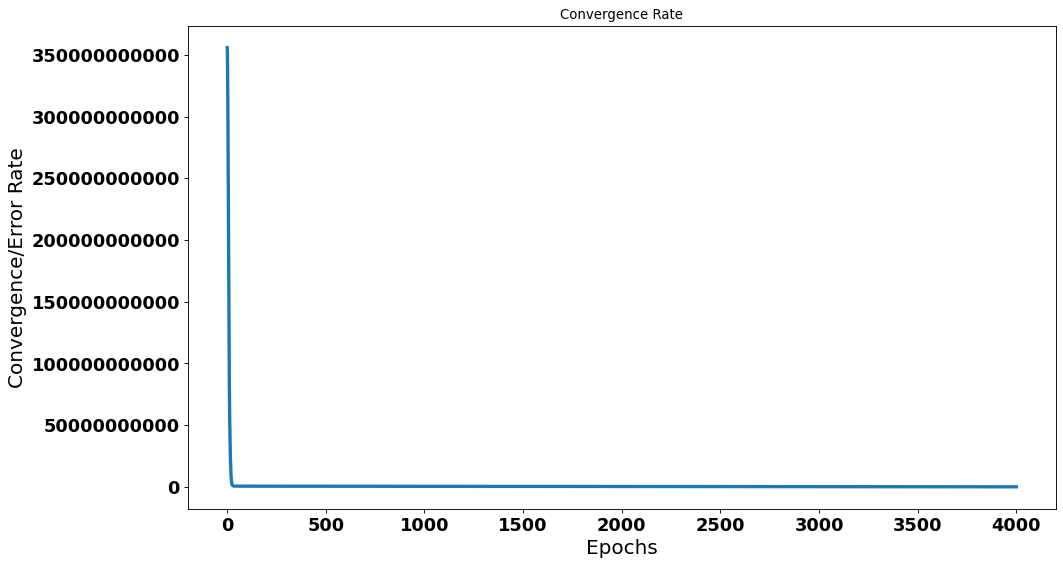

In [37]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(16)
plt.title('Convergence Rate')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.plot(fitting_amfe.history['loss'], linewidth = 3)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Convergence/Error Rate", fontsize=18)
plt.show()

In [38]:
min(fitting_amfe.history['loss'])

37006136.0

#### Training parameters (weights and biases) values of trained ANN

In [39]:
customizeAnn = ann_model_for_evaluation.customize() 
print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

Input Layer weights: 
 [[ 109.87844     86.041954   155.45105   ...  127.49581     89.706955
    86.17692  ]
 [  78.926636   -96.71953     87.71774   ... -121.88989   -105.12739
  -100.22872  ]
 [  38.905903   -41.607273    19.722685  ...  -82.34882    -39.882553
   -38.605663 ]
 [   6.8696113    9.219177   -30.980406  ...  -29.151628    19.226358
    16.116188 ]
 [ -16.585691    26.847727   -65.551     ...   16.663067    31.283459
    28.77091  ]
 [ -35.68591     25.475689   -91.728485  ...   60.897964    12.840825
    15.645604 ]]

 Hidden Layer 1 biases: 
 [ 2.31266841e-02  8.17226887e+00  4.28949432e+01  7.83138561e+00
  7.29740047e+00 -5.04035664e+00  6.93742418e+00  8.49922485e+01
  7.13697815e+00 -2.37238388e+01 -2.07661209e+01  1.61868458e+01
 -2.19618130e+01  6.12150478e+00  1.08539715e+01 -2.05396671e+01
  9.11232758e+00 -7.22179234e-01  6.84309101e+00  4.25932922e+01
 -2.04295082e+01 -1.02822876e+01  4.13878021e+01  4.05179214e+01
 -7.30256557e+00  4.65695267e+01 -1.03751001

#### Evaluating model on train and test sets

In [40]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)

In [41]:
# Evaluation for confirmed cases
trainScore = math.sqrt(mean_squared_error(output_train_tf[:,0], ann_evaluation_model_prediction_on_training[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(output_test_tf[:,0], ann_evaluation_model_prediction_on_test[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6004.69 RMSE
Test Score: 46745.83 RMSE


In [42]:
# Evaluation for deaths
trainScore = math.sqrt(mean_squared_error(output_train_tf[:,1], ann_evaluation_model_prediction_on_training[:,1]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(output_test_tf[:,1], ann_evaluation_model_prediction_on_test[:,1]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 170.28 RMSE
Test Score: 788.45 RMSE


In [43]:
# Evaluation for recovered cases
trainScore = math.sqrt(mean_squared_error(output_train_tf[:,2], ann_evaluation_model_prediction_on_training[:,2]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(output_test_tf[:,2], ann_evaluation_model_prediction_on_test[:,2]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 8912.54 RMSE
Test Score: 79334.79 RMSE


#### An evaluation report of ANN and metrics

In [44]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
print(ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf))
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))
# forecasting_fitting.history.keys()

21/21 [==============================] - 0s 1ms/step - loss: 38506240.0000 - mean_absolute_error: 3471.4910 - mean_squared_error: 38506240.0000
[38506240.0, 3471.490966796875, 38506240.0]
2/2 [==============================] - 0s 3ms/step - loss: 2826600960.0000 - mean_absolute_error: 38401.0195 - mean_squared_error: 2826600960.0000
[2826600960.0, 38401.01953125, 2826600960.0]


<h4>Plots between Predictions and Acutal Data for Training and Test Set</h4>
<p>The graphs has been plotted for training and test sets where grpahs in first column are showing predictions and 2nd column is represeting error between predicted and actual value.
    <br>
First row graphs is plotted for training data. 2nd row graph is plotted for test data.
    <br>
Remember: Training and test data were splitted by taking 0.05 ratio for test data with no randomization.</p>

In [45]:
# min(ann_evaluation_model_prediction_on_test)
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape


(1447,)

In [46]:
# # plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=13)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates_train, 
#          ann_evaluation_model_prediction_on_training[:,0], '*b', 
#          ann_evaluation_model_prediction_on_training[:,1], '*r', 
#          ann_evaluation_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.show()

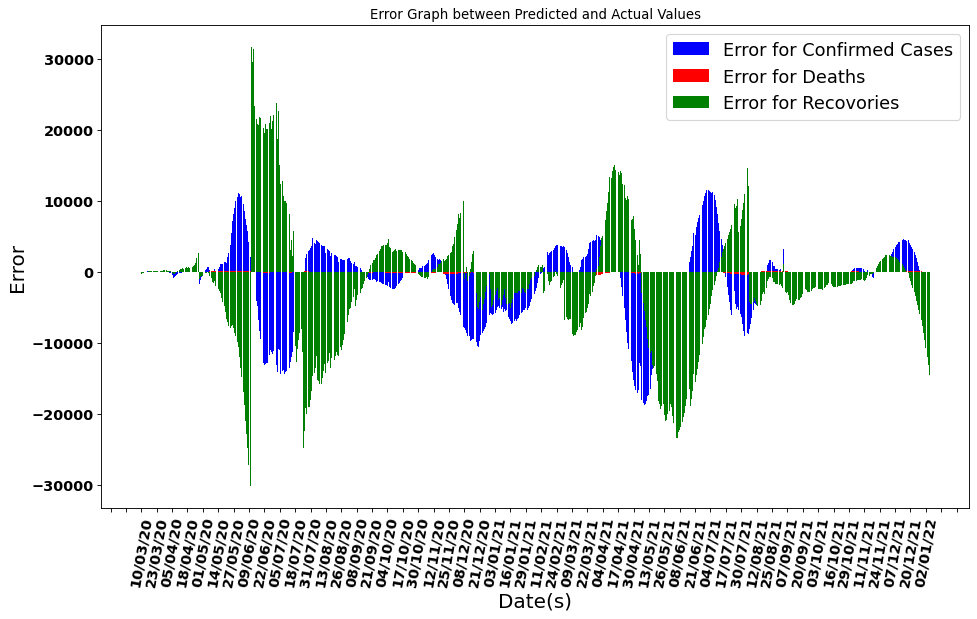

In [47]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Error", fontsize=18)
plt.show()

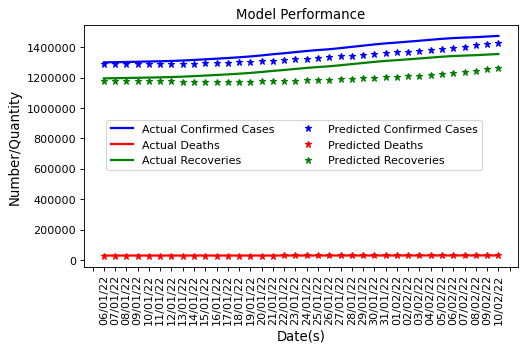

In [156]:
figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator()) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=10)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.0)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recoveries', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recoveries'], prop = {'size': 10}, bbox_to_anchor =(0.93, 0.63), ncol=2)
plt.xticks(rotation=90);
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e4)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.xlabel("Date(s)", fontsize=12)
plt.title("Model Performance")
plt.ylabel("Number/Quantity", fontsize=12)
plt.show()

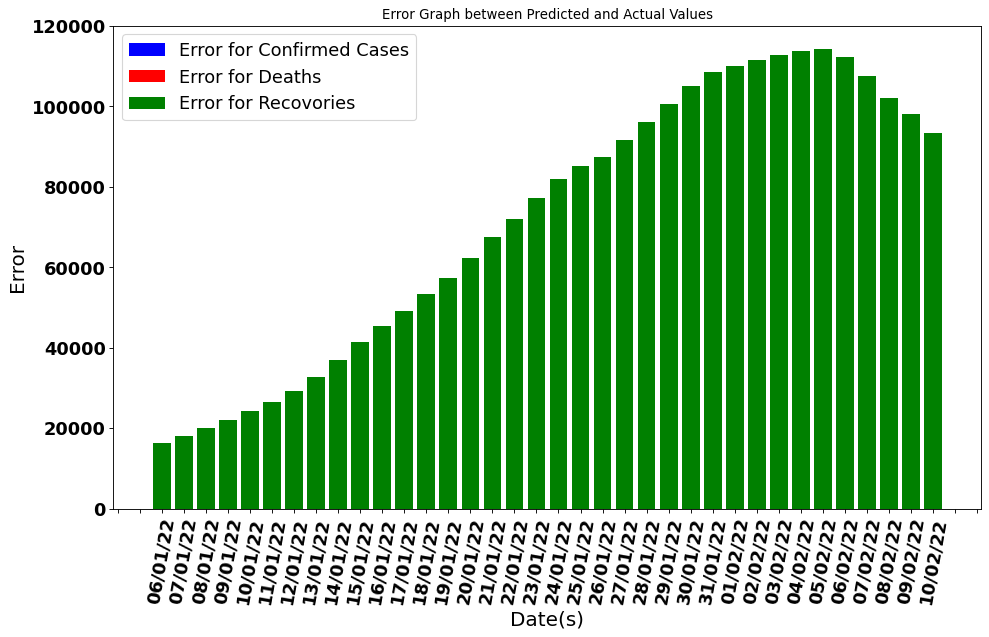

In [49]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test, abs(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test, abs(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test, abs(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Error", fontsize=18)
plt.yticks(weight='bold')
plt.show()

# 2 - Training on whole data and prediction on future data

In [50]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               1400      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [51]:
fitting_amff = ann_model_for_future.fit(best_epochs)

Epoch 1/4000
22/22 [==============================] - 0s 999us/step - loss: 397363838976.0000 - mean_absolute_error: 429325.5625 - mean_squared_error: 397363838976.0000
Epoch 2/4000
22/22 [==============================] - 0s 1ms/step - loss: 391549255680.0000 - mean_absolute_error: 424466.7500 - mean_squared_error: 391549255680.0000
Epoch 3/4000
22/22 [==============================] - 0s 1ms/step - loss: 376555405312.0000 - mean_absolute_error: 414795.6875 - mean_squared_error: 376555405312.0000
Epoch 4/4000
22/22 [==============================] - 0s 1ms/step - loss: 351097552896.0000 - mean_absolute_error: 399815.4688 - mean_squared_error: 351097552896.0000
Epoch 5/4000
22/22 [==============================] - 0s 1ms/step - loss: 317231824896.0000 - mean_absolute_error: 379990.6562 - mean_squared_error: 317231824896.0000
Epoch 6/4000
22/22 [==============================] - 0s 1ms/step - loss: 276505133056.0000 - mean_absolute_error: 355684.5000 - mean_squared_error: 276505133056.0

22/22 [==============================] - 0s 2ms/step - loss: 546315200.0000 - mean_absolute_error: 14565.6064 - mean_squared_error: 546315200.0000
Epoch 52/4000
22/22 [==============================] - 0s 999us/step - loss: 544388224.0000 - mean_absolute_error: 14441.4551 - mean_squared_error: 544388224.0000
Epoch 53/4000
22/22 [==============================] - 0s 952us/step - loss: 544198336.0000 - mean_absolute_error: 14533.4619 - mean_squared_error: 544198336.0000
Epoch 54/4000
22/22 [==============================] - 0s 952us/step - loss: 544311168.0000 - mean_absolute_error: 14548.5645 - mean_squared_error: 544311168.0000
Epoch 55/4000
22/22 [==============================] - 0s 1ms/step - loss: 543605248.0000 - mean_absolute_error: 14435.4385 - mean_squared_error: 543605248.0000
Epoch 56/4000
22/22 [==============================] - 0s 999us/step - loss: 542150080.0000 - mean_absolute_error: 14577.4395 - mean_squared_error: 542150080.0000
Epoch 57/4000
22/22 [===================

22/22 [==============================] - 0s 1ms/step - loss: 529562560.0000 - mean_absolute_error: 14331.2490 - mean_squared_error: 529562560.0000
Epoch 102/4000
22/22 [==============================] - 0s 1ms/step - loss: 532507040.0000 - mean_absolute_error: 14415.3965 - mean_squared_error: 532507040.0000
Epoch 103/4000
22/22 [==============================] - 0s 1ms/step - loss: 529678720.0000 - mean_absolute_error: 14310.4893 - mean_squared_error: 529678720.0000
Epoch 104/4000
22/22 [==============================] - 0s 1ms/step - loss: 533952704.0000 - mean_absolute_error: 14374.4707 - mean_squared_error: 533952704.0000
Epoch 105/4000
22/22 [==============================] - 0s 999us/step - loss: 529809536.0000 - mean_absolute_error: 14330.6943 - mean_squared_error: 529809536.0000
Epoch 106/4000
22/22 [==============================] - 0s 1ms/step - loss: 530774304.0000 - mean_absolute_error: 14330.9033 - mean_squared_error: 530774304.0000
Epoch 107/4000
22/22 [===================

22/22 [==============================] - 0s 952us/step - loss: 525600672.0000 - mean_absolute_error: 14441.3613 - mean_squared_error: 525600672.0000
Epoch 152/4000
22/22 [==============================] - 0s 952us/step - loss: 521649376.0000 - mean_absolute_error: 14262.3359 - mean_squared_error: 521649376.0000
Epoch 153/4000
22/22 [==============================] - 0s 952us/step - loss: 522152992.0000 - mean_absolute_error: 14275.5088 - mean_squared_error: 522152992.0000
Epoch 154/4000
22/22 [==============================] - 0s 952us/step - loss: 519773536.0000 - mean_absolute_error: 14194.3555 - mean_squared_error: 519773536.0000
Epoch 155/4000
22/22 [==============================] - 0s 1ms/step - loss: 521338176.0000 - mean_absolute_error: 14199.1660 - mean_squared_error: 521338176.0000
Epoch 156/4000
22/22 [==============================] - 0s 1ms/step - loss: 524271904.0000 - mean_absolute_error: 14387.4121 - mean_squared_error: 524271904.0000
Epoch 157/4000
22/22 [=============

22/22 [==============================] - 0s 1ms/step - loss: 516908384.0000 - mean_absolute_error: 14356.1250 - mean_squared_error: 516908384.0000
Epoch 202/4000
22/22 [==============================] - 0s 999us/step - loss: 515829376.0000 - mean_absolute_error: 14358.6045 - mean_squared_error: 515829376.0000
Epoch 203/4000
22/22 [==============================] - 0s 952us/step - loss: 512801216.0000 - mean_absolute_error: 14323.0186 - mean_squared_error: 512801216.0000
Epoch 204/4000
22/22 [==============================] - 0s 952us/step - loss: 513641952.0000 - mean_absolute_error: 14349.2773 - mean_squared_error: 513641952.0000
Epoch 205/4000
22/22 [==============================] - 0s 952us/step - loss: 514658912.0000 - mean_absolute_error: 14254.3018 - mean_squared_error: 514658912.0000
Epoch 206/4000
22/22 [==============================] - 0s 952us/step - loss: 513160224.0000 - mean_absolute_error: 14243.4697 - mean_squared_error: 513160224.0000
Epoch 207/4000
22/22 [===========

22/22 [==============================] - 0s 1ms/step - loss: 507488256.0000 - mean_absolute_error: 14330.7627 - mean_squared_error: 507488256.0000
Epoch 252/4000
22/22 [==============================] - 0s 2ms/step - loss: 506746368.0000 - mean_absolute_error: 14318.4512 - mean_squared_error: 506746368.0000
Epoch 253/4000
22/22 [==============================] - 0s 1ms/step - loss: 511484064.0000 - mean_absolute_error: 14453.3242 - mean_squared_error: 511484064.0000
Epoch 254/4000
22/22 [==============================] - 0s 1ms/step - loss: 505959936.0000 - mean_absolute_error: 14324.1475 - mean_squared_error: 505959936.0000
Epoch 255/4000
22/22 [==============================] - 0s 1ms/step - loss: 506121280.0000 - mean_absolute_error: 14348.4482 - mean_squared_error: 506121280.0000
Epoch 256/4000
22/22 [==============================] - 0s 1ms/step - loss: 509754944.0000 - mean_absolute_error: 14419.4434 - mean_squared_error: 509754944.0000
Epoch 257/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 499008992.0000 - mean_absolute_error: 14248.0127 - mean_squared_error: 499008992.0000
Epoch 302/4000
22/22 [==============================] - 0s 1ms/step - loss: 497270912.0000 - mean_absolute_error: 14203.7012 - mean_squared_error: 497270912.0000
Epoch 303/4000
22/22 [==============================] - 0s 1ms/step - loss: 497798400.0000 - mean_absolute_error: 14411.8682 - mean_squared_error: 497798400.0000
Epoch 304/4000
22/22 [==============================] - 0s 1ms/step - loss: 498521824.0000 - mean_absolute_error: 14280.2148 - mean_squared_error: 498521824.0000
Epoch 305/4000
22/22 [==============================] - 0s 1ms/step - loss: 496266272.0000 - mean_absolute_error: 14209.1025 - mean_squared_error: 496266272.0000
Epoch 306/4000
22/22 [==============================] - 0s 1ms/step - loss: 497444160.0000 - mean_absolute_error: 14202.5088 - mean_squared_error: 497444160.0000
Epoch 307/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 494761920.0000 - mean_absolute_error: 14300.4102 - mean_squared_error: 494761920.0000
Epoch 352/4000
22/22 [==============================] - 0s 1ms/step - loss: 491569792.0000 - mean_absolute_error: 14118.0400 - mean_squared_error: 491569792.0000
Epoch 353/4000
22/22 [==============================] - 0s 1ms/step - loss: 497250304.0000 - mean_absolute_error: 14494.9746 - mean_squared_error: 497250304.0000
Epoch 354/4000
22/22 [==============================] - 0s 1ms/step - loss: 496317728.0000 - mean_absolute_error: 14330.6260 - mean_squared_error: 496317728.0000
Epoch 355/4000
22/22 [==============================] - 0s 1ms/step - loss: 491084352.0000 - mean_absolute_error: 14307.6670 - mean_squared_error: 491084352.0000
Epoch 356/4000
22/22 [==============================] - 0s 1ms/step - loss: 489907744.0000 - mean_absolute_error: 14127.7881 - mean_squared_error: 489907744.0000
Epoch 357/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 479487392.0000 - mean_absolute_error: 14030.5762 - mean_squared_error: 479487392.0000
Epoch 402/4000
22/22 [==============================] - 0s 2ms/step - loss: 478953184.0000 - mean_absolute_error: 13962.0098 - mean_squared_error: 478953184.0000
Epoch 403/4000
22/22 [==============================] - 0s 2ms/step - loss: 476219456.0000 - mean_absolute_error: 13929.4229 - mean_squared_error: 476219456.0000
Epoch 404/4000
22/22 [==============================] - 0s 2ms/step - loss: 476844768.0000 - mean_absolute_error: 13982.9570 - mean_squared_error: 476844768.0000
Epoch 405/4000
22/22 [==============================] - 0s 1ms/step - loss: 479836032.0000 - mean_absolute_error: 14070.5566 - mean_squared_error: 479836032.0000
Epoch 406/4000
22/22 [==============================] - 0s 1ms/step - loss: 475022496.0000 - mean_absolute_error: 13918.2422 - mean_squared_error: 475022496.0000
Epoch 407/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 474820064.0000 - mean_absolute_error: 13771.3281 - mean_squared_error: 474820064.0000
Epoch 452/4000
22/22 [==============================] - 0s 1ms/step - loss: 467704064.0000 - mean_absolute_error: 13926.3115 - mean_squared_error: 467704064.0000
Epoch 453/4000
22/22 [==============================] - 0s 1ms/step - loss: 464233856.0000 - mean_absolute_error: 13761.8887 - mean_squared_error: 464233856.0000
Epoch 454/4000
22/22 [==============================] - 0s 1ms/step - loss: 466373440.0000 - mean_absolute_error: 13838.7539 - mean_squared_error: 466373440.0000
Epoch 455/4000
22/22 [==============================] - 0s 1ms/step - loss: 464455648.0000 - mean_absolute_error: 13720.3896 - mean_squared_error: 464455648.0000
Epoch 456/4000
22/22 [==============================] - 0s 1ms/step - loss: 462752928.0000 - mean_absolute_error: 13648.6426 - mean_squared_error: 462752928.0000
Epoch 457/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 452693792.0000 - mean_absolute_error: 13420.9346 - mean_squared_error: 452693792.0000
Epoch 502/4000
22/22 [==============================] - 0s 2ms/step - loss: 452750336.0000 - mean_absolute_error: 13426.8633 - mean_squared_error: 452750336.0000
Epoch 503/4000
22/22 [==============================] - 0s 2ms/step - loss: 458948512.0000 - mean_absolute_error: 13791.8682 - mean_squared_error: 458948512.0000
Epoch 504/4000
22/22 [==============================] - 0s 2ms/step - loss: 457508032.0000 - mean_absolute_error: 13659.4307 - mean_squared_error: 457508032.0000
Epoch 505/4000
22/22 [==============================] - 0s 2ms/step - loss: 460259424.0000 - mean_absolute_error: 13792.1504 - mean_squared_error: 460259424.0000
Epoch 506/4000
22/22 [==============================] - 0s 1ms/step - loss: 453196352.0000 - mean_absolute_error: 13594.5928 - mean_squared_error: 453196352.0000
Epoch 507/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 443058816.0000 - mean_absolute_error: 13392.8232 - mean_squared_error: 443058816.0000
Epoch 552/4000
22/22 [==============================] - 0s 1ms/step - loss: 446416864.0000 - mean_absolute_error: 13460.8154 - mean_squared_error: 446416864.0000
Epoch 553/4000
22/22 [==============================] - 0s 1ms/step - loss: 447482432.0000 - mean_absolute_error: 13535.2529 - mean_squared_error: 447482432.0000
Epoch 554/4000
22/22 [==============================] - 0s 1ms/step - loss: 446808800.0000 - mean_absolute_error: 13440.9258 - mean_squared_error: 446808800.0000
Epoch 555/4000
22/22 [==============================] - 0s 1ms/step - loss: 451370112.0000 - mean_absolute_error: 13457.8350 - mean_squared_error: 451370112.0000
Epoch 556/4000
22/22 [==============================] - 0s 1ms/step - loss: 442296256.0000 - mean_absolute_error: 13276.8359 - mean_squared_error: 442296256.0000
Epoch 557/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 441041536.0000 - mean_absolute_error: 13335.7598 - mean_squared_error: 441041536.0000
Epoch 602/4000
22/22 [==============================] - 0s 1ms/step - loss: 438514560.0000 - mean_absolute_error: 13393.8545 - mean_squared_error: 438514560.0000
Epoch 603/4000
22/22 [==============================] - 0s 1ms/step - loss: 444159104.0000 - mean_absolute_error: 13500.0195 - mean_squared_error: 444159104.0000
Epoch 604/4000
22/22 [==============================] - 0s 1ms/step - loss: 436225760.0000 - mean_absolute_error: 13410.9355 - mean_squared_error: 436225760.0000
Epoch 605/4000
22/22 [==============================] - 0s 999us/step - loss: 448305632.0000 - mean_absolute_error: 13489.4023 - mean_squared_error: 448305632.0000
Epoch 606/4000
22/22 [==============================] - 0s 1ms/step - loss: 443424352.0000 - mean_absolute_error: 13517.0371 - mean_squared_error: 443424352.0000
Epoch 607/4000
22/22 [===================

22/22 [==============================] - 0s 1ms/step - loss: 428555648.0000 - mean_absolute_error: 13188.4434 - mean_squared_error: 428555648.0000
Epoch 652/4000
22/22 [==============================] - 0s 1ms/step - loss: 431581504.0000 - mean_absolute_error: 13309.6328 - mean_squared_error: 431581504.0000
Epoch 653/4000
22/22 [==============================] - 0s 1ms/step - loss: 427077312.0000 - mean_absolute_error: 13188.3145 - mean_squared_error: 427077312.0000
Epoch 654/4000
22/22 [==============================] - 0s 1ms/step - loss: 430608992.0000 - mean_absolute_error: 13268.7383 - mean_squared_error: 430608992.0000
Epoch 655/4000
22/22 [==============================] - 0s 1ms/step - loss: 429063776.0000 - mean_absolute_error: 13293.4053 - mean_squared_error: 429063776.0000
Epoch 656/4000
22/22 [==============================] - 0s 1ms/step - loss: 431712480.0000 - mean_absolute_error: 13276.4590 - mean_squared_error: 431712480.0000
Epoch 657/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 421723040.0000 - mean_absolute_error: 13074.9219 - mean_squared_error: 421723040.0000
Epoch 702/4000
22/22 [==============================] - 0s 1ms/step - loss: 422241824.0000 - mean_absolute_error: 13063.5928 - mean_squared_error: 422241824.0000
Epoch 703/4000
22/22 [==============================] - 0s 1ms/step - loss: 425036672.0000 - mean_absolute_error: 13275.8320 - mean_squared_error: 425036672.0000
Epoch 704/4000
22/22 [==============================] - 0s 1ms/step - loss: 420486304.0000 - mean_absolute_error: 13067.1279 - mean_squared_error: 420486304.0000
Epoch 705/4000
22/22 [==============================] - 0s 1ms/step - loss: 420730304.0000 - mean_absolute_error: 13021.8252 - mean_squared_error: 420730304.0000
Epoch 706/4000
22/22 [==============================] - 0s 1ms/step - loss: 419547104.0000 - mean_absolute_error: 13109.6328 - mean_squared_error: 419547104.0000
Epoch 707/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 421901088.0000 - mean_absolute_error: 13301.4238 - mean_squared_error: 421901088.0000
Epoch 752/4000
22/22 [==============================] - 0s 1ms/step - loss: 414362592.0000 - mean_absolute_error: 13058.5303 - mean_squared_error: 414362592.0000
Epoch 753/4000
22/22 [==============================] - 0s 1ms/step - loss: 416422592.0000 - mean_absolute_error: 13074.4805 - mean_squared_error: 416422592.0000
Epoch 754/4000
22/22 [==============================] - 0s 1ms/step - loss: 414217216.0000 - mean_absolute_error: 12978.4619 - mean_squared_error: 414217216.0000
Epoch 755/4000
22/22 [==============================] - 0s 1ms/step - loss: 417273216.0000 - mean_absolute_error: 13038.3213 - mean_squared_error: 417273216.0000
Epoch 756/4000
22/22 [==============================] - 0s 1ms/step - loss: 416557728.0000 - mean_absolute_error: 13051.1006 - mean_squared_error: 416557728.0000
Epoch 757/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 416724640.0000 - mean_absolute_error: 13185.5986 - mean_squared_error: 416724640.0000
Epoch 802/4000
22/22 [==============================] - 0s 1ms/step - loss: 414496416.0000 - mean_absolute_error: 13077.6475 - mean_squared_error: 414496416.0000
Epoch 803/4000
22/22 [==============================] - 0s 1ms/step - loss: 407689376.0000 - mean_absolute_error: 12934.2578 - mean_squared_error: 407689376.0000
Epoch 804/4000
22/22 [==============================] - 0s 1ms/step - loss: 412181600.0000 - mean_absolute_error: 12967.6162 - mean_squared_error: 412181600.0000
Epoch 805/4000
22/22 [==============================] - 0s 1ms/step - loss: 409956032.0000 - mean_absolute_error: 13057.1875 - mean_squared_error: 409956032.0000
Epoch 806/4000
22/22 [==============================] - 0s 1ms/step - loss: 408857152.0000 - mean_absolute_error: 12988.0596 - mean_squared_error: 408857152.0000
Epoch 807/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 403684704.0000 - mean_absolute_error: 12919.3203 - mean_squared_error: 403684704.0000
Epoch 852/4000
22/22 [==============================] - 0s 1ms/step - loss: 404503232.0000 - mean_absolute_error: 12931.3799 - mean_squared_error: 404503232.0000
Epoch 853/4000
22/22 [==============================] - 0s 1ms/step - loss: 404387424.0000 - mean_absolute_error: 12938.9414 - mean_squared_error: 404387424.0000
Epoch 854/4000
22/22 [==============================] - 0s 1ms/step - loss: 402490144.0000 - mean_absolute_error: 12878.5234 - mean_squared_error: 402490144.0000
Epoch 855/4000
22/22 [==============================] - 0s 1ms/step - loss: 402548672.0000 - mean_absolute_error: 12887.1680 - mean_squared_error: 402548672.0000
Epoch 856/4000
22/22 [==============================] - 0s 1ms/step - loss: 406366080.0000 - mean_absolute_error: 12964.1719 - mean_squared_error: 406366080.0000
Epoch 857/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 397514944.0000 - mean_absolute_error: 12786.2676 - mean_squared_error: 397514944.0000
Epoch 902/4000
22/22 [==============================] - 0s 2ms/step - loss: 397762048.0000 - mean_absolute_error: 12822.1113 - mean_squared_error: 397762048.0000
Epoch 903/4000
22/22 [==============================] - 0s 1ms/step - loss: 402459456.0000 - mean_absolute_error: 13061.2656 - mean_squared_error: 402459456.0000
Epoch 904/4000
22/22 [==============================] - 0s 1ms/step - loss: 398830080.0000 - mean_absolute_error: 12891.2471 - mean_squared_error: 398830080.0000
Epoch 905/4000
22/22 [==============================] - 0s 1ms/step - loss: 398657216.0000 - mean_absolute_error: 12944.4229 - mean_squared_error: 398657216.0000
Epoch 906/4000
22/22 [==============================] - 0s 999us/step - loss: 403025952.0000 - mean_absolute_error: 12923.3213 - mean_squared_error: 403025952.0000
Epoch 907/4000
22/22 [===================

22/22 [==============================] - 0s 1ms/step - loss: 394680832.0000 - mean_absolute_error: 12816.1182 - mean_squared_error: 394680832.0000
Epoch 952/4000
22/22 [==============================] - 0s 1ms/step - loss: 399202528.0000 - mean_absolute_error: 12913.0039 - mean_squared_error: 399202528.0000
Epoch 953/4000
22/22 [==============================] - 0s 1ms/step - loss: 397384160.0000 - mean_absolute_error: 12925.7998 - mean_squared_error: 397384160.0000
Epoch 954/4000
22/22 [==============================] - 0s 1ms/step - loss: 400182528.0000 - mean_absolute_error: 12893.6729 - mean_squared_error: 400182528.0000
Epoch 955/4000
22/22 [==============================] - 0s 1ms/step - loss: 394677888.0000 - mean_absolute_error: 12748.2930 - mean_squared_error: 394677888.0000
Epoch 956/4000
22/22 [==============================] - 0s 1ms/step - loss: 402812544.0000 - mean_absolute_error: 13029.0371 - mean_squared_error: 402812544.0000
Epoch 957/4000
22/22 [=====================

22/22 [==============================] - 0s 1ms/step - loss: 395020608.0000 - mean_absolute_error: 12775.9072 - mean_squared_error: 395020608.0000
Epoch 1002/4000
22/22 [==============================] - 0s 1ms/step - loss: 396747584.0000 - mean_absolute_error: 13048.8076 - mean_squared_error: 396747584.0000
Epoch 1003/4000
22/22 [==============================] - 0s 1ms/step - loss: 391070848.0000 - mean_absolute_error: 12779.5244 - mean_squared_error: 391070848.0000
Epoch 1004/4000
22/22 [==============================] - 0s 1ms/step - loss: 397996992.0000 - mean_absolute_error: 13006.2676 - mean_squared_error: 397996992.0000
Epoch 1005/4000
22/22 [==============================] - 0s 1ms/step - loss: 391295776.0000 - mean_absolute_error: 12792.0664 - mean_squared_error: 391295776.0000
Epoch 1006/4000
22/22 [==============================] - 0s 1ms/step - loss: 388939744.0000 - mean_absolute_error: 12711.5674 - mean_squared_error: 388939744.0000
Epoch 1007/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 400840000.0000 - mean_absolute_error: 13028.6396 - mean_squared_error: 400840000.0000
Epoch 1052/4000
22/22 [==============================] - 0s 1ms/step - loss: 389810144.0000 - mean_absolute_error: 12781.4668 - mean_squared_error: 389810144.0000
Epoch 1053/4000
22/22 [==============================] - 0s 1ms/step - loss: 383709536.0000 - mean_absolute_error: 12623.3730 - mean_squared_error: 383709536.0000
Epoch 1054/4000
22/22 [==============================] - 0s 1ms/step - loss: 385441408.0000 - mean_absolute_error: 12699.7373 - mean_squared_error: 385441408.0000
Epoch 1055/4000
22/22 [==============================] - 0s 1ms/step - loss: 391292480.0000 - mean_absolute_error: 12927.3584 - mean_squared_error: 391292480.0000
Epoch 1056/4000
22/22 [==============================] - 0s 1ms/step - loss: 392619840.0000 - mean_absolute_error: 12901.7607 - mean_squared_error: 392619840.0000
Epoch 1057/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 386059584.0000 - mean_absolute_error: 12796.8916 - mean_squared_error: 386059584.0000
Epoch 1101/4000
22/22 [==============================] - 0s 1ms/step - loss: 386043840.0000 - mean_absolute_error: 12676.3770 - mean_squared_error: 386043840.0000
Epoch 1102/4000
22/22 [==============================] - 0s 1ms/step - loss: 384544064.0000 - mean_absolute_error: 12706.3672 - mean_squared_error: 384544064.0000
Epoch 1103/4000
22/22 [==============================] - 0s 1ms/step - loss: 385621216.0000 - mean_absolute_error: 12738.6611 - mean_squared_error: 385621216.0000
Epoch 1104/4000
22/22 [==============================] - 0s 1ms/step - loss: 384981024.0000 - mean_absolute_error: 12750.0537 - mean_squared_error: 384981024.0000
Epoch 1105/4000
22/22 [==============================] - 0s 1ms/step - loss: 385842720.0000 - mean_absolute_error: 12755.8506 - mean_squared_error: 385842720.0000
Epoch 1106/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 381980832.0000 - mean_absolute_error: 12703.7158 - mean_squared_error: 381980832.0000
Epoch 1151/4000
22/22 [==============================] - 0s 1ms/step - loss: 379309536.0000 - mean_absolute_error: 12617.7383 - mean_squared_error: 379309536.0000
Epoch 1152/4000
22/22 [==============================] - 0s 1ms/step - loss: 384816320.0000 - mean_absolute_error: 12805.8535 - mean_squared_error: 384816320.0000
Epoch 1153/4000
22/22 [==============================] - 0s 1ms/step - loss: 381580512.0000 - mean_absolute_error: 12594.3369 - mean_squared_error: 381580512.0000
Epoch 1154/4000
22/22 [==============================] - 0s 1ms/step - loss: 380350048.0000 - mean_absolute_error: 12690.2080 - mean_squared_error: 380350048.0000
Epoch 1155/4000
22/22 [==============================] - 0s 1ms/step - loss: 379671104.0000 - mean_absolute_error: 12686.0850 - mean_squared_error: 379671104.0000
Epoch 1156/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 380413536.0000 - mean_absolute_error: 12696.1650 - mean_squared_error: 380413536.0000
Epoch 1201/4000
22/22 [==============================] - 0s 1ms/step - loss: 376372160.0000 - mean_absolute_error: 12630.3613 - mean_squared_error: 376372160.0000
Epoch 1202/4000
22/22 [==============================] - ETA: 0s - loss: 373247296.0000 - mean_absolute_error: 12922.3076 - mean_squared_error: 373247296.00 - 0s 1ms/step - loss: 377752800.0000 - mean_absolute_error: 12689.3672 - mean_squared_error: 377752800.0000
Epoch 1203/4000
22/22 [==============================] - 0s 1ms/step - loss: 379823104.0000 - mean_absolute_error: 12730.1738 - mean_squared_error: 379823104.0000
Epoch 1204/4000
22/22 [==============================] - 0s 1ms/step - loss: 384971360.0000 - mean_absolute_error: 12868.5449 - mean_squared_error: 384971360.0000
Epoch 1205/4000
22/22 [==============================] - 0s 1ms/step - loss: 381452672.0000 - mean_

22/22 [==============================] - 0s 1ms/step - loss: 382583680.0000 - mean_absolute_error: 12736.3428 - mean_squared_error: 382583680.0000
Epoch 1250/4000
22/22 [==============================] - 0s 1ms/step - loss: 378712000.0000 - mean_absolute_error: 12738.0801 - mean_squared_error: 378712000.0000
Epoch 1251/4000
22/22 [==============================] - 0s 1ms/step - loss: 375705600.0000 - mean_absolute_error: 12507.1816 - mean_squared_error: 375705600.0000
Epoch 1252/4000
22/22 [==============================] - 0s 1ms/step - loss: 374485600.0000 - mean_absolute_error: 12625.7607 - mean_squared_error: 374485600.0000
Epoch 1253/4000
22/22 [==============================] - 0s 1ms/step - loss: 374981600.0000 - mean_absolute_error: 12549.3545 - mean_squared_error: 374981600.0000
Epoch 1254/4000
22/22 [==============================] - 0s 1ms/step - loss: 378814944.0000 - mean_absolute_error: 12744.1006 - mean_squared_error: 378814944.0000
Epoch 1255/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 373580608.0000 - mean_absolute_error: 12620.9512 - mean_squared_error: 373580608.0000
Epoch 1300/4000
22/22 [==============================] - 0s 1ms/step - loss: 372006400.0000 - mean_absolute_error: 12543.4395 - mean_squared_error: 372006400.0000
Epoch 1301/4000
22/22 [==============================] - 0s 1ms/step - loss: 372318368.0000 - mean_absolute_error: 12588.0781 - mean_squared_error: 372318368.0000
Epoch 1302/4000
22/22 [==============================] - 0s 1ms/step - loss: 371982592.0000 - mean_absolute_error: 12492.6113 - mean_squared_error: 371982592.0000
Epoch 1303/4000
22/22 [==============================] - 0s 1ms/step - loss: 374489920.0000 - mean_absolute_error: 12645.2617 - mean_squared_error: 374489920.0000
Epoch 1304/4000
22/22 [==============================] - 0s 1ms/step - loss: 374804096.0000 - mean_absolute_error: 12675.5049 - mean_squared_error: 374804096.0000
Epoch 1305/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 369076640.0000 - mean_absolute_error: 12463.1680 - mean_squared_error: 369076640.0000
Epoch 1350/4000
22/22 [==============================] - 0s 2ms/step - loss: 373488896.0000 - mean_absolute_error: 12619.8135 - mean_squared_error: 373488896.0000
Epoch 1351/4000
22/22 [==============================] - 0s 3ms/step - loss: 377810464.0000 - mean_absolute_error: 12679.6670 - mean_squared_error: 377810464.0000
Epoch 1352/4000
22/22 [==============================] - 0s 2ms/step - loss: 374517792.0000 - mean_absolute_error: 12576.8535 - mean_squared_error: 374517792.0000
Epoch 1353/4000
22/22 [==============================] - 0s 2ms/step - loss: 371855168.0000 - mean_absolute_error: 12655.4961 - mean_squared_error: 371855168.0000
Epoch 1354/4000
22/22 [==============================] - 0s 2ms/step - loss: 372504864.0000 - mean_absolute_error: 12560.4150 - mean_squared_error: 372504864.0000
Epoch 1355/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 374155520.0000 - mean_absolute_error: 12490.2959 - mean_squared_error: 374155520.0000
Epoch 1400/4000
22/22 [==============================] - 0s 1ms/step - loss: 368110976.0000 - mean_absolute_error: 12582.0430 - mean_squared_error: 368110976.0000
Epoch 1401/4000
22/22 [==============================] - 0s 1ms/step - loss: 367111712.0000 - mean_absolute_error: 12427.1748 - mean_squared_error: 367111712.0000
Epoch 1402/4000
22/22 [==============================] - 0s 1ms/step - loss: 371701536.0000 - mean_absolute_error: 12657.3184 - mean_squared_error: 371701536.0000
Epoch 1403/4000
22/22 [==============================] - 0s 1ms/step - loss: 369416064.0000 - mean_absolute_error: 12488.3574 - mean_squared_error: 369416064.0000
Epoch 1404/4000
22/22 [==============================] - 0s 1ms/step - loss: 370788928.0000 - mean_absolute_error: 12587.5508 - mean_squared_error: 370788928.0000
Epoch 1405/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 368029792.0000 - mean_absolute_error: 12514.2158 - mean_squared_error: 368029792.0000
Epoch 1449/4000
22/22 [==============================] - 0s 1ms/step - loss: 371056096.0000 - mean_absolute_error: 12466.5137 - mean_squared_error: 371056096.0000
Epoch 1450/4000
22/22 [==============================] - 0s 1ms/step - loss: 365574944.0000 - mean_absolute_error: 12491.6475 - mean_squared_error: 365574944.0000
Epoch 1451/4000
22/22 [==============================] - 0s 1ms/step - loss: 368656000.0000 - mean_absolute_error: 12547.3711 - mean_squared_error: 368656000.0000
Epoch 1452/4000
22/22 [==============================] - 0s 1ms/step - loss: 363352320.0000 - mean_absolute_error: 12363.2764 - mean_squared_error: 363352320.0000
Epoch 1453/4000
22/22 [==============================] - 0s 1ms/step - loss: 362644544.0000 - mean_absolute_error: 12394.4570 - mean_squared_error: 362644544.0000
Epoch 1454/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 361255424.0000 - mean_absolute_error: 12338.9072 - mean_squared_error: 361255424.0000
Epoch 1499/4000
22/22 [==============================] - 0s 1ms/step - loss: 362339424.0000 - mean_absolute_error: 12391.3428 - mean_squared_error: 362339424.0000
Epoch 1500/4000
22/22 [==============================] - 0s 1ms/step - loss: 366213472.0000 - mean_absolute_error: 12576.3682 - mean_squared_error: 366213472.0000
Epoch 1501/4000
22/22 [==============================] - 0s 1ms/step - loss: 365532896.0000 - mean_absolute_error: 12385.9717 - mean_squared_error: 365532896.0000
Epoch 1502/4000
22/22 [==============================] - 0s 1ms/step - loss: 367656736.0000 - mean_absolute_error: 12494.5352 - mean_squared_error: 367656736.0000
Epoch 1503/4000
22/22 [==============================] - 0s 1ms/step - loss: 362469504.0000 - mean_absolute_error: 12409.0381 - mean_squared_error: 362469504.0000
Epoch 1504/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 364880576.0000 - mean_absolute_error: 12334.5176 - mean_squared_error: 364880576.0000
Epoch 1549/4000
22/22 [==============================] - 0s 1ms/step - loss: 370008224.0000 - mean_absolute_error: 12605.0186 - mean_squared_error: 370008224.0000
Epoch 1550/4000
22/22 [==============================] - 0s 1ms/step - loss: 364279584.0000 - mean_absolute_error: 12466.7705 - mean_squared_error: 364279584.0000
Epoch 1551/4000
22/22 [==============================] - 0s 1ms/step - loss: 362268736.0000 - mean_absolute_error: 12409.1084 - mean_squared_error: 362268736.0000
Epoch 1552/4000
22/22 [==============================] - 0s 999us/step - loss: 363214144.0000 - mean_absolute_error: 12397.1318 - mean_squared_error: 363214144.0000
Epoch 1553/4000
22/22 [==============================] - 0s 1ms/step - loss: 364365152.0000 - mean_absolute_error: 12478.9131 - mean_squared_error: 364365152.0000
Epoch 1554/4000
22/22 [=============

22/22 [==============================] - 0s 1ms/step - loss: 363053440.0000 - mean_absolute_error: 12339.5020 - mean_squared_error: 363053440.0000
Epoch 1599/4000
22/22 [==============================] - 0s 1ms/step - loss: 358960288.0000 - mean_absolute_error: 12390.5166 - mean_squared_error: 358960288.0000
Epoch 1600/4000
22/22 [==============================] - 0s 1ms/step - loss: 358877184.0000 - mean_absolute_error: 12410.6172 - mean_squared_error: 358877184.0000
Epoch 1601/4000
22/22 [==============================] - 0s 1ms/step - loss: 363311456.0000 - mean_absolute_error: 12427.8936 - mean_squared_error: 363311456.0000
Epoch 1602/4000
22/22 [==============================] - 0s 1ms/step - loss: 362790688.0000 - mean_absolute_error: 12446.2344 - mean_squared_error: 362790688.0000
Epoch 1603/4000
22/22 [==============================] - 0s 1ms/step - loss: 363607840.0000 - mean_absolute_error: 12417.8535 - mean_squared_error: 363607840.0000
Epoch 1604/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 368055584.0000 - mean_absolute_error: 12589.2275 - mean_squared_error: 368055584.0000
Epoch 1649/4000
22/22 [==============================] - 0s 1ms/step - loss: 360169344.0000 - mean_absolute_error: 12207.6797 - mean_squared_error: 360169344.0000
Epoch 1650/4000
22/22 [==============================] - 0s 1ms/step - loss: 358072416.0000 - mean_absolute_error: 12315.4414 - mean_squared_error: 358072416.0000
Epoch 1651/4000
22/22 [==============================] - 0s 1ms/step - loss: 358605184.0000 - mean_absolute_error: 12373.9600 - mean_squared_error: 358605184.0000
Epoch 1652/4000
22/22 [==============================] - 0s 1ms/step - loss: 361456448.0000 - mean_absolute_error: 12308.2588 - mean_squared_error: 361456448.0000
Epoch 1653/4000
22/22 [==============================] - 0s 1ms/step - loss: 359593664.0000 - mean_absolute_error: 12394.2969 - mean_squared_error: 359593664.0000
Epoch 1654/4000
22/22 [===============

22/22 [==============================] - 0s 2ms/step - loss: 358730304.0000 - mean_absolute_error: 12329.5293 - mean_squared_error: 358730304.0000
Epoch 1698/4000
22/22 [==============================] - 0s 2ms/step - loss: 356497536.0000 - mean_absolute_error: 12320.8447 - mean_squared_error: 356497536.0000
Epoch 1699/4000
22/22 [==============================] - 0s 2ms/step - loss: 354665536.0000 - mean_absolute_error: 12321.7031 - mean_squared_error: 354665536.0000
Epoch 1700/4000
22/22 [==============================] - 0s 2ms/step - loss: 355450912.0000 - mean_absolute_error: 12310.1963 - mean_squared_error: 355450912.0000
Epoch 1701/4000
22/22 [==============================] - 0s 2ms/step - loss: 357131616.0000 - mean_absolute_error: 12310.5449 - mean_squared_error: 357131616.0000
Epoch 1702/4000
22/22 [==============================] - 0s 1ms/step - loss: 355905184.0000 - mean_absolute_error: 12344.4492 - mean_squared_error: 355905184.0000
Epoch 1703/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 359775744.0000 - mean_absolute_error: 12406.2588 - mean_squared_error: 359775744.0000
Epoch 1747/4000
22/22 [==============================] - 0s 1ms/step - loss: 356893536.0000 - mean_absolute_error: 12214.2900 - mean_squared_error: 356893536.0000
Epoch 1748/4000
22/22 [==============================] - 0s 1ms/step - loss: 359744384.0000 - mean_absolute_error: 12303.9150 - mean_squared_error: 359744384.0000
Epoch 1749/4000
22/22 [==============================] - 0s 1ms/step - loss: 366900000.0000 - mean_absolute_error: 12517.9014 - mean_squared_error: 366900000.0000
Epoch 1750/4000
22/22 [==============================] - 0s 1ms/step - loss: 358374976.0000 - mean_absolute_error: 12336.9336 - mean_squared_error: 358374976.0000
Epoch 1751/4000
22/22 [==============================] - 0s 1ms/step - loss: 353445088.0000 - mean_absolute_error: 12251.9961 - mean_squared_error: 353445088.0000
Epoch 1752/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 352688032.0000 - mean_absolute_error: 12228.6113 - mean_squared_error: 352688032.0000
Epoch 1797/4000
22/22 [==============================] - 0s 1ms/step - loss: 351876288.0000 - mean_absolute_error: 12144.5420 - mean_squared_error: 351876288.0000
Epoch 1798/4000
22/22 [==============================] - 0s 1ms/step - loss: 355805216.0000 - mean_absolute_error: 12423.0498 - mean_squared_error: 355805216.0000
Epoch 1799/4000
22/22 [==============================] - 0s 1ms/step - loss: 356222272.0000 - mean_absolute_error: 12295.3936 - mean_squared_error: 356222272.0000
Epoch 1800/4000
22/22 [==============================] - 0s 1ms/step - loss: 362631584.0000 - mean_absolute_error: 12403.6328 - mean_squared_error: 362631584.0000
Epoch 1801/4000
22/22 [==============================] - 0s 1ms/step - loss: 358276416.0000 - mean_absolute_error: 12177.9307 - mean_squared_error: 358276416.0000
Epoch 1802/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 351378880.0000 - mean_absolute_error: 12233.9834 - mean_squared_error: 351378880.0000
Epoch 1847/4000
22/22 [==============================] - 0s 1ms/step - loss: 350518752.0000 - mean_absolute_error: 12244.9941 - mean_squared_error: 350518752.0000
Epoch 1848/4000
22/22 [==============================] - 0s 1ms/step - loss: 349687392.0000 - mean_absolute_error: 12165.3496 - mean_squared_error: 349687392.0000
Epoch 1849/4000
22/22 [==============================] - 0s 1ms/step - loss: 353743936.0000 - mean_absolute_error: 12213.6689 - mean_squared_error: 353743936.0000
Epoch 1850/4000
22/22 [==============================] - 0s 1ms/step - loss: 351981248.0000 - mean_absolute_error: 12309.6689 - mean_squared_error: 351981248.0000
Epoch 1851/4000
22/22 [==============================] - 0s 1ms/step - loss: 354739872.0000 - mean_absolute_error: 12072.7891 - mean_squared_error: 354739872.0000
Epoch 1852/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 350593632.0000 - mean_absolute_error: 12159.9307 - mean_squared_error: 350593632.0000
Epoch 1897/4000
22/22 [==============================] - 0s 1ms/step - loss: 347980608.0000 - mean_absolute_error: 12218.3027 - mean_squared_error: 347980608.0000
Epoch 1898/4000
22/22 [==============================] - 0s 1ms/step - loss: 350498752.0000 - mean_absolute_error: 12152.8838 - mean_squared_error: 350498752.0000
Epoch 1899/4000
22/22 [==============================] - 0s 1ms/step - loss: 353053888.0000 - mean_absolute_error: 12291.7373 - mean_squared_error: 353053888.0000
Epoch 1900/4000
22/22 [==============================] - ETA: 0s - loss: 163025600.0000 - mean_absolute_error: 8191.0127 - mean_squared_error: 163025600.000 - 0s 2ms/step - loss: 348117376.0000 - mean_absolute_error: 12063.1084 - mean_squared_error: 348117376.0000
Epoch 1901/4000
22/22 [==============================] - 0s 1ms/step - loss: 357654880.0000 - mean_

22/22 [==============================] - 0s 1ms/step - loss: 346187264.0000 - mean_absolute_error: 12100.2148 - mean_squared_error: 346187264.0000
Epoch 1946/4000
22/22 [==============================] - 0s 1ms/step - loss: 348309696.0000 - mean_absolute_error: 12182.2158 - mean_squared_error: 348309696.0000
Epoch 1947/4000
22/22 [==============================] - 0s 1ms/step - loss: 347228896.0000 - mean_absolute_error: 12152.5977 - mean_squared_error: 347228896.0000
Epoch 1948/4000
22/22 [==============================] - 0s 1ms/step - loss: 348248512.0000 - mean_absolute_error: 12009.5615 - mean_squared_error: 348248512.0000
Epoch 1949/4000
22/22 [==============================] - 0s 1ms/step - loss: 347135488.0000 - mean_absolute_error: 12233.5586 - mean_squared_error: 347135488.0000
Epoch 1950/4000
22/22 [==============================] - 0s 1ms/step - loss: 347730464.0000 - mean_absolute_error: 12033.8652 - mean_squared_error: 347730464.0000
Epoch 1951/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 354470176.0000 - mean_absolute_error: 12217.3262 - mean_squared_error: 354470176.0000
Epoch 1995/4000
22/22 [==============================] - 0s 1ms/step - loss: 372386944.0000 - mean_absolute_error: 12753.9873 - mean_squared_error: 372386944.0000
Epoch 1996/4000
22/22 [==============================] - 0s 1ms/step - loss: 356733440.0000 - mean_absolute_error: 12351.3027 - mean_squared_error: 356733440.0000
Epoch 1997/4000
22/22 [==============================] - 0s 1ms/step - loss: 348764544.0000 - mean_absolute_error: 12203.3799 - mean_squared_error: 348764544.0000
Epoch 1998/4000
22/22 [==============================] - 0s 1ms/step - loss: 345435552.0000 - mean_absolute_error: 12063.8818 - mean_squared_error: 345435552.0000
Epoch 1999/4000
22/22 [==============================] - 0s 1ms/step - loss: 344709888.0000 - mean_absolute_error: 12126.9043 - mean_squared_error: 344709888.0000
Epoch 2000/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 343515072.0000 - mean_absolute_error: 12165.8047 - mean_squared_error: 343515072.0000
Epoch 2045/4000
22/22 [==============================] - 0s 1ms/step - loss: 342722976.0000 - mean_absolute_error: 11990.3516 - mean_squared_error: 342722976.0000
Epoch 2046/4000
22/22 [==============================] - 0s 1ms/step - loss: 345555584.0000 - mean_absolute_error: 12106.3682 - mean_squared_error: 345555584.0000
Epoch 2047/4000
22/22 [==============================] - 0s 1ms/step - loss: 349406528.0000 - mean_absolute_error: 12173.9014 - mean_squared_error: 349406528.0000
Epoch 2048/4000
22/22 [==============================] - 0s 1ms/step - loss: 350166944.0000 - mean_absolute_error: 12173.5244 - mean_squared_error: 350166944.0000
Epoch 2049/4000
22/22 [==============================] - 0s 1ms/step - loss: 346841664.0000 - mean_absolute_error: 12110.2246 - mean_squared_error: 346841664.0000
Epoch 2050/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 339536320.0000 - mean_absolute_error: 11988.0430 - mean_squared_error: 339536320.0000
Epoch 2095/4000
22/22 [==============================] - 0s 1ms/step - loss: 343688064.0000 - mean_absolute_error: 12073.5898 - mean_squared_error: 343688064.0000
Epoch 2096/4000
22/22 [==============================] - 0s 1ms/step - loss: 339010528.0000 - mean_absolute_error: 11990.3652 - mean_squared_error: 339010528.0000
Epoch 2097/4000
22/22 [==============================] - 0s 1ms/step - loss: 347444160.0000 - mean_absolute_error: 12106.8818 - mean_squared_error: 347444160.0000
Epoch 2098/4000
22/22 [==============================] - 0s 1ms/step - loss: 345904448.0000 - mean_absolute_error: 11996.0508 - mean_squared_error: 345904448.0000
Epoch 2099/4000
22/22 [==============================] - 0s 1ms/step - loss: 343463904.0000 - mean_absolute_error: 12074.6816 - mean_squared_error: 343463904.0000
Epoch 2100/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 349988576.0000 - mean_absolute_error: 12142.1250 - mean_squared_error: 349988576.0000
Epoch 2145/4000
22/22 [==============================] - 0s 1ms/step - loss: 340056992.0000 - mean_absolute_error: 11966.6357 - mean_squared_error: 340056992.0000
Epoch 2146/4000
22/22 [==============================] - 0s 1ms/step - loss: 344535840.0000 - mean_absolute_error: 11982.0029 - mean_squared_error: 344535840.0000
Epoch 2147/4000
22/22 [==============================] - 0s 1ms/step - loss: 342118464.0000 - mean_absolute_error: 12095.9463 - mean_squared_error: 342118464.0000
Epoch 2148/4000
22/22 [==============================] - 0s 1ms/step - loss: 343585984.0000 - mean_absolute_error: 12014.1709 - mean_squared_error: 343585984.0000
Epoch 2149/4000
22/22 [==============================] - 0s 1ms/step - loss: 342259872.0000 - mean_absolute_error: 12145.4023 - mean_squared_error: 342259872.0000
Epoch 2150/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 341938208.0000 - mean_absolute_error: 12018.6924 - mean_squared_error: 341938208.0000
Epoch 2195/4000
22/22 [==============================] - 0s 1ms/step - loss: 337859200.0000 - mean_absolute_error: 11952.4121 - mean_squared_error: 337859200.0000
Epoch 2196/4000
22/22 [==============================] - 0s 1ms/step - loss: 342218496.0000 - mean_absolute_error: 11912.7598 - mean_squared_error: 342218496.0000
Epoch 2197/4000
22/22 [==============================] - 0s 1ms/step - loss: 338061472.0000 - mean_absolute_error: 11976.7764 - mean_squared_error: 338061472.0000
Epoch 2198/4000
22/22 [==============================] - 0s 1ms/step - loss: 342546208.0000 - mean_absolute_error: 12046.7324 - mean_squared_error: 342546208.0000
Epoch 2199/4000
22/22 [==============================] - 0s 1ms/step - loss: 340065568.0000 - mean_absolute_error: 11991.0117 - mean_squared_error: 340065568.0000
Epoch 2200/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 335233312.0000 - mean_absolute_error: 11956.9727 - mean_squared_error: 335233312.0000
Epoch 2245/4000
22/22 [==============================] - 0s 1ms/step - loss: 337459360.0000 - mean_absolute_error: 11869.8965 - mean_squared_error: 337459360.0000
Epoch 2246/4000
22/22 [==============================] - 0s 1ms/step - loss: 338947168.0000 - mean_absolute_error: 12011.2715 - mean_squared_error: 338947168.0000
Epoch 2247/4000
22/22 [==============================] - 0s 1ms/step - loss: 351906624.0000 - mean_absolute_error: 12312.5508 - mean_squared_error: 351906624.0000
Epoch 2248/4000
22/22 [==============================] - 0s 1ms/step - loss: 336086528.0000 - mean_absolute_error: 11879.9609 - mean_squared_error: 336086528.0000
Epoch 2249/4000
22/22 [==============================] - 0s 1ms/step - loss: 337170784.0000 - mean_absolute_error: 12013.4766 - mean_squared_error: 337170784.0000
Epoch 2250/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 339622208.0000 - mean_absolute_error: 11850.7959 - mean_squared_error: 339622208.0000
Epoch 2294/4000
22/22 [==============================] - 0s 1ms/step - loss: 334574368.0000 - mean_absolute_error: 11827.5635 - mean_squared_error: 334574368.0000
Epoch 2295/4000
22/22 [==============================] - 0s 1ms/step - loss: 332299360.0000 - mean_absolute_error: 11835.9307 - mean_squared_error: 332299360.0000
Epoch 2296/4000
22/22 [==============================] - 0s 1ms/step - loss: 335331968.0000 - mean_absolute_error: 11827.4307 - mean_squared_error: 335331968.0000
Epoch 2297/4000
22/22 [==============================] - 0s 1ms/step - loss: 336434176.0000 - mean_absolute_error: 11963.4639 - mean_squared_error: 336434176.0000
Epoch 2298/4000
22/22 [==============================] - 0s 1ms/step - loss: 338281856.0000 - mean_absolute_error: 11980.0400 - mean_squared_error: 338281856.0000
Epoch 2299/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 336883072.0000 - mean_absolute_error: 11902.7637 - mean_squared_error: 336883072.0000
Epoch 2344/4000
22/22 [==============================] - 0s 1ms/step - loss: 347677216.0000 - mean_absolute_error: 12252.4697 - mean_squared_error: 347677216.0000
Epoch 2345/4000
22/22 [==============================] - 0s 1ms/step - loss: 340295488.0000 - mean_absolute_error: 11903.8311 - mean_squared_error: 340295488.0000
Epoch 2346/4000
22/22 [==============================] - 0s 1ms/step - loss: 342301600.0000 - mean_absolute_error: 12137.0312 - mean_squared_error: 342301600.0000
Epoch 2347/4000
22/22 [==============================] - 0s 1ms/step - loss: 353682912.0000 - mean_absolute_error: 12379.4883 - mean_squared_error: 353682912.0000
Epoch 2348/4000
22/22 [==============================] - 0s 1ms/step - loss: 340484928.0000 - mean_absolute_error: 11946.4854 - mean_squared_error: 340484928.0000
Epoch 2349/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 331011648.0000 - mean_absolute_error: 11861.3809 - mean_squared_error: 331011648.0000
Epoch 2394/4000
22/22 [==============================] - 0s 1ms/step - loss: 337669792.0000 - mean_absolute_error: 11901.9424 - mean_squared_error: 337669792.0000
Epoch 2395/4000
22/22 [==============================] - 0s 1ms/step - loss: 330528640.0000 - mean_absolute_error: 11811.0010 - mean_squared_error: 330528640.0000
Epoch 2396/4000
22/22 [==============================] - 0s 1ms/step - loss: 333594624.0000 - mean_absolute_error: 11682.2549 - mean_squared_error: 333594624.0000
Epoch 2397/4000
22/22 [==============================] - 0s 1ms/step - loss: 342137312.0000 - mean_absolute_error: 12044.9102 - mean_squared_error: 342137312.0000
Epoch 2398/4000
22/22 [==============================] - 0s 1ms/step - loss: 332230176.0000 - mean_absolute_error: 11823.8789 - mean_squared_error: 332230176.0000
Epoch 2399/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 328960512.0000 - mean_absolute_error: 11637.3789 - mean_squared_error: 328960512.0000
Epoch 2444/4000
22/22 [==============================] - 0s 2ms/step - loss: 328991616.0000 - mean_absolute_error: 11830.3516 - mean_squared_error: 328991616.0000
Epoch 2445/4000
22/22 [==============================] - 0s 2ms/step - loss: 325427552.0000 - mean_absolute_error: 11677.7705 - mean_squared_error: 325427552.0000
Epoch 2446/4000
22/22 [==============================] - 0s 2ms/step - loss: 331694560.0000 - mean_absolute_error: 11748.6221 - mean_squared_error: 331694560.0000
Epoch 2447/4000
22/22 [==============================] - 0s 2ms/step - loss: 327444320.0000 - mean_absolute_error: 11677.7793 - mean_squared_error: 327444320.0000
Epoch 2448/4000
22/22 [==============================] - 0s 1ms/step - loss: 332846336.0000 - mean_absolute_error: 11930.6133 - mean_squared_error: 332846336.0000
Epoch 2449/4000
22/22 [===============

22/22 [==============================] - 0s 2ms/step - loss: 324046304.0000 - mean_absolute_error: 11615.0986 - mean_squared_error: 324046304.0000
Epoch 2494/4000
22/22 [==============================] - 0s 1ms/step - loss: 323014080.0000 - mean_absolute_error: 11639.6934 - mean_squared_error: 323014080.0000
Epoch 2495/4000
22/22 [==============================] - 0s 1ms/step - loss: 327378528.0000 - mean_absolute_error: 11725.5869 - mean_squared_error: 327378528.0000
Epoch 2496/4000
22/22 [==============================] - 0s 1ms/step - loss: 330286144.0000 - mean_absolute_error: 11770.3047 - mean_squared_error: 330286144.0000
Epoch 2497/4000
22/22 [==============================] - 0s 1ms/step - loss: 337937536.0000 - mean_absolute_error: 12018.2812 - mean_squared_error: 337937536.0000
Epoch 2498/4000
22/22 [==============================] - 0s 1ms/step - loss: 325351968.0000 - mean_absolute_error: 11630.5723 - mean_squared_error: 325351968.0000
Epoch 2499/4000
22/22 [===============

22/22 [==============================] - 0s 2ms/step - loss: 333044640.0000 - mean_absolute_error: 11826.6689 - mean_squared_error: 333044640.0000
Epoch 2544/4000
22/22 [==============================] - 0s 2ms/step - loss: 335597952.0000 - mean_absolute_error: 11903.2783 - mean_squared_error: 335597952.0000
Epoch 2545/4000
22/22 [==============================] - 0s 2ms/step - loss: 338786176.0000 - mean_absolute_error: 12069.0693 - mean_squared_error: 338786176.0000
Epoch 2546/4000
22/22 [==============================] - 0s 1ms/step - loss: 325105568.0000 - mean_absolute_error: 11728.6250 - mean_squared_error: 325105568.0000
Epoch 2547/4000
22/22 [==============================] - 0s 1ms/step - loss: 325967008.0000 - mean_absolute_error: 11679.1826 - mean_squared_error: 325967008.0000
Epoch 2548/4000
22/22 [==============================] - 0s 1ms/step - loss: 324971008.0000 - mean_absolute_error: 11654.9971 - mean_squared_error: 324971008.0000
Epoch 2549/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 320535520.0000 - mean_absolute_error: 11559.9775 - mean_squared_error: 320535520.0000
Epoch 2593/4000
22/22 [==============================] - 0s 1ms/step - loss: 322562304.0000 - mean_absolute_error: 11625.0146 - mean_squared_error: 322562304.0000
Epoch 2594/4000
22/22 [==============================] - 0s 1ms/step - loss: 333866240.0000 - mean_absolute_error: 11946.6719 - mean_squared_error: 333866240.0000
Epoch 2595/4000
22/22 [==============================] - 0s 1ms/step - loss: 329087872.0000 - mean_absolute_error: 11757.0010 - mean_squared_error: 329087872.0000
Epoch 2596/4000
22/22 [==============================] - 0s 1ms/step - loss: 322668768.0000 - mean_absolute_error: 11604.2373 - mean_squared_error: 322668768.0000
Epoch 2597/4000
22/22 [==============================] - 0s 1ms/step - loss: 327034464.0000 - mean_absolute_error: 11658.3057 - mean_squared_error: 327034464.0000
Epoch 2598/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 322080800.0000 - mean_absolute_error: 11579.3828 - mean_squared_error: 322080800.0000
Epoch 2643/4000
22/22 [==============================] - 0s 1ms/step - loss: 319570848.0000 - mean_absolute_error: 11661.2109 - mean_squared_error: 319570848.0000
Epoch 2644/4000
22/22 [==============================] - 0s 1ms/step - loss: 321258656.0000 - mean_absolute_error: 11494.2256 - mean_squared_error: 321258656.0000
Epoch 2645/4000
22/22 [==============================] - 0s 1ms/step - loss: 327024928.0000 - mean_absolute_error: 11715.8887 - mean_squared_error: 327024928.0000
Epoch 2646/4000
22/22 [==============================] - 0s 1ms/step - loss: 330049280.0000 - mean_absolute_error: 11793.8809 - mean_squared_error: 330049280.0000
Epoch 2647/4000
22/22 [==============================] - 0s 1ms/step - loss: 329973120.0000 - mean_absolute_error: 11726.7666 - mean_squared_error: 329973120.0000
Epoch 2648/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 321639424.0000 - mean_absolute_error: 11550.2666 - mean_squared_error: 321639424.0000
Epoch 2693/4000
22/22 [==============================] - 0s 1ms/step - loss: 316795840.0000 - mean_absolute_error: 11460.5898 - mean_squared_error: 316795840.0000
Epoch 2694/4000
22/22 [==============================] - 0s 1ms/step - loss: 316478176.0000 - mean_absolute_error: 11521.1006 - mean_squared_error: 316478176.0000
Epoch 2695/4000
22/22 [==============================] - 0s 1ms/step - loss: 323006432.0000 - mean_absolute_error: 11550.3311 - mean_squared_error: 323006432.0000
Epoch 2696/4000
22/22 [==============================] - 0s 1ms/step - loss: 319369088.0000 - mean_absolute_error: 11531.6221 - mean_squared_error: 319369088.0000
Epoch 2697/4000
22/22 [==============================] - 0s 1ms/step - loss: 320123456.0000 - mean_absolute_error: 11493.8662 - mean_squared_error: 320123456.0000
Epoch 2698/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 319118176.0000 - mean_absolute_error: 11571.2705 - mean_squared_error: 319118176.0000
Epoch 2743/4000
22/22 [==============================] - 0s 1ms/step - loss: 318729152.0000 - mean_absolute_error: 11438.8936 - mean_squared_error: 318729152.0000
Epoch 2744/4000
22/22 [==============================] - 0s 1ms/step - loss: 317616736.0000 - mean_absolute_error: 11504.1719 - mean_squared_error: 317616736.0000
Epoch 2745/4000
22/22 [==============================] - 0s 1ms/step - loss: 315053472.0000 - mean_absolute_error: 11399.6436 - mean_squared_error: 315053472.0000
Epoch 2746/4000
22/22 [==============================] - 0s 1ms/step - loss: 316762688.0000 - mean_absolute_error: 11448.7734 - mean_squared_error: 316762688.0000
Epoch 2747/4000
22/22 [==============================] - 0s 1ms/step - loss: 316481632.0000 - mean_absolute_error: 11510.5977 - mean_squared_error: 316481632.0000
Epoch 2748/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 313767872.0000 - mean_absolute_error: 11426.3584 - mean_squared_error: 313767872.0000
Epoch 2793/4000
22/22 [==============================] - 0s 1ms/step - loss: 314347808.0000 - mean_absolute_error: 11425.8486 - mean_squared_error: 314347808.0000
Epoch 2794/4000
22/22 [==============================] - 0s 1ms/step - loss: 318787808.0000 - mean_absolute_error: 11449.8447 - mean_squared_error: 318787808.0000
Epoch 2795/4000
22/22 [==============================] - 0s 1ms/step - loss: 315270656.0000 - mean_absolute_error: 11458.0430 - mean_squared_error: 315270656.0000
Epoch 2796/4000
22/22 [==============================] - 0s 1ms/step - loss: 313997536.0000 - mean_absolute_error: 11365.5674 - mean_squared_error: 313997536.0000
Epoch 2797/4000
22/22 [==============================] - 0s 1ms/step - loss: 313990304.0000 - mean_absolute_error: 11373.5889 - mean_squared_error: 313990304.0000
Epoch 2798/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 320031648.0000 - mean_absolute_error: 11504.8604 - mean_squared_error: 320031648.0000
Epoch 2843/4000
22/22 [==============================] - 0s 1ms/step - loss: 323991136.0000 - mean_absolute_error: 11533.2471 - mean_squared_error: 323991136.0000
Epoch 2844/4000
22/22 [==============================] - 0s 1ms/step - loss: 321275328.0000 - mean_absolute_error: 11606.3994 - mean_squared_error: 321275328.0000
Epoch 2845/4000
22/22 [==============================] - 0s 1ms/step - loss: 311856192.0000 - mean_absolute_error: 11335.9512 - mean_squared_error: 311856192.0000
Epoch 2846/4000
22/22 [==============================] - 0s 1ms/step - loss: 310693184.0000 - mean_absolute_error: 11348.4043 - mean_squared_error: 310693184.0000
Epoch 2847/4000
22/22 [==============================] - 0s 1ms/step - loss: 312065216.0000 - mean_absolute_error: 11356.2529 - mean_squared_error: 312065216.0000
Epoch 2848/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 315469440.0000 - mean_absolute_error: 11451.6543 - mean_squared_error: 315469440.0000
Epoch 2893/4000
22/22 [==============================] - 0s 1ms/step - loss: 315193120.0000 - mean_absolute_error: 11373.1465 - mean_squared_error: 315193120.0000
Epoch 2894/4000
22/22 [==============================] - 0s 1ms/step - loss: 316481408.0000 - mean_absolute_error: 11449.6104 - mean_squared_error: 316481408.0000
Epoch 2895/4000
22/22 [==============================] - 0s 1ms/step - loss: 310996320.0000 - mean_absolute_error: 11277.1963 - mean_squared_error: 310996320.0000
Epoch 2896/4000
22/22 [==============================] - 0s 1ms/step - loss: 316252256.0000 - mean_absolute_error: 11434.0127 - mean_squared_error: 316252256.0000
Epoch 2897/4000
22/22 [==============================] - 0s 2ms/step - loss: 311249728.0000 - mean_absolute_error: 11400.7080 - mean_squared_error: 311249728.0000
Epoch 2898/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 307338816.0000 - mean_absolute_error: 11220.3389 - mean_squared_error: 307338816.0000
Epoch 2943/4000
22/22 [==============================] - 0s 1ms/step - loss: 313113760.0000 - mean_absolute_error: 11444.3838 - mean_squared_error: 313113760.0000
Epoch 2944/4000
22/22 [==============================] - 0s 1ms/step - loss: 310484192.0000 - mean_absolute_error: 11323.3125 - mean_squared_error: 310484192.0000
Epoch 2945/4000
22/22 [==============================] - 0s 1ms/step - loss: 310753632.0000 - mean_absolute_error: 11303.3340 - mean_squared_error: 310753632.0000
Epoch 2946/4000
22/22 [==============================] - 0s 1ms/step - loss: 310825472.0000 - mean_absolute_error: 11316.8936 - mean_squared_error: 310825472.0000
Epoch 2947/4000
22/22 [==============================] - 0s 1ms/step - loss: 308093472.0000 - mean_absolute_error: 11266.4502 - mean_squared_error: 308093472.0000
Epoch 2948/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 305328128.0000 - mean_absolute_error: 11140.3770 - mean_squared_error: 305328128.0000
Epoch 2993/4000
22/22 [==============================] - 0s 1ms/step - loss: 309832352.0000 - mean_absolute_error: 11305.6973 - mean_squared_error: 309832352.0000
Epoch 2994/4000
22/22 [==============================] - 0s 1ms/step - loss: 312011840.0000 - mean_absolute_error: 11466.1230 - mean_squared_error: 312011840.0000
Epoch 2995/4000
22/22 [==============================] - 0s 1ms/step - loss: 316524768.0000 - mean_absolute_error: 11516.9395 - mean_squared_error: 316524768.0000
Epoch 2996/4000
22/22 [==============================] - 0s 1ms/step - loss: 314607872.0000 - mean_absolute_error: 11364.4775 - mean_squared_error: 314607872.0000
Epoch 2997/4000
22/22 [==============================] - 0s 1ms/step - loss: 307430464.0000 - mean_absolute_error: 11218.8477 - mean_squared_error: 307430464.0000
Epoch 2998/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 307013760.0000 - mean_absolute_error: 11318.8721 - mean_squared_error: 307013760.0000
Epoch 3043/4000
22/22 [==============================] - 0s 1ms/step - loss: 308870528.0000 - mean_absolute_error: 11259.0068 - mean_squared_error: 308870528.0000
Epoch 3044/4000
22/22 [==============================] - 0s 1ms/step - loss: 306026144.0000 - mean_absolute_error: 11265.9619 - mean_squared_error: 306026144.0000
Epoch 3045/4000
22/22 [==============================] - 0s 1ms/step - loss: 303614112.0000 - mean_absolute_error: 11210.8076 - mean_squared_error: 303614112.0000
Epoch 3046/4000
22/22 [==============================] - 0s 1ms/step - loss: 302330080.0000 - mean_absolute_error: 11112.4258 - mean_squared_error: 302330080.0000
Epoch 3047/4000
22/22 [==============================] - 0s 1ms/step - loss: 303743616.0000 - mean_absolute_error: 11133.9697 - mean_squared_error: 303743616.0000
Epoch 3048/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 305970816.0000 - mean_absolute_error: 11227.0508 - mean_squared_error: 305970816.0000
Epoch 3092/4000
22/22 [==============================] - 0s 1ms/step - loss: 312174688.0000 - mean_absolute_error: 11344.6348 - mean_squared_error: 312174688.0000
Epoch 3093/4000
22/22 [==============================] - 0s 1ms/step - loss: 311520704.0000 - mean_absolute_error: 11413.7773 - mean_squared_error: 311520704.0000
Epoch 3094/4000
22/22 [==============================] - 0s 2ms/step - loss: 301649888.0000 - mean_absolute_error: 11160.6689 - mean_squared_error: 301649888.0000
Epoch 3095/4000
22/22 [==============================] - 0s 2ms/step - loss: 301062112.0000 - mean_absolute_error: 11099.5098 - mean_squared_error: 301062112.0000
Epoch 3096/4000
22/22 [==============================] - 0s 1ms/step - loss: 301763584.0000 - mean_absolute_error: 11191.8447 - mean_squared_error: 301763584.0000
Epoch 3097/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 313392064.0000 - mean_absolute_error: 11423.6660 - mean_squared_error: 313392064.0000
Epoch 3142/4000
22/22 [==============================] - 0s 1ms/step - loss: 314987360.0000 - mean_absolute_error: 11373.0371 - mean_squared_error: 314987360.0000
Epoch 3143/4000
22/22 [==============================] - 0s 1ms/step - loss: 310021216.0000 - mean_absolute_error: 11477.8037 - mean_squared_error: 310021216.0000
Epoch 3144/4000
22/22 [==============================] - 0s 1ms/step - loss: 303203456.0000 - mean_absolute_error: 11256.1436 - mean_squared_error: 303203456.0000
Epoch 3145/4000
22/22 [==============================] - 0s 1ms/step - loss: 298986240.0000 - mean_absolute_error: 11039.4561 - mean_squared_error: 298986240.0000
Epoch 3146/4000
22/22 [==============================] - 0s 1ms/step - loss: 305575328.0000 - mean_absolute_error: 11281.9619 - mean_squared_error: 305575328.0000
Epoch 3147/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 302685312.0000 - mean_absolute_error: 11131.6729 - mean_squared_error: 302685312.0000
Epoch 3192/4000
22/22 [==============================] - 0s 1ms/step - loss: 294769984.0000 - mean_absolute_error: 10969.4502 - mean_squared_error: 294769984.0000
Epoch 3193/4000
22/22 [==============================] - 0s 1ms/step - loss: 301629824.0000 - mean_absolute_error: 11152.1162 - mean_squared_error: 301629856.0000
Epoch 3194/4000
22/22 [==============================] - 0s 1ms/step - loss: 302619840.0000 - mean_absolute_error: 11237.4248 - mean_squared_error: 302619840.0000
Epoch 3195/4000
22/22 [==============================] - 0s 1ms/step - loss: 309109088.0000 - mean_absolute_error: 11193.3652 - mean_squared_error: 309109088.0000
Epoch 3196/4000
22/22 [==============================] - 0s 2ms/step - loss: 311701024.0000 - mean_absolute_error: 11443.2607 - mean_squared_error: 311701024.0000
Epoch 3197/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 297921504.0000 - mean_absolute_error: 11065.8525 - mean_squared_error: 297921504.0000
Epoch 3242/4000
22/22 [==============================] - 0s 1ms/step - loss: 295364960.0000 - mean_absolute_error: 11042.4287 - mean_squared_error: 295364960.0000
Epoch 3243/4000
22/22 [==============================] - 0s 1ms/step - loss: 298175968.0000 - mean_absolute_error: 11086.7578 - mean_squared_error: 298175968.0000
Epoch 3244/4000
22/22 [==============================] - 0s 1ms/step - loss: 297057408.0000 - mean_absolute_error: 10945.6113 - mean_squared_error: 297057408.0000
Epoch 3245/4000
22/22 [==============================] - 0s 1ms/step - loss: 300740032.0000 - mean_absolute_error: 11189.4229 - mean_squared_error: 300740032.0000
Epoch 3246/4000
22/22 [==============================] - 0s 1ms/step - loss: 301323072.0000 - mean_absolute_error: 11123.9619 - mean_squared_error: 301323072.0000
Epoch 3247/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 298936832.0000 - mean_absolute_error: 11162.0645 - mean_squared_error: 298936832.0000
Epoch 3292/4000
22/22 [==============================] - 0s 1ms/step - loss: 297531808.0000 - mean_absolute_error: 11070.1846 - mean_squared_error: 297531808.0000
Epoch 3293/4000
22/22 [==============================] - 0s 1ms/step - loss: 293430688.0000 - mean_absolute_error: 10923.2969 - mean_squared_error: 293430688.0000
Epoch 3294/4000
22/22 [==============================] - 0s 1ms/step - loss: 294753184.0000 - mean_absolute_error: 10908.9150 - mean_squared_error: 294753184.0000
Epoch 3295/4000
22/22 [==============================] - 0s 1ms/step - loss: 298953664.0000 - mean_absolute_error: 11096.5088 - mean_squared_error: 298953664.0000
Epoch 3296/4000
22/22 [==============================] - 0s 1ms/step - loss: 304053184.0000 - mean_absolute_error: 11287.5488 - mean_squared_error: 304053184.0000
Epoch 3297/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 293873984.0000 - mean_absolute_error: 10906.8232 - mean_squared_error: 293873984.0000
Epoch 3342/4000
22/22 [==============================] - 0s 1ms/step - loss: 294931616.0000 - mean_absolute_error: 11031.1104 - mean_squared_error: 294931616.0000
Epoch 3343/4000
22/22 [==============================] - 0s 1ms/step - loss: 291214912.0000 - mean_absolute_error: 10954.9775 - mean_squared_error: 291214912.0000
Epoch 3344/4000
22/22 [==============================] - 0s 1ms/step - loss: 290748448.0000 - mean_absolute_error: 10875.2051 - mean_squared_error: 290748448.0000
Epoch 3345/4000
22/22 [==============================] - 0s 1ms/step - loss: 294610624.0000 - mean_absolute_error: 10940.7891 - mean_squared_error: 294610624.0000
Epoch 3346/4000
22/22 [==============================] - 0s 1ms/step - loss: 291164384.0000 - mean_absolute_error: 10920.5537 - mean_squared_error: 291164384.0000
Epoch 3347/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 290116160.0000 - mean_absolute_error: 10876.0771 - mean_squared_error: 290116160.0000
Epoch 3391/4000
22/22 [==============================] - 0s 1ms/step - loss: 288080608.0000 - mean_absolute_error: 10853.1533 - mean_squared_error: 288080608.0000
Epoch 3392/4000
22/22 [==============================] - 0s 1ms/step - loss: 291388480.0000 - mean_absolute_error: 10849.7373 - mean_squared_error: 291388480.0000
Epoch 3393/4000
22/22 [==============================] - 0s 1ms/step - loss: 293136224.0000 - mean_absolute_error: 10936.7598 - mean_squared_error: 293136224.0000
Epoch 3394/4000
22/22 [==============================] - 0s 1ms/step - loss: 292514560.0000 - mean_absolute_error: 10945.5654 - mean_squared_error: 292514560.0000
Epoch 3395/4000
22/22 [==============================] - 0s 1ms/step - loss: 295576704.0000 - mean_absolute_error: 11032.8047 - mean_squared_error: 295576704.0000
Epoch 3396/4000
22/22 [===============

22/22 [==============================] - 0s 3ms/step - loss: 295677984.0000 - mean_absolute_error: 11039.1426 - mean_squared_error: 295677984.0000
Epoch 3441/4000
22/22 [==============================] - 0s 1ms/step - loss: 290733184.0000 - mean_absolute_error: 10934.1084 - mean_squared_error: 290733184.0000
Epoch 3442/4000
22/22 [==============================] - 0s 1ms/step - loss: 303418240.0000 - mean_absolute_error: 11330.1963 - mean_squared_error: 303418240.0000
Epoch 3443/4000
22/22 [==============================] - 0s 1ms/step - loss: 288918656.0000 - mean_absolute_error: 10935.4365 - mean_squared_error: 288918656.0000
Epoch 3444/4000
22/22 [==============================] - 0s 1ms/step - loss: 288640000.0000 - mean_absolute_error: 10845.6211 - mean_squared_error: 288640000.0000
Epoch 3445/4000
22/22 [==============================] - 0s 1ms/step - loss: 291496064.0000 - mean_absolute_error: 10842.0693 - mean_squared_error: 291496064.0000
Epoch 3446/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 292325856.0000 - mean_absolute_error: 10955.2246 - mean_squared_error: 292325856.0000
Epoch 3491/4000
22/22 [==============================] - 0s 1ms/step - loss: 288370976.0000 - mean_absolute_error: 10822.6396 - mean_squared_error: 288370976.0000
Epoch 3492/4000
22/22 [==============================] - 0s 1ms/step - loss: 292989440.0000 - mean_absolute_error: 11078.8584 - mean_squared_error: 292989440.0000
Epoch 3493/4000
22/22 [==============================] - 0s 1ms/step - loss: 290116416.0000 - mean_absolute_error: 10926.5244 - mean_squared_error: 290116416.0000
Epoch 3494/4000
22/22 [==============================] - 0s 2ms/step - loss: 285555360.0000 - mean_absolute_error: 10779.3604 - mean_squared_error: 285555360.0000
Epoch 3495/4000
22/22 [==============================] - 0s 1ms/step - loss: 289104288.0000 - mean_absolute_error: 10967.2627 - mean_squared_error: 289104288.0000
Epoch 3496/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 284697120.0000 - mean_absolute_error: 10707.4014 - mean_squared_error: 284697120.0000
Epoch 3541/4000
22/22 [==============================] - 0s 1ms/step - loss: 291566080.0000 - mean_absolute_error: 11007.8047 - mean_squared_error: 291566080.0000
Epoch 3542/4000
22/22 [==============================] - 0s 1ms/step - loss: 290860832.0000 - mean_absolute_error: 10988.9219 - mean_squared_error: 290860832.0000
Epoch 3543/4000
22/22 [==============================] - 0s 1ms/step - loss: 302676448.0000 - mean_absolute_error: 11246.9434 - mean_squared_error: 302676448.0000
Epoch 3544/4000
22/22 [==============================] - 0s 1ms/step - loss: 289567872.0000 - mean_absolute_error: 10913.7998 - mean_squared_error: 289567872.0000
Epoch 3545/4000
22/22 [==============================] - 0s 1ms/step - loss: 286808128.0000 - mean_absolute_error: 10770.2285 - mean_squared_error: 286808128.0000
Epoch 3546/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 279032448.0000 - mean_absolute_error: 10646.0801 - mean_squared_error: 279032448.0000
Epoch 3591/4000
22/22 [==============================] - 0s 1ms/step - loss: 283707360.0000 - mean_absolute_error: 10731.4541 - mean_squared_error: 283707360.0000
Epoch 3592/4000
22/22 [==============================] - 0s 1ms/step - loss: 285396288.0000 - mean_absolute_error: 10798.6279 - mean_squared_error: 285396288.0000
Epoch 3593/4000
22/22 [==============================] - 0s 1ms/step - loss: 285866624.0000 - mean_absolute_error: 10868.1250 - mean_squared_error: 285866624.0000
Epoch 3594/4000
22/22 [==============================] - 0s 1ms/step - loss: 283454112.0000 - mean_absolute_error: 10670.1660 - mean_squared_error: 283454112.0000
Epoch 3595/4000
22/22 [==============================] - 0s 1ms/step - loss: 285265440.0000 - mean_absolute_error: 10737.0332 - mean_squared_error: 285265440.0000
Epoch 3596/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 284741440.0000 - mean_absolute_error: 10750.2783 - mean_squared_error: 284741440.0000
Epoch 3641/4000
22/22 [==============================] - 0s 1ms/step - loss: 278179200.0000 - mean_absolute_error: 10599.0693 - mean_squared_error: 278179200.0000
Epoch 3642/4000
22/22 [==============================] - 0s 1ms/step - loss: 281560544.0000 - mean_absolute_error: 10767.7041 - mean_squared_error: 281560544.0000
Epoch 3643/4000
22/22 [==============================] - 0s 1ms/step - loss: 277719808.0000 - mean_absolute_error: 10591.7783 - mean_squared_error: 277719808.0000
Epoch 3644/4000
22/22 [==============================] - 0s 1ms/step - loss: 281133280.0000 - mean_absolute_error: 10557.8916 - mean_squared_error: 281133280.0000
Epoch 3645/4000
22/22 [==============================] - 0s 1ms/step - loss: 281065312.0000 - mean_absolute_error: 10698.6416 - mean_squared_error: 281065312.0000
Epoch 3646/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 282172288.0000 - mean_absolute_error: 10691.7900 - mean_squared_error: 282172288.0000
Epoch 3691/4000
22/22 [==============================] - 0s 3ms/step - loss: 278253920.0000 - mean_absolute_error: 10628.1777 - mean_squared_error: 278253920.0000
Epoch 3692/4000
22/22 [==============================] - 0s 1ms/step - loss: 278627360.0000 - mean_absolute_error: 10574.1914 - mean_squared_error: 278627360.0000
Epoch 3693/4000
22/22 [==============================] - 0s 1ms/step - loss: 278284160.0000 - mean_absolute_error: 10649.1582 - mean_squared_error: 278284160.0000
Epoch 3694/4000
22/22 [==============================] - 0s 1ms/step - loss: 280441856.0000 - mean_absolute_error: 10685.1357 - mean_squared_error: 280441856.0000
Epoch 3695/4000
22/22 [==============================] - 0s 1ms/step - loss: 278817824.0000 - mean_absolute_error: 10622.3701 - mean_squared_error: 278817824.0000
Epoch 3696/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 282017312.0000 - mean_absolute_error: 10822.4580 - mean_squared_error: 282017312.0000
Epoch 3741/4000
22/22 [==============================] - 0s 1ms/step - loss: 276277888.0000 - mean_absolute_error: 10604.9014 - mean_squared_error: 276277888.0000
Epoch 3742/4000
22/22 [==============================] - 0s 1ms/step - loss: 284105824.0000 - mean_absolute_error: 10705.2383 - mean_squared_error: 284105824.0000
Epoch 3743/4000
22/22 [==============================] - 0s 1ms/step - loss: 286604736.0000 - mean_absolute_error: 10840.9062 - mean_squared_error: 286604736.0000
Epoch 3744/4000
22/22 [==============================] - 0s 1ms/step - loss: 275994016.0000 - mean_absolute_error: 10478.6064 - mean_squared_error: 275994016.0000
Epoch 3745/4000
22/22 [==============================] - 0s 1ms/step - loss: 279373664.0000 - mean_absolute_error: 10712.9404 - mean_squared_error: 279373664.0000
Epoch 3746/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 273640544.0000 - mean_absolute_error: 10550.8857 - mean_squared_error: 273640544.0000
Epoch 3791/4000
22/22 [==============================] - 0s 1ms/step - loss: 279146720.0000 - mean_absolute_error: 10597.1191 - mean_squared_error: 279146720.0000
Epoch 3792/4000
22/22 [==============================] - 0s 1ms/step - loss: 279825536.0000 - mean_absolute_error: 10666.0273 - mean_squared_error: 279825536.0000
Epoch 3793/4000
22/22 [==============================] - 0s 1ms/step - loss: 277232288.0000 - mean_absolute_error: 10616.2314 - mean_squared_error: 277232288.0000
Epoch 3794/4000
22/22 [==============================] - 0s 2ms/step - loss: 282337184.0000 - mean_absolute_error: 10727.0186 - mean_squared_error: 282337184.0000
Epoch 3795/4000
22/22 [==============================] - 0s 1ms/step - loss: 277678304.0000 - mean_absolute_error: 10706.0723 - mean_squared_error: 277678304.0000
Epoch 3796/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 273297280.0000 - mean_absolute_error: 10471.3193 - mean_squared_error: 273297280.0000
Epoch 3841/4000
22/22 [==============================] - 0s 1ms/step - loss: 276124128.0000 - mean_absolute_error: 10486.2402 - mean_squared_error: 276124128.0000
Epoch 3842/4000
22/22 [==============================] - 0s 1ms/step - loss: 274297856.0000 - mean_absolute_error: 10491.2041 - mean_squared_error: 274297856.0000
Epoch 3843/4000
22/22 [==============================] - 0s 1ms/step - loss: 272573792.0000 - mean_absolute_error: 10529.1357 - mean_squared_error: 272573792.0000
Epoch 3844/4000
22/22 [==============================] - 0s 1ms/step - loss: 271404352.0000 - mean_absolute_error: 10479.6221 - mean_squared_error: 271404352.0000
Epoch 3845/4000
22/22 [==============================] - 0s 1ms/step - loss: 274829888.0000 - mean_absolute_error: 10510.3496 - mean_squared_error: 274829888.0000
Epoch 3846/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 272894240.0000 - mean_absolute_error: 10456.1719 - mean_squared_error: 272894240.0000
Epoch 3891/4000
22/22 [==============================] - 0s 1ms/step - loss: 268611936.0000 - mean_absolute_error: 10431.4707 - mean_squared_error: 268611936.0000
Epoch 3892/4000
22/22 [==============================] - 0s 1ms/step - loss: 270921216.0000 - mean_absolute_error: 10490.4648 - mean_squared_error: 270921216.0000
Epoch 3893/4000
22/22 [==============================] - 0s 1ms/step - loss: 272542336.0000 - mean_absolute_error: 10485.9961 - mean_squared_error: 272542336.0000
Epoch 3894/4000
22/22 [==============================] - 0s 1ms/step - loss: 269432544.0000 - mean_absolute_error: 10410.5527 - mean_squared_error: 269432544.0000
Epoch 3895/4000
22/22 [==============================] - 0s 1ms/step - loss: 269812736.0000 - mean_absolute_error: 10344.9678 - mean_squared_error: 269812736.0000
Epoch 3896/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 277384832.0000 - mean_absolute_error: 10687.4844 - mean_squared_error: 277384832.0000
Epoch 3941/4000
22/22 [==============================] - 0s 1ms/step - loss: 268126192.0000 - mean_absolute_error: 10374.0684 - mean_squared_error: 268126192.0000
Epoch 3942/4000
22/22 [==============================] - 0s 1ms/step - loss: 268886240.0000 - mean_absolute_error: 10405.7148 - mean_squared_error: 268886240.0000
Epoch 3943/4000
22/22 [==============================] - 0s 1ms/step - loss: 267531792.0000 - mean_absolute_error: 10340.9434 - mean_squared_error: 267531792.0000
Epoch 3944/4000
22/22 [==============================] - 0s 1ms/step - loss: 269075936.0000 - mean_absolute_error: 10369.3701 - mean_squared_error: 269075936.0000
Epoch 3945/4000
22/22 [==============================] - 0s 1ms/step - loss: 266481840.0000 - mean_absolute_error: 10403.4033 - mean_squared_error: 266481840.0000
Epoch 3946/4000
22/22 [===============

22/22 [==============================] - 0s 1ms/step - loss: 268470816.0000 - mean_absolute_error: 10362.0322 - mean_squared_error: 268470816.0000
Epoch 3991/4000
22/22 [==============================] - 0s 1ms/step - loss: 264508288.0000 - mean_absolute_error: 10246.4150 - mean_squared_error: 264508288.0000
Epoch 3992/4000
22/22 [==============================] - 0s 1ms/step - loss: 263585216.0000 - mean_absolute_error: 10236.9277 - mean_squared_error: 263585216.0000
Epoch 3993/4000
22/22 [==============================] - 0s 1ms/step - loss: 265264320.0000 - mean_absolute_error: 10293.8281 - mean_squared_error: 265264320.0000
Epoch 3994/4000
22/22 [==============================] - 0s 1ms/step - loss: 263835584.0000 - mean_absolute_error: 10199.3037 - mean_squared_error: 263835584.0000
Epoch 3995/4000
22/22 [==============================] - 0s 1ms/step - loss: 263355328.0000 - mean_absolute_error: 10298.1133 - mean_squared_error: 263355328.0000
Epoch 3996/4000
22/22 [===============

#### Covergence rate is plotted for neural network loss function during optimization

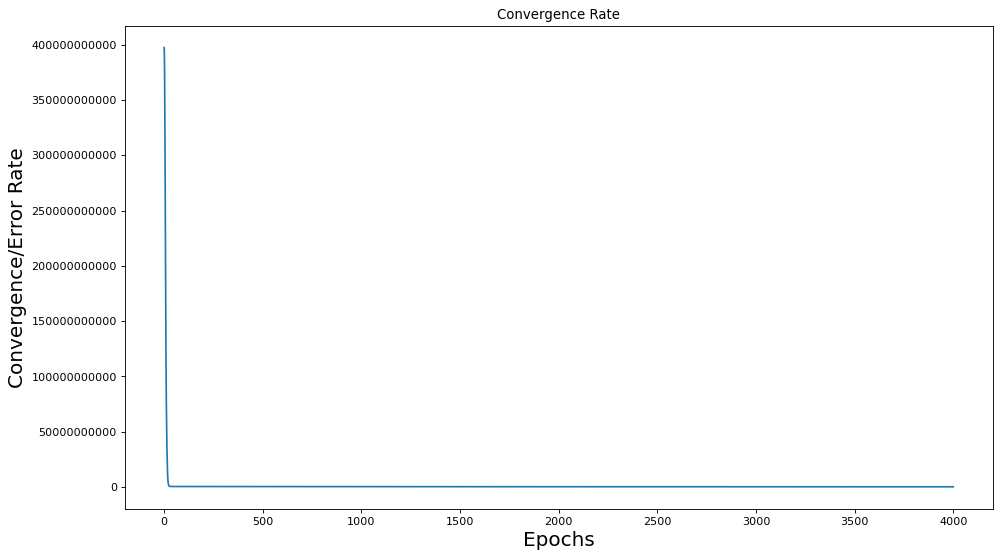

In [52]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.yaxis.offsetText.set_fontsize(16)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Convergence Rate')
plt.plot(fitting_amff.history['loss'])
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Convergence/Error Rate", fontsize=18)
plt.show()

### A Method to Generate Data for Future

In [53]:
def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

#### Evaluating model on training data (whole data this time)

In [54]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)

#### Generting Future Data and Predicting Future Cases

In [55]:
future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 7)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

#### Evaluating metrics of trained ANN

In [56]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)

22/22 [==============================] - 0s 952us/step - loss: 263105040.0000 - mean_absolute_error: 10258.8271 - mean_squared_error: 263105040.0000


[263105040.0, 10258.8271484375, 263105040.0]

#### Dataframe of predicted cases on future data by proposed ANN

In [57]:
pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])

,Confirmed,Deaths,Recoveries
10/02/22,1446325.500,29974.185547,1329385.250
11/02/22,1449998.750,29993.779297,1333269.625
12/02/22,1453671.250,30012.798828,1337156.625
13/02/22,1457343.000,30031.248047,1341046.375
14/02/22,1461014.125,30049.132812,1344939.125
15/02/22,1464684.750,30066.443359,1348834.750
16/02/22,1468354.375,30083.166016,1352733.500
17/02/22,1472023.500,30099.322266,1356634.875


### Plotting Graphs

In [58]:
# plt.subplot(322).set_title("Error Graph for Confirmed Cases")

# figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.axes()
# ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
# ax.tick_params(axis='both', which='major', labelsize=16)
# # plt.title("Fitting ANN Model on Training Data")
# plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
# plt.plot(dates, 
#          ann_future_model_prediction_on_training[:,0], '*b', 
#          ann_future_model_prediction_on_training[:,1], '*r', 
#          ann_future_model_prediction_on_training[:,2], '*g')
# plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
#             'Predicted Deaths','Predicted Recovories'], fontsize=16)
# plt.xticks(rotation=80, weight='bold');
# plt.yticks(weight='bold')
# plt.show()

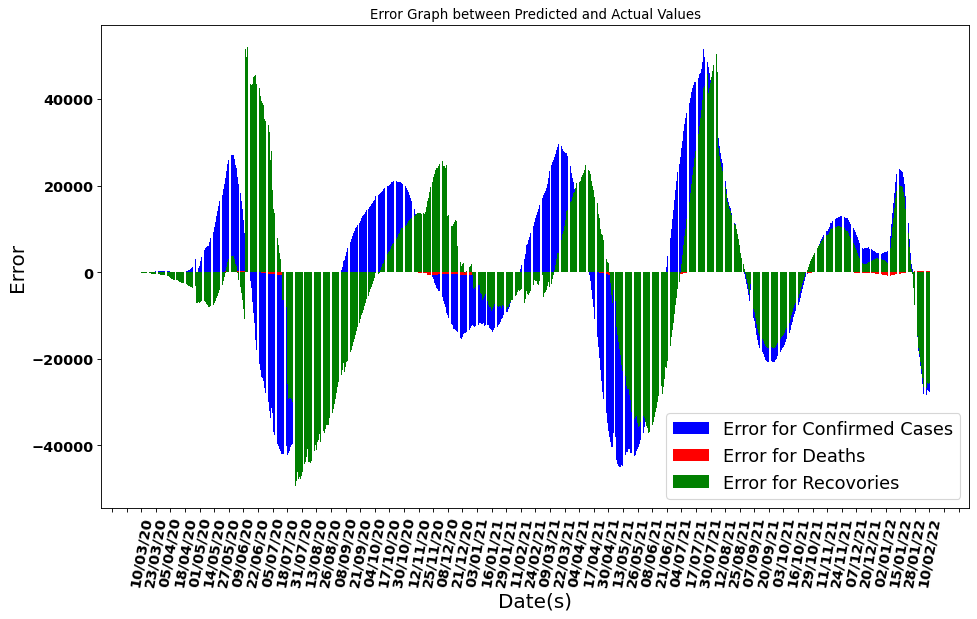

In [59]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=13.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.xlabel("Date(s)", fontsize=18)
plt.ylabel("Error", fontsize=18)
plt.show()

In [140]:
ann_future_model_prediction_on_training[0]

array([-181.29463 , -102.817566, -250.60449 ], dtype=float32)

In [153]:
len(dates) -30

673

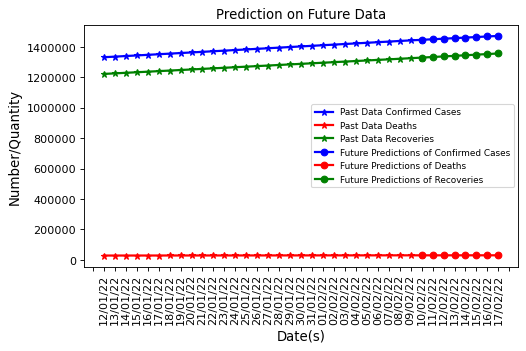

In [155]:
figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator()) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title("Prediction on Future Data")
plt.plot(dates[673:], 
         ann_future_model_prediction_on_training[673:,0], '-*b', 
         ann_future_model_prediction_on_training[673:,1], '-*r', 
         ann_future_model_prediction_on_training[673:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.0)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recoveries', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recoveries'], fontsize=8)
plt.xticks(rotation=90);
plt.yticks()
ax.ticklabel_format(useOffset=True, style='plain', axis='y')
plt.xlabel("Date(s)", fontsize=12)
plt.ylabel("Number/Quantity", fontsize=12)
plt.show()

In [ ]:
figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator()) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=10)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.0)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recoveries', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recoveries'], prop = {'size': 10}, bbox_to_anchor =(0.93, 0.63), ncol=2)
plt.xticks(rotation=90);
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e4)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.xlabel("Date(s)", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.show()